# Import Package

In [1]:
import torch
import torch.nn as nn
from torch.nn import init
import torchvision
from torchvision import transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torchvision.datasets import ImageFolder
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Helper Function

used only for check the dataset

In [2]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('train_coba',
                                                 target_size=(64, 64),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

Using TensorFlow backend.


Found 5411 images belonging to 70 classes.


In [3]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 1254 images belonging to 70 classes.


# Load training and validation dataset

In [19]:
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 32
imgsz = 32

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],\
            std=[0.229, 0.224, 0.225])

transform_train = transforms.Compose([transforms.Resize((imgsz, imgsz)), \
                      transforms.RandomHorizontalFlip(),
                      transforms.ToTensor(), \
                        normalize])

train_raw = ImageFolder('train',  transform=transform_train)
print("Total Data:",len(train_raw))

num_train = len(train_raw)
indices = list(range(num_train))
split = int(np.ceil(num_train*0.15))

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

'''train_raw = ImageFolder('train_coba', transform=transforms.Compose([transforms.CenterCrop(sz),transforms.ToTensor()]))'''
train_loader = DataLoader(train_raw,batch_size=batch_size, num_workers=2,
                          sampler=train_sampler)

#for batch_idx, (data, target) in enumerate(train_loader):
    #print("Data: ", batch_idx)

n = 0
for batch in train_loader:
    n += 1
    #print(batch[0].size())
    
print('Jumlah Batch train:',n)
##########################################################

##########################################################

test_raw = ImageFolder('test', transform=transform_train)
'''test_raw = ImageFolder('test', transform=transforms.Compose([transforms.CenterCrop(sz),transforms.ToTensor()]))'''
test_loader = DataLoader(train_raw,batch_size=batch_size, num_workers=2,
                          sampler=validation_sampler)

i=0
for batch in test_loader:
    i += 1
    #print(batch[0].size())
    
print('Jumlah Batch val:',i)

Total Data: 6665
tensor([[[[-0.2342, -0.2684, -0.2684,  ..., -0.2513, -0.2513, -0.2684],
          [-0.2171, -0.2171, -0.2342,  ..., -0.2513, -0.2513, -0.2684],
          [-0.1999, -0.1999, -0.2171,  ..., -0.2684, -0.2684, -0.2684],
          ...,
          [-0.0972, -0.0972, -0.0972,  ..., -0.1143, -0.1143, -0.1143],
          [-0.0972, -0.0972, -0.0972,  ..., -0.1143, -0.1314, -0.1314],
          [-0.4568, -0.5253, -0.4568,  ..., -0.2171, -0.2342, -0.4054]],

         [[ 0.2052,  0.1877,  0.1877,  ...,  0.2052,  0.1877,  0.1877],
          [ 0.2052,  0.2052,  0.2052,  ...,  0.2052,  0.1877,  0.1877],
          [ 0.2052,  0.2052,  0.2052,  ...,  0.1877,  0.1877,  0.1877],
          ...,
          [ 0.2577,  0.2577,  0.2577,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2577,  0.2577,  0.2577,  ...,  0.2402,  0.2402,  0.2402],
          [-0.2325, -0.3025, -0.2325,  ...,  0.0826,  0.0651, -0.1099]],

         [[ 0.8448,  0.8274,  0.8448,  ...,  0.8448,  0.8274,  0.8274],
          [ 0

tensor([[[[-0.7822, -0.7650, -0.7650,  ..., -0.7137, -0.6965, -0.6965],
          [-0.7650, -0.7650, -0.7650,  ..., -0.6965, -0.6965, -0.6965],
          [-0.7650, -0.7650, -0.7650,  ..., -0.6965, -0.6965, -0.6794],
          ...,
          [-0.4739, -0.4739, -0.4739,  ..., -0.4568, -0.4568, -0.4568],
          [-0.4568, -0.4568, -0.4568,  ..., -0.4397, -0.4397, -0.4397],
          [-0.7479, -0.7650, -0.7479,  ..., -0.4397, -0.3883, -0.5253]],

         [[-0.2150, -0.2150, -0.2150,  ..., -0.1625, -0.1625, -0.1450],
          [-0.2150, -0.2150, -0.2150,  ..., -0.1450, -0.1450, -0.1450],
          [-0.1975, -0.1975, -0.1975,  ..., -0.1450, -0.1450, -0.1450],
          ...,
          [-0.0399, -0.0399, -0.0399,  ...,  0.0126,  0.0126,  0.0126],
          [-0.0224, -0.0224, -0.0224,  ...,  0.0126,  0.0126,  0.0301],
          [-0.3901, -0.4076, -0.4076,  ..., -0.0574, -0.0224, -0.1450]],

         [[ 0.6531,  0.6705,  0.6705,  ...,  0.7751,  0.7751,  0.7925],
          [ 0.6705,  0.6705,  

tensor([[[[-1.0562, -0.8507, -0.8849,  ..., -0.7822, -0.8164, -0.7137],
          [-1.1932, -0.9363, -0.9534,  ..., -0.8507, -0.9192, -0.7993],
          [-1.2274, -0.9705, -1.0904,  ..., -0.9192, -0.9705, -0.8849],
          ...,
          [ 0.7591,  0.7419,  0.7591,  ...,  0.7419,  0.7419,  0.7591],
          [ 0.7248,  0.7248,  0.7248,  ...,  0.7933,  0.7762,  0.7933],
          [-0.1314,  0.1083,  0.2453,  ..., -0.3883, -0.3541, -0.3369]],

         [[-0.8102, -0.6352, -0.6877,  ..., -0.6527, -0.7052, -0.6001],
          [-0.9153, -0.7052, -0.7052,  ..., -0.7227, -0.7927, -0.6352],
          [-0.9328, -0.7227, -0.8102,  ..., -0.7577, -0.8102, -0.7052],
          ...,
          [ 0.5028,  0.4853,  0.5028,  ...,  0.5028,  0.5028,  0.5203],
          [ 0.4328,  0.4328,  0.4328,  ...,  0.5728,  0.5553,  0.5553],
          [-0.1625,  0.0826,  0.1877,  ..., -0.4601, -0.4076, -0.3901]],

         [[-0.7064, -0.6367, -0.6193,  ..., -0.5844, -0.6367, -0.6367],
          [-0.7413, -0.6715, -

tensor([[[[ 1.8037,  1.7352,  1.7009,  ...,  1.3927,  1.4098,  1.4783],
          [ 1.6667,  1.6667,  1.6838,  ...,  1.3584,  1.4269,  1.4783],
          [ 1.6153,  1.6838,  1.7352,  ...,  1.5125,  1.6324,  1.5810],
          ...,
          [ 1.3584,  1.3413,  1.3755,  ...,  1.2557,  1.2557,  1.2728],
          [ 1.3242,  1.3242,  1.3070,  ...,  1.3413,  1.3584,  1.3755],
          [ 0.1939,  0.4166,  0.5707,  ..., -0.0801, -0.0458, -0.0116]],

         [[ 2.0434,  2.0084,  1.9909,  ...,  1.7108,  1.7108,  1.7633],
          [ 1.9734,  1.9734,  1.9734,  ...,  1.6758,  1.7458,  1.7808],
          [ 1.9384,  1.9734,  1.9909,  ...,  1.8158,  1.8683,  1.8333],
          ...,
          [ 1.2206,  1.2031,  1.2381,  ...,  1.1155,  1.1155,  1.1331],
          [ 1.1681,  1.1681,  1.1681,  ...,  1.2031,  1.2206,  1.2381],
          [ 0.2227,  0.4503,  0.5728,  ..., -0.0924, -0.0574, -0.0049]],

         [[ 2.3786,  2.3611,  2.3263,  ...,  2.1346,  2.1346,  2.1694],
          [ 2.3437,  2.3263,  

tensor([[[[-0.2684, -0.2684, -0.2684,  ..., -0.3027, -0.3027, -0.3027],
          [-0.2342, -0.2342, -0.2342,  ..., -0.2513, -0.2684, -0.2684],
          [-0.2171, -0.2171, -0.2171,  ..., -0.1486, -0.1486, -0.1657],
          ...,
          [-0.1828, -0.1999, -0.2171,  ..., -0.4054, -0.4226, -0.4054],
          [-0.2513, -0.2513, -0.2171,  ..., -0.5253, -0.6109, -0.5596],
          [-0.6452, -0.7137, -0.6623,  ..., -0.4054, -0.4226, -0.5253]],

         [[ 0.4853,  0.4853,  0.4853,  ...,  0.4328,  0.4153,  0.4153],
          [ 0.4853,  0.5028,  0.5028,  ...,  0.4678,  0.4503,  0.4503],
          [ 0.5203,  0.5203,  0.5203,  ...,  0.5028,  0.5028,  0.4853],
          ...,
          [-0.2500, -0.2675, -0.2675,  ..., -0.4776, -0.4776, -0.4776],
          [-0.3375, -0.3200, -0.2850,  ..., -0.5651, -0.6001, -0.5651],
          [-0.6001, -0.6702, -0.6001,  ..., -0.3200, -0.3375, -0.4776]],

         [[ 1.2980,  1.2980,  1.2980,  ...,  1.2457,  1.2282,  1.2282],
          [ 1.2980,  1.2980,  

tensor([[[[-0.3369, -0.3369, -0.3369,  ..., -0.3198, -0.3369, -0.3369],
          [-0.3198, -0.3198, -0.3198,  ..., -0.3198, -0.3198, -0.3369],
          [-0.3198, -0.3027, -0.3027,  ..., -0.3027, -0.3198, -0.3198],
          ...,
          [-0.1486, -0.1486, -0.1486,  ..., -0.1486, -0.1486, -0.1486],
          [-0.1486, -0.1486, -0.1486,  ..., -0.1486, -0.1486, -0.1486],
          [-0.8164, -0.8335, -0.8678,  ..., -0.1143, -0.2684, -0.5253]],

         [[ 0.2927,  0.2927,  0.3102,  ...,  0.3102,  0.3102,  0.2927],
          [ 0.3102,  0.3102,  0.3102,  ...,  0.3102,  0.3102,  0.3102],
          [ 0.3102,  0.3102,  0.3102,  ...,  0.3102,  0.3102,  0.3102],
          ...,
          [ 0.4503,  0.4503,  0.4678,  ...,  0.4678,  0.4678,  0.4678],
          [ 0.4503,  0.4678,  0.4678,  ...,  0.4678,  0.4678,  0.4678],
          [-0.4426, -0.4601, -0.4951,  ...,  0.2927,  0.1702, -0.0924]],

         [[ 1.0888,  1.0888,  1.0888,  ...,  1.0888,  1.1062,  1.0888],
          [ 1.0888,  1.0888,  

tensor([[[[ 1.1358,  1.1872,  1.2214,  ...,  1.2385,  1.2214,  1.1700],
          [ 1.1358,  1.1872,  1.2214,  ...,  1.2385,  1.2214,  1.1872],
          [ 1.1358,  1.1700,  1.2043,  ...,  1.2385,  1.2214,  1.2043],
          ...,
          [-0.3712, -0.3198, -0.3027,  ..., -0.3712, -0.4054, -0.7822],
          [-0.4397, -0.3541, -0.2856,  ..., -0.9192, -0.9363, -1.0733],
          [-0.6965, -0.4054, -0.2342,  ..., -0.8507, -0.8849, -0.8164]],

         [[ 1.4307,  1.4832,  1.5182,  ...,  1.5707,  1.5357,  1.5007],
          [ 1.4307,  1.4832,  1.5182,  ...,  1.5532,  1.5357,  1.5007],
          [ 1.4307,  1.4657,  1.5007,  ...,  1.5532,  1.5357,  1.5182],
          ...,
          [ 0.0126,  0.0301,  0.0301,  ..., -0.2850, -0.3200, -0.4776],
          [-0.0749, -0.0049,  0.0476,  ..., -0.4426, -0.4076, -0.4251],
          [-0.4076, -0.1275,  0.0126,  ..., -0.4951, -0.5301, -0.4601]],

         [[ 1.6814,  1.7337,  1.7860,  ...,  1.8557,  1.8208,  1.7860],
          [ 1.6814,  1.7337,  

tensor([[[[-0.3541, -0.3027, -0.2342,  ..., -0.2342, -0.2684, -0.3198],
          [-0.3027, -0.2513, -0.1999,  ..., -0.2171, -0.2342, -0.2684],
          [-0.2513, -0.2171, -0.1657,  ..., -0.1999, -0.2171, -0.2513],
          ...,
          [-0.8507, -0.7822, -0.7479,  ..., -0.8678, -0.8678, -0.8849],
          [-0.9192, -0.8507, -0.7993,  ..., -0.8335, -0.8507, -0.8678],
          [-0.8335, -0.6281, -0.3883,  ..., -0.9020, -0.9192, -0.7993]],

         [[ 0.2752,  0.3102,  0.3627,  ...,  0.3452,  0.3102,  0.2577],
          [ 0.2927,  0.3277,  0.3803,  ...,  0.3452,  0.3277,  0.2927],
          [ 0.3102,  0.3627,  0.4153,  ...,  0.3627,  0.3452,  0.3102],
          ...,
          [-0.9503, -0.8803, -0.8627,  ..., -0.9678, -0.9853, -0.9853],
          [-1.0028, -0.9503, -0.9153,  ..., -0.9503, -0.9678, -0.9678],
          [-0.7402, -0.5476, -0.2850,  ..., -0.8803, -0.8978, -0.7752]],

         [[ 1.0714,  1.1237,  1.1585,  ...,  1.1062,  1.0888,  1.0365],
          [ 1.0888,  1.1237,  

tensor([[[[-0.2171, -0.1999, -0.1657,  ..., -0.2342, -0.2856, -0.3198],
          [-0.1828, -0.1657, -0.1314,  ..., -0.2171, -0.2513, -0.2856],
          [-0.1657, -0.1486, -0.0972,  ..., -0.1828, -0.2171, -0.2513],
          ...,
          [-0.4397, -0.3883, -0.2684,  ..., -1.0219, -0.8678, -0.8507],
          [-0.5767, -0.5253, -0.4739,  ..., -0.5767, -0.4911, -0.4568],
          [-0.7993, -0.5424, -0.3883,  ..., -0.7650, -0.8678, -0.7993]],

         [[ 0.3803,  0.4153,  0.4328,  ...,  0.3277,  0.2752,  0.2402],
          [ 0.4153,  0.4328,  0.4503,  ...,  0.3452,  0.3102,  0.2752],
          [ 0.4328,  0.4503,  0.4853,  ...,  0.3803,  0.3277,  0.2927],
          ...,
          [-0.3375, -0.2850, -0.1975,  ..., -0.6176, -0.5126, -0.5126],
          [-0.6877, -0.6352, -0.6001,  ..., -0.5301, -0.4251, -0.3901],
          [-0.7402, -0.4951, -0.3725,  ..., -0.7577, -0.8452, -0.7752]],

         [[ 0.9842,  1.0017,  1.0191,  ...,  0.9145,  0.8797,  0.8448],
          [ 1.0017,  1.0191,  

tensor([[[[-0.0801, -0.0629, -0.0629,  ..., -0.1314, -0.1486, -0.1657],
          [-0.0458, -0.0458, -0.0287,  ..., -0.0801, -0.0972, -0.1143],
          [-0.0116,  0.0056,  0.0056,  ..., -0.0458, -0.0458, -0.0629],
          ...,
          [-0.3198, -0.3198, -0.3369,  ..., -0.1828, -0.1999, -0.1999],
          [-0.4226, -0.3883, -0.3712,  ..., -0.1657, -0.1828, -0.1828],
          [-0.5767, -0.4397, -0.2513,  ..., -0.6281, -0.6281, -0.5082]],

         [[ 0.4503,  0.4503,  0.4503,  ...,  0.3803,  0.3627,  0.3452],
          [ 0.4678,  0.4678,  0.4678,  ...,  0.4153,  0.3803,  0.3803],
          [ 0.4853,  0.4853,  0.4853,  ...,  0.4328,  0.4153,  0.3978],
          ...,
          [-0.6176, -0.6176, -0.6352,  ..., -0.5301, -0.5301, -0.5476],
          [-0.7227, -0.6877, -0.6702,  ..., -0.5126, -0.5301, -0.5126],
          [-0.6176, -0.4601, -0.2675,  ..., -0.7227, -0.7227, -0.6001]],

         [[ 1.3677,  1.3677,  1.3677,  ...,  1.2980,  1.2805,  1.2631],
          [ 1.3677,  1.3677,  

tensor([[[[-0.8507, -0.7479, -0.6623,  ..., -1.0219, -1.1247, -1.2103],
          [-0.8335, -0.7137, -0.6281,  ..., -0.9877, -1.1075, -1.1932],
          [-0.7993, -0.6965, -0.6109,  ..., -0.9705, -1.0733, -1.1760],
          ...,
          [-1.8097, -1.8097, -1.7925,  ..., -1.0219, -1.0562, -1.0390],
          [-1.7925, -1.7925, -1.7754,  ..., -0.0458, -0.3027, -0.4568],
          [-0.9877, -0.8507, -0.4739,  ..., -0.6109, -0.7479, -0.6794]],

         [[-0.4076, -0.3025, -0.1975,  ..., -0.5651, -0.6702, -0.7752],
          [-0.3901, -0.2850, -0.1800,  ..., -0.5476, -0.6352, -0.7577],
          [-0.3725, -0.2675, -0.1625,  ..., -0.5301, -0.6352, -0.7402],
          ...,
          [-1.3704, -1.3704, -1.3529,  ..., -1.3880, -1.4055, -1.4055],
          [-1.3704, -1.3704, -1.3529,  ..., -1.3354, -1.4230, -1.4055],
          [-0.7227, -0.6001, -0.1800,  ..., -0.8803, -0.9328, -0.7752]],

         [[-0.1138, -0.0267,  0.0605,  ..., -0.2358, -0.3404, -0.4450],
          [-0.0964,  0.0082,  

tensor([[[[-0.2513, -0.2342, -0.2171,  ..., -0.3027, -0.3883, -0.3883],
          [-0.2342, -0.2342, -0.2171,  ..., -0.3541, -0.3712, -0.3541],
          [-0.1828, -0.1828, -0.1657,  ..., -0.3198, -0.3198, -0.2856],
          ...,
          [-0.1828, -0.1657, -0.1486,  ..., -0.0629, -0.0629, -0.0458],
          [-0.1486, -0.1314, -0.1314,  ..., -0.0629, -0.0801, -0.0801],
          [-0.5596, -0.3198, -0.1828,  ..., -0.7822, -0.7479, -0.7308]],

         [[ 0.2052,  0.2227,  0.2577,  ...,  0.2052,  0.1352,  0.1352],
          [ 0.2227,  0.2402,  0.2577,  ...,  0.1702,  0.1702,  0.1702],
          [ 0.2577,  0.2752,  0.2752,  ...,  0.2227,  0.2227,  0.2227],
          ...,
          [ 0.2402,  0.2577,  0.2752,  ...,  0.3277,  0.3452,  0.3452],
          [ 0.2227,  0.2402,  0.2577,  ...,  0.3102,  0.3102,  0.3102],
          [-0.2675, -0.0224,  0.1001,  ..., -0.5476, -0.5126, -0.4951]],

         [[ 0.9668,  0.9668,  1.0017,  ...,  1.0017,  0.9842,  0.9842],
          [ 0.9668,  0.9842,  

tensor([[[[-0.6109, -0.5596, -0.5424,  ..., -0.3883, -0.3883, -0.3883],
          [-0.5596, -0.5253, -0.5082,  ..., -0.3712, -0.3541, -0.2513],
          [-0.5253, -0.5082, -0.4739,  ..., -0.3541, -0.2342, -0.0287],
          ...,
          [-1.6727, -1.7069, -1.7069,  ..., -1.5185, -1.3987, -1.4843],
          [-1.8268, -1.8097, -1.7240,  ..., -1.5870, -1.5014, -1.5357],
          [-1.3644, -1.4329, -1.2617,  ..., -0.8507, -1.0219, -1.2959]],

         [[ 0.2402,  0.2927,  0.3277,  ...,  0.5028,  0.5028,  0.5028],
          [ 0.2752,  0.3277,  0.3452,  ...,  0.5028,  0.5028,  0.5203],
          [ 0.3102,  0.3452,  0.3627,  ...,  0.4678,  0.4853,  0.5378],
          ...,
          [-1.5805, -1.6331, -1.6331,  ..., -1.4055, -1.3004, -1.3529],
          [-1.7206, -1.7206, -1.6506,  ..., -1.4055, -1.3529, -1.3529],
          [-1.2479, -1.3179, -1.1779,  ..., -0.7227, -0.8452, -1.1078]],

         [[ 1.1934,  1.2457,  1.2631,  ...,  1.4200,  1.4200,  1.4200],
          [ 1.2108,  1.2457,  

tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 1.4440,  1.4612,  1.4954,  ...,  1.2214,  1.2385,  1.2043],
          [ 1.4954,  1.4783,  1.4954,  ...,  1.3242,  1.3242,  1.3070],
          [ 0.3481,  0.2624,  0.3309,  ...,  0.5878,  0.4337,  0.1597]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [ 1.6057,  1.6232,  1.6583,  ...,  1.3782,  1.3957,  1.3606],
          [ 1.6583,  1.6408,  1.6583,  ...,  1.4832,  1.4832,  1.4657],
          [ 0.4853,  0.3978,  0.4678,  ...,  0.7479,  0.6254,  0.3627]],

         [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
          [ 2.6400,  2.6400,  

tensor([[[[-1.2274, -1.2103, -1.1760,  ..., -1.2788, -1.3302, -1.3644],
          [-1.2274, -1.1932, -1.1589,  ..., -1.2617, -1.3130, -1.3473],
          [-1.1932, -1.1760, -1.1418,  ..., -1.2617, -1.2959, -1.3302],
          ...,
          [-1.2445, -1.2274, -1.2103,  ..., -1.0219, -1.0219, -1.0562],
          [-1.3644, -1.3473, -1.3130,  ..., -1.2445, -1.2617, -1.2617],
          [-1.1760, -0.9192, -0.7822,  ..., -1.0390, -1.1247, -1.0390]],

         [[-0.5301, -0.4776, -0.4426,  ..., -0.5651, -0.6001, -0.6527],
          [-0.5126, -0.4776, -0.4426,  ..., -0.5476, -0.6001, -0.6352],
          [-0.4951, -0.4426, -0.4251,  ..., -0.5301, -0.5826, -0.6176],
          ...,
          [-1.1253, -1.0903, -1.0903,  ..., -1.0028, -1.0028, -1.0203],
          [-1.1779, -1.1604, -1.1429,  ..., -1.1078, -1.1429, -1.1604],
          [-0.9678, -0.7227, -0.6001,  ..., -0.9328, -1.0203, -0.9328]],

         [[ 0.0256,  0.0605,  0.1128,  ..., -0.0267, -0.0790, -0.1312],
          [ 0.0431,  0.0779,  

tensor([[[[ 0.1083,  0.1254,  0.1426,  ...,  0.1939,  0.1597,  0.1426],
          [ 0.1254,  0.1426,  0.1597,  ...,  0.2111,  0.1939,  0.1768],
          [ 0.1426,  0.1597,  0.1768,  ...,  0.3823,  0.3309,  0.3309],
          ...,
          [ 0.4679,  0.4679,  0.4851,  ...,  0.4851,  0.4508,  0.3994],
          [ 0.4337,  0.4508,  0.4679,  ...,  0.4337,  0.3994,  0.3481],
          [-0.0629,  0.0912,  0.1083,  ..., -0.1314, -0.2171, -0.1828]],

         [[ 0.5903,  0.6078,  0.6254,  ...,  0.6078,  0.5728,  0.5378],
          [ 0.5903,  0.6078,  0.6254,  ...,  0.6254,  0.5903,  0.5553],
          [ 0.6078,  0.6254,  0.6429,  ...,  0.7479,  0.6779,  0.6604],
          ...,
          [ 0.6954,  0.7129,  0.7479,  ...,  0.6954,  0.6429,  0.5903],
          [ 0.6429,  0.6779,  0.7129,  ...,  0.6254,  0.5903,  0.5378],
          [ 0.1527,  0.3102,  0.3452,  ...,  0.0301, -0.0574, -0.0224]],

         [[ 1.3502,  1.3677,  1.4025,  ...,  1.4025,  1.3677,  1.3154],
          [ 1.3677,  1.3851,  

tensor([[[[-0.5082, -0.5082, -0.5082,  ..., -0.4739, -0.4739, -0.4739],
          [-0.5082, -0.5082, -0.5082,  ..., -0.4739, -0.4739, -0.4739],
          [-0.5082, -0.4911, -0.4911,  ..., -0.4739, -0.4568, -0.4568],
          ...,
          [-0.3369, -0.3369, -0.3369,  ..., -0.3198, -0.3198, -0.3198],
          [-0.3198, -0.3198, -0.3198,  ..., -0.3198, -0.3198, -0.3198],
          [-0.6452, -0.6623, -0.6452,  ..., -0.3541, -0.3198, -0.4568]],

         [[ 0.2052,  0.2052,  0.2227,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2227,  0.2227,  0.2227,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2227,  0.2227,  0.2227,  ...,  0.2577,  0.2402,  0.2577],
          ...,
          [ 0.3627,  0.3627,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
          [ 0.3803,  0.3803,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
          [-0.1099, -0.1275, -0.1099,  ...,  0.2227,  0.2577,  0.1352]],

         [[ 1.1237,  1.1237,  1.1237,  ...,  1.1585,  1.1759,  1.1759],
          [ 1.1237,  1.1237,  

tensor([[[[ 1.7180,  1.6153,  1.5639,  ...,  1.4783,  1.4783,  1.4612],
          [ 1.7009,  1.6153,  1.4954,  ...,  1.4440,  1.4440,  1.4440],
          [ 1.7009,  1.6838,  1.6324,  ...,  1.4098,  1.4269,  1.4098],
          ...,
          [ 0.2967,  0.2967,  0.3823,  ...,  0.6392,  0.6221,  0.6221],
          [ 0.6734,  0.6906,  0.7077,  ...,  0.6734,  0.6734,  0.6563],
          [-0.1314, -0.1486, -0.1828,  ...,  0.3309,  0.2111,  0.0398]],

         [[ 1.9034,  1.8333,  1.8158,  ...,  1.7283,  1.7283,  1.7108],
          [ 1.8859,  1.8333,  1.7633,  ...,  1.6933,  1.6933,  1.6933],
          [ 1.8859,  1.8683,  1.8508,  ...,  1.6758,  1.6758,  1.6583],
          ...,
          [ 0.2052,  0.2052,  0.2577,  ...,  0.3978,  0.3978,  0.3803],
          [ 0.5028,  0.5203,  0.5378,  ...,  0.4678,  0.4678,  0.4503],
          [-0.1975, -0.2150, -0.2325,  ...,  0.2927,  0.1527,  0.0126]],

         [[ 2.1346,  2.0997,  2.0648,  ...,  1.9951,  1.9951,  1.9777],
          [ 2.1171,  2.0823,  

tensor([[[[-1.2617, -1.2274, -1.2103,  ..., -1.3130, -1.3473, -1.3815],
          [-1.2445, -1.2103, -1.1932,  ..., -1.2959, -1.3302, -1.3644],
          [-1.2274, -1.1932, -1.1760,  ..., -1.2788, -1.2959, -1.3302],
          ...,
          [-1.0390, -1.0219, -1.0048,  ..., -1.0733, -1.1247, -1.1589],
          [-1.0562, -1.0219, -1.0048,  ..., -1.0904, -1.1247, -1.1589],
          [-1.0219, -0.7479, -0.6109,  ..., -0.9534, -1.0562, -1.0048]],

         [[-0.3025, -0.2850, -0.2500,  ..., -0.4251, -0.4776, -0.5301],
          [-0.2850, -0.2675, -0.2325,  ..., -0.4076, -0.4601, -0.4951],
          [-0.2675, -0.2325, -0.2150,  ..., -0.3725, -0.4251, -0.4776],
          ...,
          [-0.1450, -0.1099, -0.0574,  ..., -0.1975, -0.2675, -0.3200],
          [-0.1625, -0.1099, -0.0749,  ..., -0.2150, -0.2850, -0.3550],
          [-0.4776, -0.2150, -0.0749,  ..., -0.4776, -0.6001, -0.5476]],

         [[ 0.6182,  0.6531,  0.7054,  ...,  0.4265,  0.3393,  0.2696],
          [ 0.6356,  0.6879,  

tensor([[[[-0.9705, -0.9534, -0.8849,  ..., -1.3302, -0.5938, -0.5596],
          [ 0.4337,  0.4508,  0.4679,  ..., -0.9877,  0.8618,  0.9132],
          [ 0.9988,  1.0159,  1.0331,  ..., -0.9363,  1.0331,  1.0673],
          ...,
          [-0.7993, -0.7650, -0.7650,  ..., -0.8335, -0.7993, -0.7650],
          [-0.8335, -0.7650, -0.7137,  ..., -0.4054, -0.4397, -0.4911],
          [-0.7822, -0.5424, -0.3541,  ..., -0.9705, -0.9534, -0.9363]],

         [[-0.5651, -0.5476, -0.4951,  ..., -1.0728, -0.2850, -0.2675],
          [ 0.6254,  0.6604,  0.6779,  ..., -0.7227,  1.0105,  1.0455],
          [ 1.1331,  1.1681,  1.1856,  ..., -0.7227,  1.1506,  1.2031],
          ...,
          [-0.3550, -0.3025, -0.2675,  ..., -0.5126, -0.5126, -0.4951],
          [-0.3725, -0.3025, -0.2675,  ..., -0.3025, -0.3025, -0.3025],
          [-0.5826, -0.3025, -0.1800,  ..., -0.9153, -0.8803, -0.8627]],

         [[-0.2707, -0.2184, -0.2010,  ..., -0.6541, -0.0441, -0.0267],
          [ 0.8797,  0.8971,  

tensor([[[[-0.7137, -0.6452, -0.5767,  ..., -0.5424, -0.6109, -0.6794],
          [-0.7479, -0.6794, -0.6109,  ..., -0.5253, -0.5938, -0.6452],
          [-0.7650, -0.6965, -0.6452,  ..., -0.5082, -0.5596, -0.6281],
          ...,
          [-1.1418, -1.0904, -1.0390,  ..., -0.6794, -0.6965, -0.7479],
          [-1.1760, -1.1075, -1.0562,  ..., -0.7479, -0.7822, -0.8164],
          [-1.0904, -0.7993, -0.6452,  ..., -0.7993, -0.9020, -0.8507]],

         [[-0.0924, -0.0224,  0.0476,  ...,  0.1352,  0.0476, -0.0224],
          [-0.1275, -0.0399,  0.0301,  ...,  0.1527,  0.0651, -0.0049],
          [-0.1450, -0.0749,  0.0126,  ...,  0.1702,  0.1001,  0.0301],
          ...,
          [-0.5651, -0.5126, -0.4426,  ..., -0.1275, -0.1800, -0.2325],
          [-0.6176, -0.5651, -0.4951,  ..., -0.1975, -0.2500, -0.3025],
          [-0.7052, -0.4426, -0.2850,  ..., -0.4776, -0.5826, -0.5301]],

         [[ 1.1062,  1.1759,  1.2805,  ...,  1.4200,  1.3154,  1.2457],
          [ 1.0714,  1.1585,  

tensor([[[[-1.3473, -1.5699, -1.7583,  ..., -1.7412, -1.7240, -1.6898],
          [-1.8268, -1.8439, -1.9124,  ..., -1.7412, -1.7412, -1.7069],
          [-1.8439, -1.9467, -1.8953,  ..., -1.8268, -1.5870, -1.4672],
          ...,
          [ 0.1597,  0.1939,  0.2453,  ...,  0.3994,  0.3481,  0.2967],
          [-0.1486, -0.0801,  0.0227,  ...,  0.4337,  0.4166,  0.4166],
          [-0.6281, -0.7308, -0.6794,  ...,  0.1254, -0.1314, -0.3198]],

         [[-1.1253, -1.3529, -1.5455,  ..., -1.4580, -1.4580, -1.4405],
          [-1.5805, -1.6155, -1.6506,  ..., -1.4930, -1.4755, -1.4930],
          [-1.5980, -1.7556, -1.6856,  ..., -1.5630, -1.3880, -1.3179],
          ...,
          [ 0.1001,  0.1352,  0.2052,  ...,  0.3627,  0.3102,  0.2577],
          [-0.1625, -0.0924, -0.0224,  ...,  0.4328,  0.3978,  0.3978],
          [-0.5476, -0.6527, -0.6176,  ...,  0.2927,  0.0126, -0.1800]],

         [[-0.4624, -0.7238, -0.9504,  ..., -0.7936, -0.7761, -0.7587],
          [-0.9853, -1.0201, -

tensor([[[[-0.0116, -0.0116, -0.0287,  ..., -0.1828, -0.1999, -0.1999],
          [ 0.0056,  0.0056,  0.0056,  ..., -0.1828, -0.1828, -0.1999],
          [ 0.0398,  0.0398,  0.0227,  ..., -0.1657, -0.1657, -0.1828],
          ...,
          [ 0.6563,  0.6563,  0.6563,  ...,  0.4166,  0.4166,  0.3994],
          [ 0.6734,  0.6563,  0.6563,  ...,  0.4337,  0.4166,  0.3994],
          [-0.1486,  0.0912,  0.2282,  ..., -0.5596, -0.5253, -0.5082]],

         [[ 0.6604,  0.6429,  0.6429,  ...,  0.4503,  0.4328,  0.4328],
          [ 0.6779,  0.6604,  0.6604,  ...,  0.4678,  0.4503,  0.4503],
          [ 0.6954,  0.6954,  0.6954,  ...,  0.4853,  0.4853,  0.4678],
          ...,
          [ 1.1155,  1.1155,  1.1155,  ...,  0.9755,  0.9580,  0.9580],
          [ 1.1155,  1.1155,  1.1155,  ...,  0.9755,  0.9580,  0.9580],
          [ 0.2052,  0.4328,  0.5378,  ..., -0.2150, -0.1800, -0.1625]],

         [[ 1.6465,  1.6291,  1.6291,  ...,  1.5245,  1.5245,  1.5071],
          [ 1.6465,  1.6465,  

tensor([[[[-0.7993, -0.7822, -0.7650,  ..., -0.7308, -0.7479, -0.7479],
          [-0.7822, -0.7822, -0.7822,  ..., -0.7650, -0.7650, -0.7650],
          [-0.7822, -0.7993, -0.7993,  ..., -0.7479, -0.7650, -0.7479],
          ...,
          [-0.4397, -0.4397, -0.4397,  ..., -0.4226, -0.4226, -0.4226],
          [-0.4226, -0.4226, -0.4226,  ..., -0.4054, -0.4054, -0.4054],
          [-0.6109, -0.4397, -0.3027,  ..., -0.8849, -0.8507, -0.8335]],

         [[-0.1099, -0.0924, -0.0749,  ..., -0.0224, -0.0224, -0.0224],
          [-0.0924, -0.0749, -0.0749,  ..., -0.0399, -0.0399, -0.0399],
          [-0.0924, -0.0924, -0.0924,  ..., -0.0224, -0.0224, -0.0224],
          ...,
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2927,  0.2927,  0.2752],
          [ 0.2577,  0.2577,  0.2577,  ...,  0.2927,  0.2927,  0.2927],
          [-0.1099,  0.0476,  0.1702,  ..., -0.4076, -0.3725, -0.3550]],

         [[ 0.8274,  0.8448,  0.8448,  ...,  0.9319,  0.9319,  0.9319],
          [ 0.8448,  0.8448,  

tensor([[[[ 0.3309,  0.3481,  0.3481,  ...,  0.3481,  0.3309,  0.3309],
          [ 0.3309,  0.3309,  0.3481,  ...,  0.3481,  0.3481,  0.3309],
          [ 0.3309,  0.3309,  0.3309,  ...,  0.3481,  0.3481,  0.3481],
          ...,
          [ 0.3138,  0.3138,  0.3138,  ...,  0.3309,  0.3309,  0.3309],
          [ 0.3309,  0.3309,  0.3309,  ...,  0.3309,  0.3309,  0.3309],
          [-0.1828, -0.1999, -0.1999,  ...,  0.1426,  0.1939,  0.0398]],

         [[ 0.5903,  0.5903,  0.5903,  ...,  0.6078,  0.6078,  0.6078],
          [ 0.5903,  0.5903,  0.5903,  ...,  0.6078,  0.6078,  0.6078],
          [ 0.5728,  0.5903,  0.5903,  ...,  0.6078,  0.6078,  0.6078],
          ...,
          [ 0.5378,  0.5378,  0.5378,  ...,  0.5378,  0.5553,  0.5553],
          [ 0.5378,  0.5553,  0.5553,  ...,  0.5553,  0.5553,  0.5553],
          [ 0.0126, -0.0049, -0.0049,  ...,  0.3803,  0.4153,  0.2752]],

         [[ 0.9842,  0.9842,  1.0017,  ...,  1.0365,  1.0539,  1.0539],
          [ 0.9842,  0.9842,  

tensor([[[[ 0.1939,  0.2111,  0.2111,  ...,  0.6221,  0.6049,  0.5536],
          [ 0.2453,  0.3138,  0.2282,  ...,  0.6221,  0.6221,  0.5878],
          [ 0.2111,  0.2453,  0.2282,  ...,  0.5707,  0.5707,  0.5707],
          ...,
          [ 0.6563,  0.6563,  0.6906,  ...,  0.6563,  0.6563,  0.6563],
          [ 0.8104,  0.8104,  0.8447,  ...,  0.8104,  0.7933,  0.7933],
          [ 0.1939,  0.3652,  0.4851,  ..., -0.1314, -0.1143, -0.0972]],

         [[ 0.5378,  0.5553,  0.5553,  ...,  0.8004,  0.7829,  0.7304],
          [ 0.5728,  0.6078,  0.5728,  ...,  0.8004,  0.8004,  0.7654],
          [ 0.5553,  0.5728,  0.5728,  ...,  0.7654,  0.7654,  0.7654],
          ...,
          [ 0.3978,  0.3978,  0.4678,  ...,  0.3803,  0.3803,  0.3803],
          [ 0.5378,  0.5378,  0.5553,  ...,  0.5028,  0.5028,  0.5028],
          [ 0.1001,  0.2402,  0.3803,  ..., -0.2500, -0.2325, -0.2150]],

         [[ 0.9842,  1.0017,  1.0017,  ...,  1.1237,  1.1062,  1.0888],
          [ 1.0017,  1.0191,  

tensor([[[[ 0.7762,  0.7933,  0.7933,  ...,  0.8789,  0.8789,  0.8618],
          [ 0.7591,  0.7591,  0.7762,  ...,  0.8447,  0.8276,  0.8276],
          [ 0.7248,  0.7248,  0.7419,  ...,  0.8104,  0.8104,  0.8276],
          ...,
          [ 0.4166,  0.5022,  0.5022,  ...,  0.7762,  0.8104,  0.8104],
          [ 0.5193,  0.5022,  0.5878,  ...,  0.6392,  0.7248,  0.7248],
          [-0.3541, -0.4397, -0.3883,  ...,  0.1768,  0.0912, -0.1486]],

         [[ 1.0455,  1.0630,  1.0630,  ...,  1.1506,  1.1506,  1.1331],
          [ 1.0280,  1.0280,  1.0455,  ...,  1.0980,  1.0980,  1.0980],
          [ 0.9930,  0.9930,  1.0105,  ...,  1.0630,  1.0630,  1.0805],
          ...,
          [ 0.4153,  0.4328,  0.4678,  ...,  0.7654,  0.8179,  0.8179],
          [ 0.4678,  0.4678,  0.5553,  ...,  0.5728,  0.6954,  0.7129],
          [-0.3200, -0.3550, -0.4076,  ...,  0.2052,  0.1877, -0.0574]],

         [[ 1.5942,  1.6117,  1.6291,  ...,  1.6291,  1.6291,  1.6117],
          [ 1.5768,  1.5768,  

tensor([[[[-0.6794, -0.6623, -0.6623,  ..., -0.6623, -0.6965, -0.7137],
          [-0.6452, -0.6281, -0.6281,  ..., -0.6794, -0.6965, -0.7137],
          [-0.6452, -0.6281, -0.6281,  ..., -0.6965, -0.7137, -0.7308],
          ...,
          [ 0.3309,  0.3652,  0.3652,  ...,  0.3994,  0.3994,  0.3994],
          [ 0.2624,  0.2796,  0.2967,  ...,  0.2967,  0.3138,  0.2967],
          [-0.3198, -0.1486,  0.0569,  ..., -0.4054, -0.4226, -0.3027]],

         [[-0.3375, -0.3375, -0.3200,  ..., -0.3725, -0.3901, -0.4251],
          [-0.3200, -0.3025, -0.3025,  ..., -0.3901, -0.4076, -0.4251],
          [-0.3200, -0.3200, -0.3025,  ..., -0.4076, -0.4076, -0.4426],
          ...,
          [-0.0399, -0.0224, -0.0224,  ...,  0.0476,  0.0476,  0.0301],
          [-0.1099, -0.0924, -0.0749,  ..., -0.0749, -0.0574, -0.0749],
          [-0.3725, -0.1975,  0.0476,  ..., -0.5126, -0.5126, -0.3901]],

         [[ 0.6356,  0.6356,  0.6531,  ...,  0.5659,  0.5485,  0.5136],
          [ 0.6356,  0.6531,  

tensor([[[[ 0.1426,  0.2282,  0.2796,  ..., -0.0458, -0.1999, -0.3369],
          [ 0.2282,  0.2796,  0.3138,  ..., -0.0116, -0.1828, -0.3198],
          [ 0.2282,  0.3138,  0.4166,  ...,  0.0227, -0.1486, -0.2684],
          ...,
          [-1.1075, -1.0219, -0.9020,  ..., -1.0048, -1.0733, -1.2959],
          [-1.0219, -0.9877, -0.8335,  ..., -1.0048, -1.0562, -1.1760],
          [-1.0219, -0.8164, -0.6109,  ..., -1.2617, -1.3302, -1.3302]],

         [[ 0.5728,  0.6604,  0.7129,  ...,  0.4503,  0.3277,  0.2227],
          [ 0.6078,  0.6779,  0.7129,  ...,  0.4853,  0.3627,  0.2577],
          [ 0.6078,  0.6779,  0.7479,  ...,  0.5203,  0.3978,  0.2927],
          ...,
          [-0.9153, -0.8277, -0.7227,  ..., -0.8102, -0.8627, -1.0203],
          [-0.8627, -0.8277, -0.7227,  ..., -0.8627, -0.8978, -0.9678],
          [-0.8277, -0.6527, -0.4601,  ..., -1.1429, -1.1604, -1.1429]],

         [[ 1.0714,  1.1411,  1.1585,  ...,  0.9319,  0.8622,  0.7751],
          [ 1.0888,  1.1237,  

tensor([[[[ 0.1768, -0.0972, -0.2342,  ..., -0.3883, -0.2684, -0.1657],
          [-0.1314, -0.1657, -0.1999,  ..., -0.3541, -0.1486, -0.0801],
          [-0.2171, -0.1999, -0.1657,  ..., -0.2513, -0.1657, -0.0629],
          ...,
          [-1.8782, -1.8782, -1.8439,  ..., -1.2103, -1.2103, -1.2103],
          [-1.9124, -1.8953, -1.8782,  ..., -1.4158, -1.3644, -1.3473],
          [-1.5014, -1.2959, -1.1589,  ..., -1.5699, -1.4329, -1.4158]],

         [[ 0.9755,  0.8529,  0.8004,  ...,  0.6779,  0.7304,  0.7479],
          [ 0.8354,  0.8354,  0.8179,  ...,  0.7129,  0.8004,  0.8179],
          [ 0.8004,  0.8179,  0.8354,  ...,  0.7829,  0.8179,  0.8529],
          ...,
          [-1.6681, -1.6506, -1.6155,  ..., -1.0028, -0.9853, -0.9853],
          [-1.6856, -1.6681, -1.6506,  ..., -1.1779, -1.1253, -1.1078],
          [-1.2654, -1.0903, -0.9503,  ..., -1.4055, -1.2479, -1.2304]],

         [[ 1.7511,  1.7337,  1.7337,  ...,  1.7337,  1.7337,  1.7337],
          [ 1.7163,  1.7337,  

tensor([[[[-0.4397, -0.4397, -0.4397,  ..., -0.6109, -0.6109, -0.6281],
          [-0.4397, -0.4397, -0.4397,  ..., -0.6109, -0.6109, -0.6281],
          [-0.4226, -0.4226, -0.4226,  ..., -0.5938, -0.6109, -0.6109],
          ...,
          [-0.2171, -0.2342, -0.2342,  ..., -0.1999, -0.3027, -0.3198],
          [-0.3541, -0.3541, -0.3541,  ..., -0.3027, -0.3541, -0.2856],
          [-0.6794, -0.4397, -0.2856,  ..., -0.9877, -0.9363, -0.9192]],

         [[ 0.1176,  0.1176,  0.1352,  ...,  0.0126,  0.0126, -0.0049],
          [ 0.1352,  0.1352,  0.1352,  ...,  0.0126,  0.0126,  0.0126],
          [ 0.1527,  0.1527,  0.1527,  ...,  0.0301,  0.0301,  0.0126],
          ...,
          [-0.0749, -0.0924, -0.0924,  ..., -0.0749, -0.0924, -0.0924],
          [-0.1275, -0.1275, -0.1450,  ..., -0.1275, -0.1450, -0.1275],
          [-0.4426, -0.1975, -0.0749,  ..., -0.8102, -0.7577, -0.7577]],

         [[ 0.7576,  0.7576,  0.7751,  ...,  0.6182,  0.6182,  0.6008],
          [ 0.7576,  0.7576,  

tensor([[[[-0.0116,  0.0912,  0.0569,  ..., -0.0116,  0.1254, -0.3883],
          [ 0.3994,  0.4508,  0.4851,  ..., -0.1828,  0.3481,  0.3481],
          [ 0.4166,  0.4851,  0.4508,  ..., -0.2342, -0.0458, -0.1314],
          ...,
          [ 0.5707,  0.6221,  0.6563,  ...,  0.2453, -0.0116, -0.2856],
          [ 0.4508,  0.4508,  0.5536,  ...,  0.6221,  0.5536,  0.5022],
          [-0.3198, -0.4397, -0.4054,  ...,  0.2111, -0.1828, -0.3198]],

         [[ 0.1176,  0.2402,  0.1877,  ..., -0.1099,  0.1527, -0.3725],
          [ 0.5203,  0.5728,  0.6078,  ..., -0.1800,  0.3803,  0.4328],
          [ 0.5378,  0.6254,  0.6078,  ..., -0.1975, -0.0574, -0.1275],
          ...,
          [ 0.6429,  0.6779,  0.7479,  ...,  0.3277,  0.0476, -0.2150],
          [ 0.5203,  0.5378,  0.6604,  ...,  0.7304,  0.6429,  0.6078],
          [-0.2150, -0.3375, -0.2850,  ...,  0.4153, -0.0049, -0.1450]],

         [[ 0.3045,  0.4091,  0.3916,  ..., -0.5495, -0.0790, -0.5147],
          [ 0.7054,  0.7751,  

tensor([[[[-0.3369, -0.2856, -0.2513,  ...,  0.5878,  0.6049,  0.5193],
          [-0.4397, -0.3712, -0.3369,  ...,  0.1597,  0.2282,  0.1083],
          [-0.3541, -0.4568, -0.3541,  ...,  0.4166,  0.0227, -0.0458],
          ...,
          [ 0.0398,  0.0741,  0.4508,  ...,  0.7248,  0.6563,  0.7248],
          [-0.1828, -0.1143,  0.6906,  ...,  0.9303,  0.8276,  0.7933],
          [-0.6794, -0.3198,  0.2967,  ...,  0.2967,  0.2111,  0.1939]],

         [[-0.2150, -0.1625, -0.1275,  ...,  0.7304,  0.7479,  0.6604],
          [-0.3200, -0.2500, -0.2150,  ...,  0.2927,  0.3627,  0.2402],
          [-0.2325, -0.3375, -0.2325,  ...,  0.5553,  0.1527,  0.0826],
          ...,
          [ 0.1702,  0.2052,  0.5903,  ...,  0.8704,  0.8004,  0.8704],
          [-0.0574,  0.0126,  0.8354,  ...,  1.0805,  0.9755,  0.9405],
          [-0.4951, -0.1625,  0.4678,  ...,  0.4328,  0.3452,  0.3277]],

         [[ 0.0082,  0.0605,  0.0953,  ...,  0.9494,  0.9668,  0.8797],
          [-0.0964, -0.0267,  

tensor([[[[ 0.1939,  0.3138,  0.4508,  ...,  0.5022,  0.4166,  0.2967],
          [ 0.2453,  0.3652,  0.4851,  ...,  0.5364,  0.4508,  0.3481],
          [ 0.0912,  0.2453,  0.4337,  ...,  0.2282,  0.1083, -0.0629],
          ...,
          [ 0.2624,  0.3823,  0.5193,  ...,  0.4337,  0.3823,  0.2967],
          [ 0.3309,  0.4166,  0.5364,  ...,  0.3994,  0.2967,  0.2453],
          [-0.1999, -0.0116,  0.1426,  ..., -0.1828, -0.3198, -0.3198]],

         [[ 0.1877,  0.3452,  0.5203,  ...,  0.6078,  0.4678,  0.3102],
          [ 0.2402,  0.3978,  0.5728,  ...,  0.6429,  0.5028,  0.3627],
          [ 0.1001,  0.2927,  0.5028,  ...,  0.3102,  0.1877, -0.0224],
          ...,
          [-0.0049,  0.1352,  0.2927,  ...,  0.2402,  0.1527,  0.0651],
          [ 0.0651,  0.2227,  0.4503,  ...,  0.1877,  0.0651,  0.0126],
          [-0.1975,  0.1176,  0.3277,  ..., -0.2325, -0.3725, -0.3725]],

         [[ 0.6879,  0.8448,  0.9668,  ...,  1.0017,  0.8797,  0.7576],
          [ 0.6879,  0.8448,  

tensor([[[[ 0.0569,  0.0741,  0.0912,  ...,  0.8618,  0.9646,  0.8618],
          [ 0.0056, -0.0629, -0.1486,  ...,  0.4679,  0.5536,  0.4337],
          [-0.4397, -0.5082, -0.5767,  ...,  0.0569,  0.2111,  0.0569],
          ...,
          [-0.5596, -0.5596, -0.6109,  ..., -0.5596, -0.5424, -0.5424],
          [-0.6965, -0.6281, -0.5253,  ..., -0.3712, -0.3712, -0.3712],
          [-0.7650, -0.5938, -0.4568,  ..., -0.5767, -0.6965, -0.6623]],

         [[ 0.5728,  0.6078,  0.5903,  ...,  1.1856,  1.2731,  1.2031],
          [ 0.5378,  0.4678,  0.3803,  ...,  0.8704,  0.9405,  0.8529],
          [ 0.2927,  0.2752,  0.2577,  ...,  0.5728,  0.6604,  0.5728],
          ...,
          [-0.3375, -0.3550, -0.3550,  ..., -0.3725, -0.3725, -0.3725],
          [-0.4426, -0.4076, -0.3725,  ..., -0.2850, -0.3025, -0.3025],
          [-0.5301, -0.3550, -0.1975,  ..., -0.4951, -0.5826, -0.5126]],

         [[ 1.4722,  1.4722,  1.4374,  ...,  1.8905,  1.9428,  1.9254],
          [ 1.4025,  1.2805,  

tensor([[[[-0.6623, -0.6452, -0.6281,  ..., -0.5767, -0.5767, -0.5767],
          [-0.6623, -0.6452, -0.6281,  ..., -0.5596, -0.5767, -0.5767],
          [-0.6452, -0.6281, -0.6109,  ..., -0.5424, -0.5424, -0.5596],
          ...,
          [-0.2856, -0.2684, -0.2513,  ..., -0.2342, -0.2513, -0.2513],
          [-0.2684, -0.2513, -0.2342,  ..., -0.2171, -0.2342, -0.2342],
          [-0.4397, -0.2684, -0.2684,  ..., -0.6109, -0.6281, -0.6109]],

         [[ 0.5028,  0.5028,  0.5203,  ...,  0.5553,  0.5553,  0.5553],
          [ 0.5028,  0.5203,  0.5378,  ...,  0.5728,  0.5728,  0.5728],
          [ 0.5203,  0.5203,  0.5378,  ...,  0.5728,  0.5728,  0.5728],
          ...,
          [ 0.7129,  0.7129,  0.7304,  ...,  0.7479,  0.7479,  0.7479],
          [ 0.7129,  0.7304,  0.7479,  ...,  0.7479,  0.7479,  0.7479],
          [ 0.3277,  0.4678,  0.4853,  ...,  0.1176,  0.1001,  0.1176]],

         [[ 1.7511,  1.7685,  1.7685,  ...,  1.8383,  1.8383,  1.8383],
          [ 1.7511,  1.7685,  

tensor([[[[ 1.5125,  1.4612,  1.4098,  ...,  1.9064,  1.8550,  1.6495],
          [ 1.7180,  1.6838,  1.6324,  ...,  1.6838,  1.7865,  1.7694],
          [ 1.5468,  1.5297,  1.5297,  ...,  1.5468,  1.7694,  1.8208],
          ...,
          [-0.7993, -0.8164, -0.7993,  ..., -0.6452, -0.6109, -0.6109],
          [-0.6965, -0.7137, -0.7308,  ..., -0.5253, -0.6109, -0.5938],
          [-0.7822, -0.5938, -0.4739,  ..., -1.0219, -1.0219, -0.9877]],

         [[ 1.6758,  1.6057,  1.5707,  ...,  2.0434,  2.0084,  1.8859],
          [ 1.8508,  1.8158,  1.7633,  ...,  1.8158,  1.9209,  1.9384],
          [ 1.6933,  1.6758,  1.6758,  ...,  1.7108,  1.9034,  1.9559],
          ...,
          [-0.6001, -0.6001, -0.5651,  ..., -0.4251, -0.4076, -0.4076],
          [-0.4776, -0.4951, -0.5126,  ..., -0.3550, -0.4076, -0.3901],
          [-0.5826, -0.3901, -0.3025,  ..., -0.8627, -0.8627, -0.8277]],

         [[ 1.9254,  1.8731,  1.8208,  ...,  2.2391,  2.2566,  2.2566],
          [ 2.0648,  2.0474,  

tensor([[[[ 0.3309,  0.3309,  0.3138,  ...,  1.0502,  1.0844,  1.0844],
          [ 0.3994,  0.3823,  0.3652,  ...,  1.1015,  1.1187,  1.1187],
          [ 0.4679,  0.4851,  0.5364,  ...,  1.1015,  1.1015,  1.1015],
          ...,
          [-0.5082, -0.2856, -0.4054,  ...,  0.1768,  0.1768,  0.1768],
          [-0.5424, -0.3369, -0.4397,  ...,  0.5022,  0.5193,  0.5536],
          [-0.7308, -0.4397, -0.3369,  ..., -0.4226, -0.4226, -0.5253]],

         [[ 0.3627,  0.3627,  0.3627,  ...,  1.1506,  1.1856,  1.1856],
          [ 0.4328,  0.4328,  0.4153,  ...,  1.2031,  1.2031,  1.2206],
          [ 0.5028,  0.5553,  0.5903,  ...,  1.2031,  1.2031,  1.2031],
          ...,
          [-0.3725, -0.1099, -0.2325,  ...,  0.1877,  0.1877,  0.1877],
          [-0.4076, -0.1625, -0.2675,  ...,  0.4503,  0.4328,  0.4153],
          [-0.5476, -0.2325, -0.1625,  ..., -0.5476, -0.5126, -0.5476]],

         [[ 0.4962,  0.4788,  0.4788,  ...,  1.3502,  1.3851,  1.4025],
          [ 0.5485,  0.5485,  

tensor([[[[-1.3644, -1.4158, -1.4672,  ..., -1.4500, -1.4843, -1.4843],
          [-1.3644, -1.4329, -1.4500,  ..., -1.2103, -1.2103, -1.1589],
          [-0.7993, -0.6965, -0.7479,  ..., -0.4054, -0.3883, -0.3712],
          ...,
          [ 1.0331,  0.9817,  0.9988,  ...,  0.9474,  0.6906,  0.7077],
          [ 0.9817,  0.9817,  1.0159,  ...,  0.8789,  0.7762,  0.8618],
          [ 0.1254,  0.2967,  0.3309,  ...,  0.0398, -0.0116,  0.0741]],

         [[-1.1253, -1.1779, -1.2304,  ..., -1.2304, -1.2654, -1.2479],
          [-1.1429, -1.2129, -1.2304,  ..., -1.0203, -1.0203, -0.9678],
          [-0.5301, -0.4426, -0.4951,  ..., -0.3200, -0.3025, -0.2675],
          ...,
          [ 0.9930,  0.9405,  0.9580,  ...,  0.8704,  0.5903,  0.4503],
          [ 0.9580,  0.9580,  0.9930,  ...,  0.8004,  0.6604,  0.7654],
          [ 0.2227,  0.3978,  0.4503,  ...,  0.0301, -0.0049,  0.0826]],

         [[-0.8458, -0.8633, -0.9156,  ..., -0.9156, -0.9330, -0.9330],
          [-0.8110, -0.8633, -

tensor([[[[ 0.5707,  0.5364,  0.5193,  ...,  0.2282,  0.3138,  0.1597],
          [ 0.5536,  0.5536,  0.4679,  ...,  0.5022,  0.4337,  0.1597],
          [ 0.4679,  0.3309,  0.2796,  ...,  0.7591,  0.6563,  0.2624],
          ...,
          [ 0.0398,  0.0569,  0.0569,  ...,  0.0741,  0.0912,  0.0912],
          [ 0.0056,  0.0056,  0.0056,  ..., -0.0287, -0.0458, -0.0629],
          [-0.4911, -0.2513, -0.1143,  ..., -0.8507, -0.8164, -0.7993]],

         [[ 0.7829,  0.7829,  0.7829,  ...,  0.4153,  0.4853,  0.3803],
          [ 0.7829,  0.7829,  0.7304,  ...,  0.6429,  0.6078,  0.3803],
          [ 0.7304,  0.6078,  0.5028,  ...,  0.8880,  0.7829,  0.4678],
          ...,
          [-0.0749, -0.0749, -0.0749,  ..., -0.0924, -0.0749, -0.0749],
          [-0.1275, -0.1099, -0.1099,  ..., -0.1450, -0.1625, -0.1800],
          [-0.4426, -0.2150, -0.0924,  ..., -0.8452, -0.8102, -0.7927]],

         [[ 1.2108,  1.2108,  1.2108,  ...,  0.8971,  0.9319,  0.8797],
          [ 1.1934,  1.1934,  

tensor([[[[-0.3712, -0.3712, -0.3712,  ..., -0.4054, -0.4054, -0.4226],
          [-0.3712, -0.3712, -0.3712,  ..., -0.3883, -0.4054, -0.4054],
          [-0.3541, -0.3541, -0.3541,  ..., -0.3883, -0.3883, -0.4054],
          ...,
          [-0.1314, -0.1314, -0.1314,  ..., -0.2342, -0.2513, -0.2513],
          [-0.1314, -0.1314, -0.1314,  ..., -0.2342, -0.2513, -0.2513],
          [-0.4397, -0.2684, -0.1314,  ..., -0.7822, -0.7479, -0.7308]],

         [[ 0.3102,  0.3277,  0.3277,  ...,  0.2577,  0.2577,  0.2402],
          [ 0.3277,  0.3277,  0.3277,  ...,  0.2752,  0.2752,  0.2577],
          [ 0.3277,  0.3277,  0.3452,  ...,  0.2927,  0.2752,  0.2752],
          ...,
          [ 0.3978,  0.3978,  0.3978,  ...,  0.3102,  0.2927,  0.2752],
          [ 0.3978,  0.3978,  0.3978,  ...,  0.2927,  0.2752,  0.2752],
          [-0.0399,  0.1176,  0.2577,  ..., -0.4076, -0.3901, -0.3725]],

         [[ 1.1934,  1.1934,  1.1934,  ...,  1.1759,  1.1759,  1.1759],
          [ 1.1934,  1.1759,  

tensor([[[[-1.0390, -1.0390, -1.0562,  ..., -0.9363, -0.8678, -0.8335],
          [-0.9020, -1.0048, -1.0390,  ..., -0.8678, -0.6623, -0.6109],
          [-0.8507, -1.0048, -1.0048,  ..., -0.7479, -0.5767, -0.5938],
          ...,
          [-1.1589, -1.1589, -1.1589,  ..., -0.0801, -0.3369, -0.5424],
          [-1.2445, -1.2274, -1.1932,  ..., -0.1143,  0.0569,  0.1768],
          [-1.0219, -0.8678, -0.8335,  ..., -0.9877, -1.0048, -0.8849]],

         [[-0.1450, -0.1275, -0.1275,  ...,  0.0651,  0.0651,  0.0826],
          [-0.1275, -0.1275, -0.0924,  ...,  0.1001,  0.1352,  0.1176],
          [-0.1275, -0.0924, -0.0749,  ...,  0.1352,  0.1176,  0.0651],
          ...,
          [-1.1078, -1.0903, -1.0903,  ...,  0.0651, -0.2150, -0.4426],
          [-1.1779, -1.1604, -1.1253,  ...,  0.0126,  0.2052,  0.3277],
          [-0.8978, -0.7402, -0.6877,  ..., -0.8978, -0.9153, -0.8102]],

         [[ 1.4200,  1.4722,  1.5071,  ...,  1.6640,  1.6291,  1.6117],
          [ 1.2980,  1.4374,  

tensor([[[[ 0.3994,  0.4851,  0.5536,  ...,  0.5022,  0.3994,  0.3138],
          [ 0.4337,  0.5022,  0.5878,  ...,  0.5536,  0.4679,  0.3823],
          [ 0.4337,  0.5193,  0.6049,  ...,  0.5707,  0.4851,  0.4166],
          ...,
          [-0.1143,  0.0227,  0.1426,  ...,  0.3994,  0.2967,  0.1939],
          [-0.1143,  0.0398,  0.1768,  ...,  0.3823,  0.3138,  0.2453],
          [-0.5253, -0.4911, -0.3369,  ...,  0.0227, -0.0458, -0.2342]],

         [[ 0.6604,  0.8004,  0.9055,  ...,  0.8179,  0.6779,  0.5378],
          [ 0.6954,  0.8179,  0.9405,  ...,  0.8704,  0.7304,  0.6078],
          [ 0.7304,  0.8529,  0.9580,  ...,  0.9055,  0.7829,  0.6604],
          ...,
          [-0.1450,  0.0476,  0.2227,  ...,  0.4678,  0.3452,  0.2052],
          [-0.1625,  0.0651,  0.2402,  ...,  0.4503,  0.3627,  0.2402],
          [-0.4951, -0.4251, -0.2500,  ...,  0.1702,  0.0651, -0.1450]],

         [[ 1.5594,  1.7337,  1.8731,  ...,  1.7685,  1.5942,  1.4548],
          [ 1.5942,  1.7511,  

tensor([[[[ 1.1358,  1.1015,  1.0502,  ...,  0.2967,  0.2967,  0.2796],
          [ 1.1529,  1.1187,  1.0673,  ...,  0.3138,  0.2967,  0.2796],
          [ 1.1700,  1.1358,  1.1015,  ...,  0.3309,  0.2967,  0.2796],
          ...,
          [ 0.5022,  0.5022,  0.5022,  ...,  0.3652,  0.3652,  0.3652],
          [ 0.4851,  0.4851,  0.4851,  ...,  0.3309,  0.3138,  0.3138],
          [-0.1143,  0.0741,  0.2111,  ..., -0.4739, -0.4568, -0.4397]],

         [[ 1.4832,  1.4307,  1.3782,  ...,  0.7654,  0.7479,  0.7479],
          [ 1.5007,  1.4482,  1.4132,  ...,  0.7654,  0.7479,  0.7304],
          [ 1.5007,  1.4657,  1.4482,  ...,  0.7829,  0.7479,  0.7304],
          ...,
          [ 0.5728,  0.5728,  0.5728,  ...,  0.4678,  0.4678,  0.4678],
          [ 0.5728,  0.5728,  0.5728,  ...,  0.4328,  0.4328,  0.4153],
          [ 0.0301,  0.2052,  0.3452,  ..., -0.3550, -0.3375, -0.3200]],

         [[ 1.7163,  1.6814,  1.6465,  ...,  1.3328,  1.3328,  1.3328],
          [ 1.7337,  1.6988,  

tensor([[[[ 2.2318,  2.2318,  2.2318,  ...,  2.2318,  2.2318,  2.2318],
          [ 2.1975,  2.2147,  2.1975,  ...,  2.1975,  2.2147,  2.2147],
          [ 2.1290,  2.1290,  2.1119,  ...,  2.1633,  2.1804,  2.1804],
          ...,
          [-0.5082, -0.4911, -0.4568,  ..., -0.4568, -0.4226, -0.4226],
          [-0.5938, -0.5767, -0.5424,  ..., -0.5596, -0.5767, -0.5767],
          [-0.7650, -0.7822, -0.7137,  ..., -0.3712, -0.5082, -0.6794]],

         [[ 2.4111,  2.4111,  2.4111,  ...,  2.4111,  2.4111,  2.4111],
          [ 2.3761,  2.3936,  2.3761,  ...,  2.3761,  2.3936,  2.3936],
          [ 2.3060,  2.3060,  2.2885,  ...,  2.3410,  2.3585,  2.3585],
          ...,
          [-0.3901, -0.3725, -0.3375,  ..., -0.3375, -0.3025, -0.3025],
          [-0.4776, -0.4601, -0.4251,  ..., -0.4426, -0.4601, -0.4601],
          [-0.6527, -0.6702, -0.6001,  ..., -0.2150, -0.3550, -0.5126]],

         [[ 2.6226,  2.6226,  2.6226,  ...,  2.6226,  2.6226,  2.6226],
          [ 2.5877,  2.6051,  

tensor([[[[ 0.1939, -0.6452, -1.0904,  ..., -0.6794, -0.5767, -0.4397],
          [-0.9705, -1.6384, -1.8610,  ...,  0.4851,  0.5193,  0.3481],
          [-1.3815, -1.8097, -1.8782,  ..., -0.4739, -0.4054, -0.3198],
          ...,
          [ 0.2624,  0.2282,  0.2796,  ...,  1.2043,  1.2214,  1.2385],
          [-0.3712, -0.3541, -0.3198,  ..., -0.3712, -0.3369, -0.2171],
          [-1.3987, -1.3815, -1.3987,  ..., -1.2617, -1.1247, -1.3130]],

         [[ 0.3277, -0.4251, -0.8803,  ..., -0.6527, -0.5651, -0.4426],
          [-0.8803, -1.4755, -1.7031,  ...,  0.4153,  0.4328,  0.2752],
          [-1.3004, -1.6506, -1.7031,  ..., -0.4776, -0.4076, -0.3200],
          ...,
          [-0.7402, -0.7402, -0.6176,  ...,  0.9580,  0.9755,  0.9930],
          [-1.1253, -1.1954, -1.1779,  ..., -0.4951, -0.4426, -0.3375],
          [-1.3704, -1.3704, -1.3880,  ..., -1.1078, -1.0028, -1.1954]],

         [[ 0.5659, -0.0441, -0.4798,  ..., -0.4798, -0.3927, -0.2881],
          [-0.6193, -1.1247, -

tensor([[[[-0.0458, -0.0629, -0.0972,  ..., -0.0458, -0.0116, -0.0116],
          [-0.1999, -0.1828, -0.1999,  ..., -0.0458, -0.0458, -0.0287],
          [-0.1828, -0.1828, -0.1828,  ..., -0.1143, -0.0972, -0.0972],
          ...,
          [-0.6109, -0.5938, -0.5596,  ..., -0.7993, -0.8507, -0.7650],
          [-0.6965, -0.6623, -0.6794,  ..., -0.6281, -0.6452, -0.6109],
          [-0.7822, -0.7308, -0.7650,  ..., -0.4911, -0.5253, -0.7137]],

         [[ 0.2227,  0.2227,  0.2052,  ...,  0.3102,  0.3102,  0.3102],
          [ 0.2052,  0.1877,  0.1702,  ...,  0.2927,  0.2752,  0.2752],
          [ 0.2402,  0.2227,  0.1877,  ...,  0.2052,  0.2227,  0.2227],
          ...,
          [-0.7052, -0.6877, -0.6702,  ..., -0.9678, -1.0028, -0.9328],
          [-0.7402, -0.7402, -0.7402,  ..., -0.7052, -0.7052, -0.6877],
          [-0.7577, -0.7402, -0.7577,  ..., -0.4601, -0.5126, -0.6702]],

         [[ 0.6879,  0.6879,  0.6879,  ...,  0.8448,  0.8448,  0.8448],
          [ 0.7054,  0.6879,  

tensor([[[[-0.4739, -0.4568, -0.4568,  ..., -0.5938, -0.6109, -0.6281],
          [-0.3541, -0.3712, -0.3883,  ..., -0.5767, -0.5767, -0.5938],
          [-0.3027, -0.2856, -0.3198,  ..., -0.5253, -0.5596, -0.5767],
          ...,
          [ 0.0569,  0.0741,  0.0741,  ...,  0.1254,  0.0741,  0.1083],
          [ 0.1083,  0.0912,  0.1083,  ...,  0.0912,  0.0912,  0.1254],
          [-0.5253, -0.5424, -0.5596,  ...,  0.0227, -0.1143, -0.2856]],

         [[ 0.3277,  0.3452,  0.3452,  ...,  0.2927,  0.2752,  0.2752],
          [ 0.3978,  0.3978,  0.3803,  ...,  0.3102,  0.2927,  0.2752],
          [ 0.4328,  0.4503,  0.4328,  ...,  0.3452,  0.3102,  0.3102],
          ...,
          [ 0.7479,  0.7479,  0.7654,  ...,  0.7829,  0.7654,  0.7654],
          [ 0.7654,  0.7654,  0.7829,  ...,  0.7829,  0.7654,  0.7829],
          [-0.0749, -0.0924, -0.1099,  ...,  0.5378,  0.3978,  0.2227]],

         [[ 1.5594,  1.5594,  1.5594,  ...,  1.5245,  1.5071,  1.5071],
          [ 1.5768,  1.5768,  

tensor([[[[-0.1999, -0.1486, -0.2856,  ..., -0.4739, -0.5938, -0.5938],
          [-0.4226, -0.3369, -0.4397,  ..., -0.7308, -0.7479, -0.8164],
          [-0.4911, -0.4397, -0.4911,  ..., -0.5424, -0.3712, -0.4397],
          ...,
          [ 0.3309,  0.2624,  0.2967,  ...,  0.4166,  0.3309,  0.3652],
          [ 0.5193,  0.5022,  0.4337,  ...,  0.3652,  0.2624,  0.2796],
          [ 0.1254,  0.3309,  0.3823,  ..., -0.9020, -0.9363, -0.9192]],

         [[-0.0049,  0.0826, -0.0574,  ..., -0.2675, -0.4251, -0.4426],
          [-0.2850, -0.1450, -0.2325,  ..., -0.5826, -0.6001, -0.6702],
          [-0.3375, -0.2500, -0.2850,  ..., -0.3725, -0.2150, -0.3025],
          ...,
          [ 0.2577,  0.1702,  0.2052,  ...,  0.3627,  0.2927,  0.3277],
          [ 0.5378,  0.5028,  0.4328,  ...,  0.4853,  0.3803,  0.4153],
          [ 0.2927,  0.4678,  0.5378,  ..., -0.7752, -0.7927, -0.7752]],

         [[ 0.2696,  0.4091,  0.2871,  ...,  0.0605, -0.1312, -0.1312],
          [-0.0441,  0.1651,  

tensor([15, 56, 41, 52, 40, 31, 61, 32, 60, 50, 46,  3, 50, 16, 22, 18, 14, 11,
        23, 19, 35, 44, 12, 33, 64, 11, 15,  4, 41, 14, 16, 63])
tensor([[[[-0.3541, -0.3541, -0.3541,  ...,  0.2624,  0.4679,  0.4679],
          [-0.3541, -0.3541, -0.3541,  ...,  0.5878,  0.5364,  0.5878],
          [-0.3541, -0.3541, -0.3541,  ...,  0.4166,  0.5707,  0.5878],
          ...,
          [-0.3027, -0.3027, -0.2856,  ..., -0.1486, -0.1486, -0.1486],
          [-0.3027, -0.3027, -0.3027,  ..., -0.1486, -0.1486, -0.1486],
          [-0.9020, -0.9192, -0.9534,  ..., -0.1143, -0.2684, -0.5253]],

         [[ 0.3102,  0.3277,  0.3277,  ...,  0.6078,  0.7304,  0.7304],
          [ 0.3277,  0.3277,  0.3277,  ...,  0.8004,  0.7654,  0.8179],
          [ 0.3277,  0.3277,  0.3452,  ...,  0.6954,  0.8004,  0.8004],
          ...,
          [ 0.2752,  0.2752,  0.2927,  ...,  0.3627,  0.3627,  0.3627],
          [ 0.2577,  0.2752,  0.2752,  ...,  0.3803,  0.3627,  0.3627],
          [-0.5476, -0.5476, -0

tensor([[[[ 1.3242,  1.3584,  1.3755,  ...,  1.2214,  1.2214,  1.2214],
          [ 1.3584,  1.3584,  1.3755,  ...,  1.2385,  1.2385,  1.2385],
          [ 1.3584,  1.3413,  1.3242,  ...,  1.2557,  1.2385,  1.2557],
          ...,
          [ 0.3309,  0.3481,  0.3138,  ...,  0.2796,  0.2967,  0.2796],
          [ 0.3138,  0.3138,  0.2967,  ...,  0.2282,  0.2453,  0.2796],
          [-0.3883, -0.1486, -0.0116,  ..., -0.5938, -0.5424, -0.5082]],

         [[ 1.5532,  1.5882,  1.6057,  ...,  1.5182,  1.5182,  1.5182],
          [ 1.5882,  1.5882,  1.6057,  ...,  1.5182,  1.5182,  1.5182],
          [ 1.5882,  1.5707,  1.5707,  ...,  1.5357,  1.5357,  1.5357],
          ...,
          [ 0.0301,  0.0476,  0.0126,  ..., -0.0399, -0.0399, -0.0574],
          [ 0.0126,  0.0126, -0.0049,  ..., -0.0924, -0.0574, -0.0574],
          [-0.4426, -0.1975, -0.0924,  ..., -0.6877, -0.6352, -0.5826]],

         [[ 1.8731,  1.8905,  1.8905,  ...,  1.8557,  1.8557,  1.8731],
          [ 1.8731,  1.8905,  

tensor([[[[-0.6794, -0.6794, -0.6794,  ..., -0.6794, -0.6623, -0.6623],
          [-0.6794, -0.6794, -0.6794,  ..., -0.6794, -0.6623, -0.6794],
          [-0.6794, -0.6794, -0.6794,  ..., -0.6623, -0.6623, -0.6623],
          ...,
          [-0.5596, -0.5424, -0.5424,  ..., -0.5424, -0.5424, -0.5424],
          [-0.5424, -0.5424, -0.5424,  ..., -0.5253, -0.5253, -0.5253],
          [-1.0219, -1.0390, -1.0733,  ..., -0.3198, -0.4568, -0.7137]],

         [[-0.0924, -0.0924, -0.0924,  ..., -0.0924, -0.0924, -0.0924],
          [-0.0924, -0.0924, -0.0924,  ..., -0.0924, -0.0924, -0.0924],
          [-0.0749, -0.0749, -0.0749,  ..., -0.0749, -0.0924, -0.0924],
          ...,
          [ 0.0476,  0.0476,  0.0476,  ...,  0.0301,  0.0301,  0.0301],
          [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0301,  0.0301],
          [-0.6527, -0.6702, -0.7052,  ...,  0.0651, -0.0574, -0.3200]],

         [[ 0.8971,  0.8971,  0.8797,  ...,  0.8622,  0.8448,  0.8448],
          [ 0.8971,  0.8971,  

tensor([[[[-0.6109, -0.5424, -0.4739,  ..., -0.6452, -0.6623, -0.6623],
          [-0.6794, -0.6794, -0.6452,  ..., -0.6452, -0.6452, -0.6623],
          [-0.6623, -0.6452, -0.6281,  ..., -0.6452, -0.6452, -0.6623],
          ...,
          [ 0.0056,  0.0227,  0.0227,  ..., -0.0801, -0.1486, -0.2171],
          [ 0.0056,  0.0227,  0.0398,  ..., -0.0972, -0.1999, -0.2684],
          [-0.5596, -0.5938, -0.6109,  ..., -0.0972, -0.2856, -0.5082]],

         [[-0.2150, -0.1625, -0.1099,  ..., -0.0049, -0.0224, -0.0224],
          [-0.1625, -0.1450, -0.1275,  ..., -0.0049, -0.0224, -0.0224],
          [-0.0924, -0.0749, -0.0749,  ..., -0.0049, -0.0224, -0.0224],
          ...,
          [ 0.1001,  0.1001,  0.1176,  ...,  0.0126, -0.0574, -0.1275],
          [ 0.0826,  0.0826,  0.1001,  ..., -0.0224, -0.1099, -0.1800],
          [-0.4776, -0.4951, -0.5301,  ...,  0.0476, -0.1450, -0.3550]],

         [[ 0.4091,  0.4439,  0.4962,  ...,  0.7054,  0.7054,  0.7054],
          [ 0.5485,  0.5659,  

tensor([[[[ 1.5125,  1.5125,  1.5125,  ...,  1.4440,  1.4440,  1.4269],
          [ 1.5125,  1.5125,  1.5125,  ...,  1.4612,  1.4612,  1.4612],
          [ 1.5297,  1.5297,  1.5297,  ...,  1.4783,  1.4612,  1.4612],
          ...,
          [ 0.3481,  0.3823,  0.3823,  ...,  1.2385,  1.2043,  1.2899],
          [ 0.2967,  0.3309,  0.3823,  ...,  1.1529,  1.1529,  1.1529],
          [-0.1657,  0.0569,  0.2282,  ..., -0.0629,  0.0056, -0.0116]],

         [[ 1.7283,  1.7283,  1.7283,  ...,  1.6758,  1.6583,  1.6583],
          [ 1.7283,  1.7283,  1.7283,  ...,  1.6933,  1.6933,  1.6758],
          [ 1.7458,  1.7458,  1.7458,  ...,  1.6933,  1.6933,  1.6933],
          ...,
          [-0.1275, -0.0924, -0.0924,  ...,  0.7829,  0.7654,  0.8529],
          [-0.1800, -0.1275, -0.0749,  ...,  0.7304,  0.7479,  0.7129],
          [-0.3375, -0.1275,  0.0301,  ..., -0.3025, -0.2150, -0.2325]],

         [[ 2.0823,  2.0823,  2.0823,  ...,  2.0648,  2.0474,  2.0474],
          [ 2.0648,  2.0823,  

tensor([[[[-0.5596, -0.5596, -0.5424,  ..., -0.5424, -0.5596, -0.5596],
          [-0.5424, -0.5424, -0.5253,  ..., -0.5424, -0.5424, -0.5424],
          [-0.5253, -0.5253, -0.5253,  ..., -0.5253, -0.5253, -0.5253],
          ...,
          [-0.2171, -0.2171, -0.1999,  ..., -0.1999, -0.1999, -0.1999],
          [-0.1999, -0.1999, -0.1999,  ..., -0.1828, -0.1828, -0.1999],
          [-0.6965, -0.6965, -0.7650,  ..., -0.1828, -0.3027, -0.4739]],

         [[ 0.1176,  0.1176,  0.1176,  ...,  0.1352,  0.1352,  0.1176],
          [ 0.1176,  0.1176,  0.1352,  ...,  0.1527,  0.1352,  0.1352],
          [ 0.1352,  0.1352,  0.1352,  ...,  0.1702,  0.1527,  0.1527],
          ...,
          [ 0.4328,  0.4328,  0.4328,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.4503,  0.4503,  0.4503,  ...,  0.4678,  0.4678,  0.4678],
          [-0.2500, -0.2500, -0.3200,  ...,  0.3102,  0.1877,  0.0301]],

         [[ 1.1411,  1.1411,  1.1411,  ...,  1.1062,  1.1062,  1.1062],
          [ 1.1411,  1.1585,  

tensor([[[[ 0.2453,  0.2624,  0.3138,  ..., -0.2856, -0.3027, -0.3369],
          [ 0.3138,  0.3309,  0.3823,  ..., -0.2171, -0.2342, -0.2513],
          [ 0.3994,  0.4337,  0.4679,  ..., -0.1314, -0.1486, -0.1657],
          ...,
          [-1.8097, -1.7583, -0.8849,  ..., -1.2788, -1.3130, -1.2617],
          [-1.8268, -1.2959,  0.0398,  ..., -0.3883, -1.3130, -1.7412],
          [-1.0390, -0.6109,  0.0912,  ..., -0.4911, -0.6965, -0.9020]],

         [[ 1.0105,  1.0455,  1.0980,  ...,  0.5728,  0.5028,  0.4503],
          [ 1.0630,  1.0980,  1.1506,  ...,  0.6254,  0.5728,  0.5203],
          [ 1.1155,  1.1506,  1.2031,  ...,  0.6779,  0.6254,  0.5728],
          ...,
          [-1.6331, -1.5630, -0.7752,  ..., -1.1779, -1.2304, -1.1253],
          [-1.6331, -1.1604,  0.0126,  ..., -0.3375, -1.1429, -1.4930],
          [-0.8452, -0.4426,  0.2402,  ..., -0.4426, -0.6001, -0.7402]],

         [[ 1.7685,  1.7860,  1.8208,  ...,  1.4548,  1.4200,  1.3851],
          [ 1.7337,  1.7685,  

tensor([[[[-0.1143, -0.1314, -0.1486,  ..., -0.1486, -0.1486, -0.1486],
          [ 0.0398, -0.0972, -0.1143,  ..., -0.1314, -0.1314, -0.0801],
          [-0.0116, -0.0801, -0.0458,  ..., -0.1143, -0.0972, -0.0287],
          ...,
          [ 0.1426,  0.1254,  0.1254,  ..., -0.7479,  0.0227,  0.0569],
          [ 0.1939,  0.1597,  0.1426,  ..., -1.1075, -0.2856,  0.0569],
          [ 0.0398,  0.1768,  0.0912,  ..., -1.2959, -0.9363, -0.3712]],

         [[ 0.3452,  0.3277,  0.3452,  ...,  0.3102,  0.2927,  0.2927],
          [ 0.4153,  0.3627,  0.3452,  ...,  0.3102,  0.3102,  0.3277],
          [ 0.3978,  0.3627,  0.3803,  ...,  0.3277,  0.3277,  0.3452],
          ...,
          [ 0.4328,  0.4328,  0.4328,  ..., -0.5476,  0.2927,  0.3452],
          [ 0.4503,  0.4503,  0.4503,  ..., -0.9328, -0.0399,  0.3627],
          [ 0.2052,  0.3277,  0.2927,  ..., -1.1429, -0.7577, -0.1275]],

         [[ 0.8971,  0.8971,  0.8971,  ...,  0.8448,  0.8448,  0.8448],
          [ 0.8971,  0.8971,  

tensor([[[[-1.2103, -1.1760, -1.1247,  ..., -1.2103, -1.2617, -1.2617],
          [-1.1760, -1.1247, -1.0904,  ..., -1.0733, -1.2103, -1.2617],
          [-1.1247, -1.0904, -1.0733,  ..., -1.1932, -1.2274, -1.2445],
          ...,
          [ 0.1083,  0.1597,  0.2111,  ..., -0.1314, -0.2684, -0.3712],
          [ 0.0398,  0.0741,  0.1083,  ..., -0.2171, -0.3712, -0.4739],
          [-0.4397, -0.5767, -0.5253,  ..., -0.1143, -0.4911, -0.6281]],

         [[-0.8102, -0.7052, -0.6176,  ..., -0.9153, -1.0203, -1.0553],
          [-0.7402, -0.6527, -0.5826,  ..., -0.7577, -0.9503, -1.0378],
          [-0.6527, -0.6001, -0.5651,  ..., -0.8803, -0.9328, -0.9678],
          ...,
          [ 0.3277,  0.3803,  0.4328,  ...,  0.0651, -0.0574, -0.1800],
          [ 0.2402,  0.2752,  0.3277,  ..., -0.0399, -0.1625, -0.3025],
          [-0.2850, -0.4251, -0.3725,  ...,  0.1176, -0.3025, -0.4426]],

         [[ 0.2696,  0.4091,  0.5311,  ..., -0.0092, -0.1835, -0.3055],
          [ 0.3219,  0.4439,  

tensor([[[[ 0.5878,  0.5878,  0.6049,  ...,  0.4851,  0.4508,  0.4337],
          [ 0.5193,  0.5364,  0.5364,  ...,  0.4508,  0.4337,  0.4166],
          [ 0.4508,  0.4679,  0.4679,  ...,  0.4166,  0.3994,  0.3994],
          ...,
          [-1.2103, -1.2103, -0.8164,  ..., -0.1657, -0.1828, -0.1828],
          [-1.1247, -1.1418, -1.1247,  ..., -0.1828, -0.1999, -0.0458],
          [-1.2959, -1.3302, -1.3644,  ..., -0.2171, -0.3198,  0.1083]],

         [[ 0.7829,  0.8004,  0.8004,  ...,  0.6604,  0.6254,  0.6078],
          [ 0.7304,  0.7479,  0.7479,  ...,  0.6429,  0.6254,  0.6078],
          [ 0.6604,  0.6604,  0.6779,  ...,  0.6078,  0.5903,  0.5728],
          ...,
          [-1.1078, -1.1078, -0.7052,  ...,  0.1001,  0.0651,  0.1001],
          [-1.0378, -1.0553, -1.0378,  ...,  0.0826,  0.0476,  0.1877],
          [-1.1954, -1.2129, -1.2654,  ...,  0.0126, -0.0924,  0.2752]],

         [[ 1.1585,  1.1759,  1.1759,  ...,  1.0714,  1.0539,  1.0365],
          [ 1.1237,  1.1237,  

tensor([[[[ 0.2282,  0.2282,  0.2282,  ...,  0.1939,  0.1939,  0.1939],
          [ 0.2453,  0.2282,  0.2282,  ...,  0.2111,  0.2111,  0.1939],
          [ 0.2453,  0.2453,  0.2282,  ...,  0.2111,  0.2111,  0.2111],
          ...,
          [-0.2171, -0.3541, -0.1828,  ...,  0.9817,  0.9646,  0.9303],
          [ 0.2453, -1.0904, -0.2513,  ...,  1.4612,  1.4612,  1.4783],
          [-0.8849, -1.2959, -1.2617,  ...,  0.7933,  0.6563,  0.4337]],

         [[ 0.6954,  0.6954,  0.6954,  ...,  0.6954,  0.6779,  0.6779],
          [ 0.6954,  0.6954,  0.6954,  ...,  0.6779,  0.6779,  0.6779],
          [ 0.6604,  0.6604,  0.6604,  ...,  0.6429,  0.6429,  0.6429],
          ...,
          [-0.3725, -0.2500, -0.2325,  ...,  1.1856,  1.1681,  1.1506],
          [-0.0924, -1.0028, -0.4076,  ...,  1.5357,  1.5357,  1.5357],
          [-0.8452, -1.2304, -1.2129,  ...,  0.9230,  0.8004,  0.5728]],

         [[ 1.1411,  1.1411,  1.1411,  ...,  1.1237,  1.1062,  1.1062],
          [ 1.0888,  1.0888,  

tensor([[[[ 0.2796,  0.2796,  0.2796,  ...,  0.3309,  0.3138,  0.3138],
          [ 0.2796,  0.2796,  0.2796,  ...,  0.3481,  0.3309,  0.3309],
          [ 0.2796,  0.2796,  0.2967,  ...,  0.3481,  0.3309,  0.3481],
          ...,
          [-0.0458, -0.2171, -0.3541,  ...,  0.3309,  0.4337,  0.4851],
          [ 0.3652,  0.3994,  0.3309,  ..., -0.3541, -0.3369, -0.2856],
          [-0.0629,  0.1083,  0.2282,  ..., -0.8335, -0.8164, -0.7993]],

         [[ 0.8179,  0.8179,  0.8354,  ...,  0.8004,  0.8004,  0.7829],
          [ 0.8004,  0.8004,  0.8179,  ...,  0.8004,  0.7829,  0.7829],
          [ 0.7829,  0.8004,  0.8004,  ...,  0.7829,  0.7654,  0.7479],
          ...,
          [-0.1800, -0.2500, -0.3025,  ...,  0.1702,  0.2402,  0.2927],
          [ 0.1877,  0.2227,  0.1702,  ..., -0.3200, -0.3200, -0.2675],
          [-0.0924,  0.0651,  0.1702,  ..., -0.7927, -0.7577, -0.7577]],

         [[ 1.1411,  1.1585,  1.1759,  ...,  1.2631,  1.2631,  1.2457],
          [ 1.1237,  1.1237,  

tensor([[[[ 0.4679,  0.4679,  0.4679,  ...,  0.4166,  0.4166,  0.3994],
          [ 0.4679,  0.4679,  0.4679,  ...,  0.3994,  0.3823,  0.3823],
          [ 0.4679,  0.4679,  0.4851,  ...,  0.3823,  0.3823,  0.3652],
          ...,
          [ 0.1768,  0.1768,  0.1939,  ...,  0.1083,  0.0912,  0.0912],
          [ 0.1768,  0.1768,  0.1768,  ...,  0.0741,  0.0741,  0.0569],
          [-0.3198, -0.4054, -0.3198,  ..., -0.0801, -0.2171, -0.4568]],

         [[ 0.6429,  0.6254,  0.6429,  ...,  0.6254,  0.6254,  0.6254],
          [ 0.6429,  0.6254,  0.6254,  ...,  0.6254,  0.6254,  0.6254],
          [ 0.6429,  0.6429,  0.6429,  ...,  0.6078,  0.6078,  0.6078],
          ...,
          [ 0.3452,  0.3452,  0.3452,  ...,  0.2752,  0.2752,  0.2577],
          [ 0.3277,  0.3277,  0.3277,  ...,  0.2402,  0.2402,  0.2402],
          [-0.1975, -0.2675, -0.1975,  ...,  0.0826, -0.0224, -0.2675]],

         [[ 1.0714,  1.0714,  1.0714,  ...,  1.0539,  1.0365,  1.0365],
          [ 1.0714,  1.0714,  

tensor([[[[ 0.0227,  0.0227,  0.0227,  ..., -0.0801, -0.0801, -0.0801],
          [ 0.0569,  0.0912,  0.1254,  ..., -0.0287, -0.0629, -0.0629],
          [ 0.1083,  0.1254,  0.2282,  ...,  0.1083, -0.0116, -0.0287],
          ...,
          [ 0.2111,  0.2282,  0.2282,  ...,  0.0912,  0.0912,  0.0912],
          [ 0.2282,  0.2453,  0.2282,  ...,  0.1254,  0.1083,  0.1083],
          [-0.1657,  0.0227,  0.1768,  ..., -0.5767, -0.5424, -0.5596]],

         [[ 0.9230,  0.9230,  0.9230,  ...,  0.8179,  0.8004,  0.8004],
          [ 0.9405,  0.9580,  0.9930,  ...,  0.8529,  0.8179,  0.8179],
          [ 0.9580,  0.9755,  1.0455,  ...,  0.9230,  0.8354,  0.8179],
          ...,
          [ 0.1702,  0.1702,  0.1877,  ...,  0.0476,  0.0476,  0.0476],
          [ 0.1877,  0.1877,  0.1877,  ...,  0.0826,  0.0651,  0.0476],
          [-0.1099,  0.0651,  0.2227,  ..., -0.5476, -0.5301, -0.5301]],

         [[ 1.7511,  1.7511,  1.7511,  ...,  1.6291,  1.6117,  1.6117],
          [ 1.7511,  1.7685,  

tensor([[[[ 1.9920,  1.9749,  1.9749,  ...,  2.0434,  2.0263,  1.9235],
          [ 1.9578,  1.9407,  1.9578,  ...,  2.0092,  1.9920,  1.8379],
          [ 1.9235,  1.9235,  1.9407,  ...,  1.9749,  1.9749,  1.8550],
          ...,
          [-0.1999, -0.0801, -0.0287,  ..., -0.3883, -0.2856, -0.3369],
          [-0.1314, -0.1143, -0.0458,  ..., -0.2342, -0.3712, -0.2856],
          [-0.8507, -0.7822, -0.7822,  ..., -0.2513, -0.3198, -0.5938]],

         [[ 2.1660,  2.1485,  2.1485,  ...,  2.2185,  2.2010,  2.0959],
          [ 2.1310,  2.1134,  2.1310,  ...,  2.1835,  2.1660,  2.0084],
          [ 2.0959,  2.0959,  2.1134,  ...,  2.1485,  2.1485,  2.0259],
          ...,
          [-0.0749,  0.0476,  0.1001,  ..., -0.2675, -0.1625, -0.2150],
          [-0.0049,  0.0126,  0.0826,  ..., -0.1099, -0.2500, -0.1625],
          [-0.7227, -0.6527, -0.6527,  ..., -0.0924, -0.1450, -0.4251]],

         [[ 2.3786,  2.3611,  2.3611,  ...,  2.4308,  2.4134,  2.3088],
          [ 2.3437,  2.3263,  

tensor([[[[ 0.1597,  0.1597,  0.1768,  ...,  0.3823,  0.3481,  0.2967],
          [ 0.1597,  0.1597,  0.1768,  ...,  0.3309,  0.3138,  0.2796],
          [ 0.1597,  0.1597,  0.1597,  ...,  0.2796,  0.2624,  0.2282],
          ...,
          [-0.9877, -0.8507, -1.0048,  ..., -0.8164, -0.6623, -0.7479],
          [-0.9877, -0.9020, -0.9877,  ..., -1.4672, -1.0904, -1.0219],
          [-1.0048, -0.7308, -0.6281,  ..., -1.6213, -1.4158, -1.2274]],

         [[ 0.4853,  0.5028,  0.5028,  ...,  0.6078,  0.5903,  0.5378],
          [ 0.4853,  0.5028,  0.5028,  ...,  0.5903,  0.5728,  0.5553],
          [ 0.4853,  0.5028,  0.5028,  ...,  0.5553,  0.5378,  0.5203],
          ...,
          [-1.3179, -0.8627, -0.9153,  ..., -0.7052, -0.4951, -0.5651],
          [-0.9328, -0.7927, -0.8978,  ..., -1.3880, -1.0203, -0.8978],
          [-0.8452, -0.5651, -0.4951,  ..., -1.4930, -1.3004, -1.1253]],

         [[ 0.9319,  0.9494,  0.9494,  ...,  1.0017,  0.9842,  0.9494],
          [ 0.9319,  0.9494,  

tensor([[[[-0.1143, -0.0801, -0.0458,  ...,  0.2282,  0.1939,  0.1768],
          [-0.0972, -0.0801, -0.0458,  ...,  0.2282,  0.2111,  0.1768],
          [-0.0801, -0.0458, -0.0287,  ...,  0.2453,  0.2282,  0.2111],
          ...,
          [ 0.0912,  0.1083,  0.1254,  ..., -1.6555, -1.7754, -1.7925],
          [-0.0458, -0.0287,  0.0227,  ..., -1.8097, -1.7925, -1.8610],
          [-0.7822, -0.7650, -0.8164,  ..., -1.0219, -1.0562, -1.2788]],

         [[ 0.6254,  0.6604,  0.6779,  ...,  0.9230,  0.9055,  0.8880],
          [ 0.6078,  0.6429,  0.6779,  ...,  0.9230,  0.9230,  0.8880],
          [ 0.6078,  0.6429,  0.6604,  ...,  0.9405,  0.9230,  0.9055],
          ...,
          [ 0.3803,  0.3978,  0.4153,  ..., -0.5476, -0.6352, -0.6527],
          [ 0.2577,  0.2752,  0.3102,  ..., -0.6176, -0.6877, -0.8978],
          [-0.5476, -0.5476, -0.6001,  ..., -0.3725, -0.4601, -0.7927]],

         [[ 0.9494,  0.9842,  1.0191,  ...,  1.2631,  1.2457,  1.2108],
          [ 0.9319,  0.9668,  

tensor([[[[-1.0562, -1.0390, -1.0219,  ..., -1.0048, -1.0219, -1.0390],
          [-1.0048, -0.9877, -0.9705,  ..., -0.9705, -0.9877, -0.9877],
          [-0.9363, -0.9192, -0.9020,  ..., -0.9192, -0.9363, -0.9363],
          ...,
          [-0.2342, -0.1486, -0.0801,  ..., -0.3027, -0.3369, -0.3712],
          [-0.1999, -0.1314, -0.0458,  ..., -0.3198, -0.3541, -0.3883],
          [-0.3883, -0.2342, -0.1486,  ..., -0.5767, -0.6623, -0.6623]],

         [[-0.3725, -0.3725, -0.3550,  ..., -0.3725, -0.3725, -0.3901],
          [-0.3200, -0.3200, -0.3025,  ..., -0.3200, -0.3375, -0.3375],
          [-0.2500, -0.2325, -0.2325,  ..., -0.2675, -0.2675, -0.2850],
          ...,
          [-0.6001, -0.5301, -0.4951,  ..., -0.6176, -0.6176, -0.6352],
          [-0.5651, -0.5126, -0.4776,  ..., -0.6001, -0.6176, -0.6527],
          [-0.4951, -0.2850, -0.2150,  ..., -0.6877, -0.7752, -0.7402]],

         [[ 0.6182,  0.6356,  0.6356,  ...,  0.5659,  0.5659,  0.5485],
          [ 0.6705,  0.6705,  

tensor([[[[-0.5424, -0.5424, -0.5253,  ..., -0.4568, -0.5082, -0.5253],
          [-0.5424, -0.5253, -0.5253,  ..., -0.2342, -0.4739, -0.4911],
          [-0.5082, -0.5082, -0.4911,  ..., -0.0116, -0.4054, -0.4568],
          ...,
          [ 0.5878,  0.7077,  0.7248,  ...,  0.4337,  0.4337,  0.2967],
          [ 0.6049,  0.5022,  0.4679,  ...,  0.2453,  0.2453,  0.3309],
          [-0.5082, -0.5424, -0.5938,  ..., -0.0458, -0.1314, -0.3198]],

         [[ 0.3277,  0.3452,  0.3452,  ...,  0.3978,  0.3803,  0.3803],
          [ 0.3627,  0.3627,  0.3803,  ...,  0.4853,  0.4153,  0.3978],
          [ 0.3803,  0.3803,  0.3978,  ...,  0.5378,  0.4503,  0.4328],
          ...,
          [ 0.9405,  1.0105,  1.0280,  ...,  0.8179,  0.8179,  0.7304],
          [ 0.9580,  0.8704,  0.8354,  ...,  0.6779,  0.6779,  0.7479],
          [-0.2325, -0.2500, -0.3375,  ...,  0.2927,  0.2052,  0.0126]],

         [[ 1.3154,  1.3154,  1.3154,  ...,  1.3851,  1.4025,  1.4025],
          [ 1.3328,  1.3328,  

tensor([[[[-1.0904, -1.1075, -1.0219,  ..., -0.8678, -0.6965, -0.7479],
          [-1.0562, -1.1247, -1.0219,  ..., -0.9705, -0.8335, -0.8164],
          [-1.0562, -1.0562, -0.9877,  ..., -1.0219, -0.9363, -0.8507],
          ...,
          [ 0.0056, -0.0287,  0.0227,  ...,  0.2111,  0.2453,  0.2796],
          [ 0.0056,  0.0227, -0.0458,  ..., -0.5082, -0.5253, -0.5253],
          [-0.4226, -0.2856, -0.1314,  ..., -1.1247, -1.1075, -1.0904]],

         [[-0.9328, -0.9328, -0.8452,  ..., -0.7227, -0.6001, -0.6352],
          [-0.8978, -0.9678, -0.8627,  ..., -0.8277, -0.7052, -0.7052],
          [-0.8978, -0.8978, -0.8452,  ..., -0.8627, -0.7752, -0.7227],
          ...,
          [ 0.2227,  0.1702,  0.2052,  ...,  0.4153,  0.4328,  0.4503],
          [ 0.1702,  0.1877,  0.1352,  ..., -0.1625, -0.1625, -0.1450],
          [-0.2150, -0.0924,  0.0651,  ..., -0.7227, -0.7052, -0.6877]],

         [[-0.6018, -0.6193, -0.5844,  ..., -0.4624, -0.3404, -0.3578],
          [-0.5844, -0.6367, -

tensor([[[[-0.6623, -0.6623, -0.6452,  ..., -0.2684, -0.3369, -0.3883],
          [-0.6623, -0.6623, -0.6281,  ..., -0.3027, -0.3027, -0.2856],
          [-0.6794, -0.6623, -0.6452,  ..., -0.3027, -0.3198, -0.3027],
          ...,
          [-0.5767, -0.5767, -0.5767,  ..., -0.5253, -0.5253, -0.5253],
          [-0.5767, -0.5596, -0.5596,  ..., -0.5253, -0.5253, -0.5253],
          [-1.0390, -1.0219, -1.0904,  ..., -0.3712, -0.5082, -0.7650]],

         [[-0.2150, -0.1975, -0.1975,  ..., -0.0399, -0.0749, -0.0924],
          [-0.1975, -0.1975, -0.1800,  ..., -0.0574, -0.0749, -0.0574],
          [-0.1975, -0.1800, -0.1800,  ..., -0.0749, -0.0749, -0.0574],
          ...,
          [-0.1450, -0.1450, -0.1450,  ..., -0.1275, -0.1275, -0.1275],
          [-0.1450, -0.1625, -0.1450,  ..., -0.1275, -0.1275, -0.1275],
          [-0.7402, -0.7402, -0.8102,  ..., -0.0924, -0.2150, -0.4426]],

         [[ 0.4439,  0.4439,  0.4614,  ...,  0.4614,  0.4439,  0.4439],
          [ 0.4614,  0.4614,  

tensor([[[[-0.3541, -0.3541, -0.3369,  ..., -0.3198, -0.3369, -0.3369],
          [-0.3198, -0.3027, -0.2856,  ..., -0.3027, -0.3198, -0.3198],
          [-0.3027, -0.2856, -0.2684,  ..., -0.2856, -0.3027, -0.3198],
          ...,
          [-1.0390, -1.0219, -1.0048,  ..., -1.1932, -1.2274, -1.2445],
          [-1.0904, -1.1075, -1.0733,  ..., -1.1932, -1.2103, -1.1932],
          [-1.0390, -0.8678, -0.7479,  ..., -1.3987, -1.3644, -1.3130]],

         [[ 0.3102,  0.3277,  0.3277,  ...,  0.3102,  0.2927,  0.2752],
          [ 0.3102,  0.3277,  0.3277,  ...,  0.3102,  0.2927,  0.2752],
          [ 0.2927,  0.3102,  0.3277,  ...,  0.2927,  0.2752,  0.2577],
          ...,
          [-1.0553, -1.0378, -1.0028,  ..., -1.0903, -1.1078, -1.1253],
          [-1.0903, -1.0903, -1.0553,  ..., -1.0903, -1.0903, -1.1078],
          [-0.9153, -0.7577, -0.6176,  ..., -1.2479, -1.1954, -1.1604]],

         [[ 0.8971,  0.9145,  0.9145,  ...,  0.9494,  0.9319,  0.9145],
          [ 0.8797,  0.8971,  

tensor([[[[-0.4226, -0.2684, -0.5596,  ..., -0.7993, -0.8164, -0.7993],
          [-0.8507, -0.7822, -0.8678,  ..., -0.7993, -0.7993, -0.7650],
          [-0.9534, -0.9705, -1.0390,  ..., -0.8164, -0.8507, -0.7479],
          ...,
          [-0.7993, -0.7822, -0.7479,  ..., -0.7650, -0.7308, -0.7650],
          [-0.7822, -0.7650, -0.7650,  ..., -0.6965, -0.7137, -0.7308],
          [-1.1247, -1.1418, -1.1760,  ..., -0.4054, -0.5424, -0.8335]],

         [[-0.1450,  0.0301, -0.2850,  ..., -0.3550, -0.3725, -0.3550],
          [-0.6877, -0.6527, -0.7052,  ..., -0.3725, -0.3901, -0.3550],
          [-0.8452, -0.8978, -0.9153,  ..., -0.4601, -0.4776, -0.3901],
          ...,
          [-0.5826, -0.5651, -0.5301,  ..., -0.6001, -0.5826, -0.5826],
          [-0.5651, -0.5476, -0.5476,  ..., -0.6702, -0.6702, -0.6527],
          [-0.9503, -0.9503, -1.0028,  ..., -0.3200, -0.4601, -0.7227]],

         [[ 0.3393,  0.5136,  0.1999,  ...,  0.2348,  0.2348,  0.2173],
          [-0.3927, -0.3230, -

tensor([[[[ 2.1119,  2.1633,  2.1804,  ...,  2.1633,  2.1119,  2.0777],
          [ 2.0605,  2.0948,  2.1462,  ...,  2.1462,  2.1119,  2.0777],
          [ 2.0605,  2.0777,  2.1119,  ...,  2.1290,  2.0948,  2.0605],
          ...,
          [-0.4911, -0.4054, -0.3883,  ..., -0.3883, -0.3883, -0.3883],
          [-0.5767, -0.5938, -0.5082,  ..., -0.4397, -0.4226, -0.4226],
          [-0.5596, -0.4739, -0.5767,  ..., -0.6794, -0.6623, -0.6109]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4111],
          [ 2.4286,  2.4111,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4111,  2.4286,  ...,  2.4286,  2.4111,  2.4286],
          ...,
          [ 0.0301,  0.1527,  0.1527,  ...,  0.2227,  0.2227,  0.2227],
          [-0.0749, -0.0924,  0.0126,  ...,  0.1527,  0.1702,  0.1877],
          [-0.1450, -0.0924, -0.1975,  ..., -0.3025, -0.2675, -0.1975]],

         [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
          [ 2.6400,  2.6400,  

tensor([[[[ 0.7077,  0.7077,  0.7248,  ...,  0.8447,  0.8789,  0.9303],
          [ 0.6734,  0.6734,  0.6906,  ...,  0.7248,  0.7419,  0.7591],
          [ 0.7933,  0.8104,  0.8104,  ...,  0.6906,  0.7077,  0.7077],
          ...,
          [-1.6042, -1.6727, -1.7583,  ..., -1.3644, -1.2959, -1.2617],
          [-1.8610, -1.8610, -1.8610,  ..., -1.2788, -1.2788, -1.2274],
          [-1.3815, -1.4329, -1.3644,  ..., -0.7137, -0.9020, -1.1418]],

         [[ 0.9755,  0.9930,  1.0105,  ...,  1.0630,  1.0805,  1.1155],
          [ 0.9580,  0.9755,  0.9930,  ...,  1.0280,  1.0455,  1.0455],
          [ 1.0280,  1.0280,  1.0455,  ...,  1.0280,  1.0280,  1.0280],
          ...,
          [-1.5105, -1.5630, -1.6331,  ..., -1.3004, -1.2479, -1.1954],
          [-1.7206, -1.7206, -1.7031,  ..., -1.2129, -1.2304, -1.1954],
          [-1.2479, -1.3179, -1.2304,  ..., -0.6001, -0.7577, -1.0028]],

         [[ 1.5420,  1.5594,  1.5594,  ...,  1.5420,  1.5245,  1.5420],
          [ 1.5245,  1.5245,  

tensor([[[[-1.7069, -1.6727, -1.6727,  ..., -1.5014, -1.5357, -1.5699],
          [-1.6898, -1.6384, -1.6384,  ..., -1.4672, -1.5014, -1.5528],
          [-1.6555, -1.6213, -1.6042,  ..., -1.4500, -1.4843, -1.5185],
          ...,
          [-1.5185, -1.4843, -1.4500,  ..., -1.3473, -1.3644, -1.3987],
          [-1.5185, -1.4843, -1.4500,  ..., -1.3644, -1.3815, -1.4329],
          [-1.1075, -1.1932, -1.1760,  ..., -0.6965, -0.9020, -1.0562]],

         [[-0.8803, -0.8452, -0.7752,  ..., -0.6001, -0.6352, -0.6702],
          [-0.8627, -0.8102, -0.7577,  ..., -0.5651, -0.6176, -0.6527],
          [-0.8277, -0.7927, -0.7402,  ..., -0.5476, -0.6001, -0.6176],
          ...,
          [-0.7752, -0.7227, -0.6702,  ..., -0.5301, -0.5826, -0.6352],
          [-0.7752, -0.7402, -0.7052,  ..., -0.5651, -0.6352, -0.6702],
          [-0.7227, -0.8102, -0.7927,  ..., -0.2150, -0.4426, -0.6176]],

         [[ 0.3916,  0.4265,  0.4788,  ...,  0.7576,  0.7054,  0.6356],
          [ 0.4091,  0.4614,  

tensor([[[[-0.5938, -0.5596, -0.5082,  ..., -0.5767, -0.5938, -0.5938],
          [-1.1418, -1.1075, -1.0219,  ..., -0.4568, -0.4911, -0.5082],
          [-0.8678, -0.7650, -0.8507,  ..., -0.3369, -0.3712, -0.3883],
          ...,
          [ 0.1768,  0.2624,  0.2624,  ...,  0.4166,  0.4166,  0.3481],
          [ 0.2111,  0.2282,  0.2453,  ...,  0.4679,  0.3823,  0.2967],
          [-0.2684, -0.3198, -0.2342,  ...,  0.0912, -0.0972, -0.3198]],

         [[ 0.2577,  0.2927,  0.3627,  ...,  1.0455,  1.0280,  1.0280],
          [-0.3200, -0.2675, -0.1625,  ...,  1.1856,  1.1681,  1.1506],
          [ 0.0301,  0.2052,  0.0301,  ...,  1.3256,  1.2906,  1.2731],
          ...,
          [ 0.8354,  0.9230,  0.9580,  ...,  1.1856,  1.1856,  1.1155],
          [ 0.8704,  0.8880,  0.9055,  ...,  1.2206,  1.1331,  1.0280],
          [ 0.1176,  0.0651,  0.1702,  ...,  0.5378,  0.3803,  0.1527]],

         [[ 0.9145,  0.9494,  1.0017,  ...,  2.0300,  2.0300,  2.0300],
          [ 0.4091,  0.4439,  

tensor([[[[-0.6109, -0.6109, -0.5938,  ..., -0.6109, -0.6281, -0.6794],
          [-0.6109, -0.6109, -0.5938,  ..., -0.6281, -0.6623, -0.6965],
          [-0.6109, -0.5938, -0.5938,  ..., -0.6281, -0.6452, -0.6965],
          ...,
          [-0.5082, -0.4568, -0.4226,  ..., -0.3198, -0.3369, -0.3712],
          [-0.5253, -0.4739, -0.4397,  ..., -0.3198, -0.3541, -0.3883],
          [-0.7650, -0.4911, -0.3369,  ..., -0.5767, -0.6794, -0.6281]],

         [[ 0.2402,  0.2402,  0.2577,  ...,  0.2577,  0.2402,  0.1877],
          [ 0.2577,  0.2402,  0.2577,  ...,  0.2402,  0.2052,  0.1527],
          [ 0.2577,  0.2402,  0.2752,  ...,  0.2577,  0.2227,  0.1527],
          ...,
          [ 0.0126,  0.0476,  0.1001,  ...,  0.2052,  0.1702,  0.1352],
          [-0.0224,  0.0301,  0.0651,  ...,  0.1702,  0.1352,  0.1001],
          [-0.4076, -0.1275, -0.0049,  ..., -0.2850, -0.3901, -0.3200]],

         [[ 1.1237,  1.1237,  1.1237,  ...,  1.1585,  1.1411,  1.0888],
          [ 1.1237,  1.1237,  

tensor([[[[ 1.4269,  1.4098,  1.3755,  ...,  1.4954,  1.5125,  1.5125],
          [ 1.3927,  1.3755,  1.3413,  ...,  1.4954,  1.4954,  1.4783],
          [ 1.3584,  1.3413,  1.3242,  ...,  1.4783,  1.4783,  1.4954],
          ...,
          [ 1.1015,  1.1872,  1.1700,  ...,  1.3927,  1.4098,  1.2899],
          [ 1.1700,  1.1187,  1.1015,  ...,  1.2899,  1.3927,  1.4098],
          [ 0.2967,  0.4337,  0.4166,  ...,  0.4166,  0.3481,  0.3994]],

         [[ 1.5882,  1.5707,  1.5357,  ...,  1.6583,  1.6758,  1.6758],
          [ 1.5532,  1.5357,  1.5007,  ...,  1.6583,  1.6583,  1.6408],
          [ 1.5182,  1.5007,  1.4832,  ...,  1.6408,  1.6408,  1.6583],
          ...,
          [ 1.2556,  1.3431,  1.3256,  ...,  1.5532,  1.5707,  1.4482],
          [ 1.3256,  1.2731,  1.2556,  ...,  1.4482,  1.5532,  1.5707],
          [ 0.4853,  0.6254,  0.6078,  ...,  0.5553,  0.4853,  0.5378]],

         [[ 1.8034,  1.7860,  1.7511,  ...,  1.8731,  1.8905,  1.8905],
          [ 1.7685,  1.7511,  

tensor([[[[-1.2959, -1.3644, -1.3302,  ..., -0.6965, -0.7308, -0.7308],
          [-1.4843, -1.5699, -1.4672,  ..., -1.3644, -1.3815, -1.2617],
          [-1.4158, -1.3644, -1.2617,  ..., -1.5014, -1.5185, -1.4500],
          ...,
          [-0.9363, -0.9363, -0.9534,  ..., -1.1418, -1.2274, -1.2959],
          [-0.5767, -0.6794, -0.6623,  ..., -1.0904, -1.1247, -1.2103],
          [-1.1760, -1.1760, -1.1589,  ..., -0.5424, -0.6965, -1.0048]],

         [[-0.9678, -0.9853, -0.8978,  ..., -0.3200, -0.3550, -0.3200],
          [-1.0903, -1.2654, -1.1429,  ..., -0.9153, -0.9328, -0.8102],
          [-1.0028, -1.0378, -0.9503,  ..., -1.0903, -1.1253, -1.0553],
          ...,
          [-0.8627, -0.8452, -0.8627,  ..., -0.8627, -0.9153, -0.8978],
          [-0.6176, -0.6702, -0.6527,  ..., -0.8452, -0.8978, -0.9503],
          [-1.0203, -1.0203, -1.0378,  ..., -0.3550, -0.4951, -0.7927]],

         [[-0.6715, -0.7064, -0.7064,  ..., -0.1487, -0.1661, -0.0092],
          [-0.7761, -0.8284, -

tensor([[[[-0.4054, -0.2856, -0.5082,  ...,  0.1426,  0.1768, -0.3712],
          [-0.3541, -0.5938, -0.6794,  ..., -0.3198, -0.2342, -0.4739],
          [-0.5424, -0.7137, -0.9534,  ..., -0.9534, -0.8164, -0.7137],
          ...,
          [ 1.0159,  1.0331,  1.0502,  ...,  0.9988,  0.9817,  0.9817],
          [ 1.0331,  1.0502,  1.0331,  ...,  1.0159,  1.0159,  1.0159],
          [ 0.2111,  0.3994,  0.5364,  ..., -0.0801, -0.0629, -0.0458]],

         [[-0.4776, -0.3725, -0.4951,  ...,  0.3978,  0.3978, -0.1975],
          [-0.4426, -0.6001, -0.6352,  ..., -0.0749,  0.0126, -0.1975],
          [-0.5651, -0.6877, -0.8627,  ..., -0.8277, -0.6001, -0.4776],
          ...,
          [ 1.2031,  1.2206,  1.2206,  ...,  1.1856,  1.1681,  1.1681],
          [ 1.2206,  1.2206,  1.2206,  ...,  1.2206,  1.2031,  1.2031],
          [ 0.4153,  0.5903,  0.7129,  ...,  0.0826,  0.1176,  0.1352]],

         [[-0.5147, -0.4450, -0.4101,  ...,  0.8099,  0.7925,  0.1651],
          [-0.4973, -0.5844, -

tensor([[[[ 0.5022,  0.4679,  0.4679,  ...,  0.4851,  0.4679,  0.4679],
          [ 0.5022,  0.4851,  0.4679,  ...,  0.4851,  0.4851,  0.4851],
          [ 0.4679,  0.4508,  0.4679,  ...,  0.5022,  0.5022,  0.4851],
          ...,
          [ 0.7591,  0.7591,  0.7591,  ...,  0.7419,  0.7248,  0.7248],
          [ 0.7762,  0.7762,  0.7762,  ...,  0.7419,  0.7248,  0.7248],
          [ 0.1254,  0.0912,  0.0912,  ...,  0.3823,  0.4337,  0.2624]],

         [[ 1.0805,  1.0980,  1.0980,  ...,  1.0805,  1.0805,  1.0805],
          [ 1.0980,  1.0980,  1.0980,  ...,  1.0980,  1.0980,  1.0980],
          [ 1.0805,  1.0980,  1.0980,  ...,  1.0980,  1.0980,  1.0980],
          ...,
          [ 1.2206,  1.2206,  1.2381,  ...,  1.2206,  1.2031,  1.2031],
          [ 1.2206,  1.2206,  1.2206,  ...,  1.2206,  1.2206,  1.2031],
          [ 0.4503,  0.4153,  0.4153,  ...,  0.7829,  0.8179,  0.6779]],

         [[ 2.1346,  2.1346,  2.1346,  ...,  2.1171,  2.1171,  2.1171],
          [ 2.1346,  2.1171,  

tensor([[[[-0.1486, -0.1486, -0.1486,  ..., -0.1999, -0.2171, -0.2342],
          [-0.1486, -0.1314, -0.1314,  ..., -0.1999, -0.2171, -0.2171],
          [-0.1314, -0.1314, -0.1314,  ..., -0.1999, -0.1999, -0.2171],
          ...,
          [-0.0116, -0.0116, -0.0287,  ..., -0.0801, -0.0801, -0.0801],
          [-0.0116, -0.0116, -0.0116,  ..., -0.0801, -0.0801, -0.0972],
          [-0.7308, -0.7308, -0.7822,  ..., -0.1486, -0.2856, -0.5424]],

         [[ 0.2927,  0.2927,  0.2927,  ...,  0.2577,  0.2402,  0.2402],
          [ 0.2927,  0.2927,  0.2927,  ...,  0.2577,  0.2577,  0.2402],
          [ 0.2927,  0.2927,  0.2927,  ...,  0.2577,  0.2577,  0.2402],
          ...,
          [ 0.3978,  0.3978,  0.3978,  ...,  0.3627,  0.3452,  0.3452],
          [ 0.3978,  0.3978,  0.3978,  ...,  0.3627,  0.3452,  0.3452],
          [-0.4426, -0.4426, -0.5126,  ...,  0.1527,  0.0301, -0.1975]],

         [[ 0.8448,  0.8448,  0.8448,  ...,  0.8099,  0.8099,  0.8099],
          [ 0.8448,  0.8448,  

tensor([[[[ 0.1426,  0.1768,  0.2282,  ...,  0.3138,  0.3138,  0.2796],
          [ 0.1597,  0.1426,  0.1597,  ...,  0.3138,  0.3138,  0.3138],
          [ 0.1597,  0.1083,  0.0912,  ...,  0.2967,  0.2967,  0.3138],
          ...,
          [ 0.0741,  0.0741,  0.0912,  ...,  0.2111,  0.2111,  0.2111],
          [ 0.0741,  0.0741,  0.0912,  ...,  0.2111,  0.2111,  0.2282],
          [-0.6965, -0.7137, -0.7479,  ...,  0.0741, -0.0629, -0.3027]],

         [[ 0.5728,  0.5903,  0.6254,  ...,  0.6779,  0.6779,  0.6604],
          [ 0.5903,  0.5903,  0.6078,  ...,  0.6779,  0.6779,  0.6779],
          [ 0.5903,  0.5903,  0.5903,  ...,  0.6779,  0.6779,  0.6779],
          ...,
          [ 0.4503,  0.4678,  0.4678,  ...,  0.5553,  0.5553,  0.5553],
          [ 0.4503,  0.4678,  0.4678,  ...,  0.5553,  0.5553,  0.5553],
          [-0.4426, -0.4601, -0.4951,  ...,  0.3277,  0.2052, -0.0399]],

         [[ 1.2980,  1.2805,  1.2631,  ...,  1.2631,  1.2631,  1.2805],
          [ 1.2980,  1.2980,  

tensor([[[[ 0.1083,  0.1083,  0.1083,  ...,  0.1597,  0.1426,  0.1426],
          [ 0.0912,  0.1083,  0.1083,  ...,  0.1597,  0.1426,  0.1426],
          [ 0.1083,  0.1083,  0.1254,  ...,  0.1597,  0.1426,  0.1426],
          ...,
          [ 0.4679,  0.4679,  0.4679,  ...,  0.3994,  0.1597, -0.1486],
          [ 0.4508,  0.4508,  0.4508,  ...,  0.2453,  0.2282,  0.2282],
          [-0.2513,  0.0227,  0.1597,  ..., -0.6623, -0.6281, -0.6109]],

         [[ 0.3452,  0.3452,  0.3452,  ...,  0.3978,  0.3803,  0.3803],
          [ 0.3452,  0.3452,  0.3452,  ...,  0.3803,  0.3803,  0.3803],
          [ 0.3277,  0.3452,  0.3452,  ...,  0.3803,  0.3803,  0.3627],
          ...,
          [ 0.5553,  0.5728,  0.5728,  ...,  0.5028,  0.2752, -0.0224],
          [ 0.5553,  0.5378,  0.5553,  ...,  0.3803,  0.3627,  0.3627],
          [-0.0749,  0.1702,  0.2752,  ..., -0.5301, -0.4951, -0.4776]],

         [[ 0.8274,  0.8274,  0.8274,  ...,  0.8448,  0.8448,  0.8448],
          [ 0.8099,  0.8099,  

tensor([[[[-0.0458,  0.0056,  0.0056,  ..., -0.7822, -0.8164, -0.8164],
          [-0.7650, -0.7137, -0.6794,  ..., -0.5767, -0.5938, -0.6281],
          [-0.8164, -0.8335, -0.8678,  ...,  0.0741,  0.0741,  0.0569],
          ...,
          [-0.1657, -0.1657, -0.1828,  ...,  0.1083,  0.1083,  0.0741],
          [-0.0972, -0.0629, -0.0629,  ..., -0.0116, -0.0116, -0.0629],
          [-0.5596, -0.6281, -0.4739,  ..., -0.1657, -0.2856, -0.4568]],

         [[ 0.2052,  0.2402,  0.2402,  ..., -0.3901, -0.3901, -0.4076],
          [-0.4251, -0.3725, -0.3375,  ..., -0.2500, -0.2675, -0.2850],
          [-0.4251, -0.4251, -0.4601,  ...,  0.3452,  0.3452,  0.3277],
          ...,
          [ 0.0301,  0.0301,  0.0301,  ...,  0.2752,  0.2752,  0.2402],
          [ 0.1001,  0.1176,  0.1352,  ...,  0.1702,  0.1702,  0.1176],
          [-0.4076, -0.4776, -0.3375,  ...,  0.0651, -0.0749, -0.2675]],

         [[ 0.3916,  0.4091,  0.4091,  ..., -0.5670, -0.5670, -0.5670],
          [-0.5844, -0.5147, -

tensor([[[[ 1.2728,  1.3413,  1.4440,  ...,  1.1015,  1.0844,  1.0673],
          [ 1.2899,  1.3927,  1.4612,  ...,  1.2043,  1.2899,  1.3927],
          [ 1.6495,  1.6667,  1.6324,  ...,  1.5125,  1.4783,  1.3927],
          ...,
          [-0.3712, -0.3541, -0.3198,  ...,  0.8447,  0.8789,  0.8789],
          [-0.5082, -0.5424, -0.6109,  ...,  0.8789,  0.8789,  0.8789],
          [-1.3987, -1.3815, -1.3302,  ..., -0.4054, -0.4054, -0.4054]],

         [[ 0.2577,  0.2752,  0.3627,  ...,  1.4657,  1.4132,  1.3782],
          [ 0.2227,  0.4678,  0.6429,  ...,  1.5707,  1.6232,  1.6758],
          [ 1.5182,  1.6758,  1.7633,  ...,  1.7283,  1.6933,  1.6057],
          ...,
          [-0.3200, -0.3200, -0.3375,  ...,  1.2906,  1.3782,  1.3782],
          [-0.5126, -0.5301, -0.5651,  ...,  1.3782,  1.3782,  1.3782],
          [-1.0728, -1.0903, -0.9853,  ...,  0.1352,  0.1877,  0.1527]],

         [[ 0.5485,  0.5834,  0.6705,  ...,  1.6640,  1.6291,  1.6117],
          [ 0.5136,  0.6879,  

tensor([[[[ 0.1254,  0.1254,  0.1426,  ...,  0.0569,  0.0569,  0.0398],
          [ 0.3481,  0.2967,  0.2111,  ...,  0.0912,  0.0912,  0.0741],
          [ 0.3823,  0.3481,  0.2967,  ...,  0.1254,  0.1083,  0.1083],
          ...,
          [-0.2342, -0.2171, -0.1828,  ..., -0.2342, -0.2342, -0.2342],
          [-0.2684, -0.1314, -0.1486,  ..., -0.1999, -0.1486, -0.2342],
          [-0.7650, -0.7137, -0.7308,  ..., -0.2513, -0.4226, -0.6965]],

         [[ 0.5903,  0.5903,  0.5903,  ...,  0.6078,  0.6078,  0.6078],
          [ 0.6604,  0.6254,  0.6078,  ...,  0.6078,  0.6078,  0.6078],
          [ 0.6429,  0.6254,  0.6254,  ...,  0.6254,  0.6078,  0.6078],
          ...,
          [-0.4951, -0.4951, -0.4776,  ..., -0.5301, -0.5301, -0.5476],
          [-0.5126, -0.4426, -0.4776,  ..., -0.5126, -0.4601, -0.5301],
          [-0.8452, -0.8277, -0.8627,  ..., -0.3375, -0.4776, -0.7052]],

         [[ 1.1411,  1.1585,  1.1585,  ...,  1.1934,  1.1759,  1.1759],
          [ 1.1237,  1.1062,  

tensor([[[[-0.7822, -0.7822, -0.7822,  ..., -0.7650, -0.7822, -0.7822],
          [-0.7822, -0.7650, -0.7650,  ..., -0.7479, -0.7650, -0.7822],
          [-0.7479, -0.7479, -0.7479,  ..., -0.7479, -0.7650, -0.7650],
          ...,
          [-0.4568, -0.4568, -0.4568,  ..., -0.4739, -0.4911, -0.4911],
          [-0.4568, -0.4397, -0.4397,  ..., -0.4739, -0.4739, -0.4911],
          [-0.8678, -0.8849, -0.9192,  ..., -0.3541, -0.4911, -0.6623]],

         [[ 0.1877,  0.1877,  0.1877,  ...,  0.1702,  0.1527,  0.1527],
          [ 0.1877,  0.1877,  0.1877,  ...,  0.1877,  0.1702,  0.1527],
          [ 0.1877,  0.1877,  0.1877,  ...,  0.1877,  0.1702,  0.1702],
          ...,
          [ 0.3277,  0.3452,  0.3452,  ...,  0.3627,  0.3452,  0.3452],
          [ 0.3452,  0.3452,  0.3627,  ...,  0.3627,  0.3627,  0.3452],
          [-0.3375, -0.3550, -0.3901,  ...,  0.2227,  0.1001, -0.0574]],

         [[ 1.3328,  1.3502,  1.3502,  ...,  1.2805,  1.2805,  1.2805],
          [ 1.3328,  1.3328,  

tensor([[[[ 0.5536,  0.5536,  0.5707,  ...,  0.7248,  0.7248,  0.7248],
          [ 0.5707,  0.5878,  0.6049,  ...,  0.7419,  0.7419,  0.7419],
          [ 0.6049,  0.6221,  0.6392,  ...,  0.7762,  0.7762,  0.7591],
          ...,
          [ 0.9817,  0.9817,  0.9988,  ...,  1.1529,  1.1529,  1.1529],
          [ 0.9132,  0.9303,  0.9303,  ...,  1.0844,  1.0844,  1.0844],
          [ 0.5364,  0.7077,  0.6563,  ...,  0.3994,  0.4337,  0.4679]],

         [[ 1.1331,  1.1506,  1.1506,  ...,  1.3256,  1.3256,  1.3256],
          [ 1.1506,  1.1506,  1.1681,  ...,  1.3431,  1.3431,  1.3431],
          [ 1.1506,  1.1681,  1.1681,  ...,  1.3606,  1.3606,  1.3606],
          ...,
          [ 0.8880,  0.8880,  0.8880,  ...,  1.0105,  1.0105,  1.0105],
          [ 0.8354,  0.8529,  0.8529,  ...,  0.9755,  0.9755,  0.9755],
          [ 0.5378,  0.6954,  0.6429,  ...,  0.3627,  0.3803,  0.4153]],

         [[ 1.8208,  1.8208,  1.8208,  ...,  1.9428,  1.9428,  1.9428],
          [ 1.8034,  1.8208,  

tensor([[[[ 0.7591,  0.7591,  0.7248,  ...,  0.6392,  0.6392,  0.6563],
          [ 0.6734,  0.6563,  0.6221,  ...,  0.6392,  0.6563,  0.6734],
          [ 0.6734,  0.6392,  0.5878,  ...,  0.6906,  0.7077,  0.7077],
          ...,
          [-0.1828, -0.1314, -0.1828,  ..., -0.3541, -0.2856, -0.3712],
          [ 0.4337,  0.4508,  0.4508,  ..., -0.7479, -0.4911, -0.4568],
          [-0.5253, -0.5253, -0.5767,  ..., -0.5767, -0.6452, -0.8507]],

         [[ 0.9230,  0.9055,  0.8880,  ...,  0.8004,  0.8179,  0.8529],
          [ 0.8354,  0.8179,  0.7829,  ...,  0.8179,  0.8354,  0.8529],
          [ 0.8354,  0.8004,  0.7654,  ...,  0.8529,  0.8704,  0.8880],
          ...,
          [-0.1099, -0.0924, -0.1275,  ..., -0.3901, -0.3200, -0.4076],
          [ 0.4328,  0.4503,  0.4503,  ..., -0.7577, -0.5301, -0.5301],
          [-0.4601, -0.4426, -0.5126,  ..., -0.4601, -0.5301, -0.7577]],

         [[ 1.1411,  1.1411,  1.1237,  ...,  1.0714,  1.0888,  1.0888],
          [ 1.0888,  1.0714,  

tensor([[[[-0.2684, -0.2684, -0.2513,  ..., -0.2856, -0.2856, -0.2856],
          [-0.2684, -0.2684, -0.2513,  ..., -0.2856, -0.2856, -0.2856],
          [-0.2684, -0.2684, -0.2513,  ..., -0.2684, -0.2856, -0.2856],
          ...,
          [-0.2171, -0.2342, -0.2171,  ..., -0.2342, -0.2513, -0.2342],
          [-0.2171, -0.2171, -0.2171,  ..., -0.2342, -0.2342, -0.2342],
          [-0.4054, -0.2513, -0.2513,  ..., -0.6281, -0.6452, -0.6109]],

         [[ 0.1001,  0.1001,  0.1001,  ...,  0.0826,  0.0826,  0.0826],
          [ 0.1001,  0.1001,  0.1001,  ...,  0.0826,  0.0826,  0.0826],
          [ 0.1001,  0.1001,  0.1001,  ...,  0.1001,  0.0826,  0.0826],
          ...,
          [ 0.1176,  0.1176,  0.1176,  ...,  0.1176,  0.1176,  0.1176],
          [ 0.1176,  0.1176,  0.1176,  ...,  0.1176,  0.1176,  0.1176],
          [-0.1099,  0.0301,  0.0476,  ..., -0.3550, -0.3550, -0.3375]],

         [[ 0.6356,  0.6356,  0.6356,  ...,  0.6008,  0.6008,  0.6008],
          [ 0.6356,  0.6356,  

tensor([[[[-0.4739, -0.5938, -0.6109,  ..., -0.8335, -0.8678, -0.8507],
          [-1.0562, -1.1247, -1.1075,  ..., -1.1247, -1.0733, -1.1247],
          [-1.2959, -1.2959, -1.3473,  ..., -1.3644, -1.3473, -1.3644],
          ...,
          [-0.3541, -0.2171, -0.1314,  ...,  0.2453,  0.2453,  0.2453],
          [-0.5424, -0.3712, -0.3027,  ...,  0.1939,  0.1768,  0.1768],
          [-0.6965, -0.6452, -0.5938,  ..., -0.1143, -0.0458, -0.1486]],

         [[-0.3025, -0.3725, -0.3550,  ..., -0.5126, -0.5476, -0.5301],
          [-0.6702, -0.7052, -0.6877,  ..., -0.7227, -0.7227, -0.7402],
          [-0.9503, -0.9328, -1.0028,  ..., -1.0553, -1.0203, -1.0553],
          ...,
          [-0.2325, -0.0924, -0.0224,  ...,  0.3452,  0.3452,  0.3627],
          [-0.4251, -0.2500, -0.1800,  ...,  0.2927,  0.2752,  0.2927],
          [-0.5826, -0.5301, -0.4776,  ...,  0.0301,  0.1001, -0.0049]],

         [[ 0.1476,  0.0953,  0.1128,  ..., -0.0092, -0.0441, -0.0267],
          [-0.2707, -0.2707, -

tensor([[[[-1.8097, -1.8097, -1.7925,  ..., -1.6898, -1.6898, -1.6898],
          [-1.7925, -1.7754, -1.7754,  ..., -1.6727, -1.6727, -1.6727],
          [-1.7754, -1.7754, -1.7583,  ..., -1.6384, -1.6384, -1.6555],
          ...,
          [-0.6452, -0.6109, -0.6281,  ..., -0.3712, -0.3883, -0.3883],
          [-0.6281, -0.6281, -0.5596,  ..., -0.7308, -0.6623, -0.6452],
          [-0.7479, -0.5596, -0.4911,  ..., -1.0733, -1.1760, -1.1760]],

         [[-1.4580, -1.4580, -1.4405,  ..., -1.2654, -1.2654, -1.2654],
          [-1.4405, -1.4230, -1.4055,  ..., -1.2129, -1.2129, -1.2304],
          [-1.4055, -1.3880, -1.3704,  ..., -1.1779, -1.1779, -1.1779],
          ...,
          [-0.5651, -0.5301, -0.5301,  ..., -0.2850, -0.3025, -0.3025],
          [-0.5651, -0.5476, -0.4776,  ..., -0.6877, -0.6176, -0.6176],
          [-0.6176, -0.4076, -0.3200,  ..., -1.0028, -1.1078, -1.0903]],

         [[-0.5321, -0.5147, -0.4973,  ..., -0.2358, -0.2532, -0.2532],
          [-0.4973, -0.4624, -

tensor([[[[-1.0562, -0.9705, -0.9363,  ..., -1.3302, -1.2959, -1.4329],
          [-0.6109, -0.5424, -0.5767,  ..., -0.7993, -0.7822, -0.8678],
          [-0.5082, -0.4739, -0.4397,  ..., -0.2171, -0.2171, -0.2513],
          ...,
          [-0.1999, -0.1828, -0.1486,  ..., -0.1999, -0.2171, -0.2342],
          [-0.2513, -0.2342, -0.1999,  ..., -0.5938, -0.5938, -0.5938],
          [-0.9020, -0.9192, -0.9534,  ..., -0.5082, -0.6281, -0.8507]],

         [[-0.7052, -0.6001, -0.5651,  ..., -1.0728, -1.0553, -1.1604],
          [-0.3375, -0.3025, -0.3200,  ..., -0.5826, -0.5826, -0.6352],
          [-0.3725, -0.3375, -0.3025,  ...,  0.0476,  0.0301,  0.0126],
          ...,
          [-0.1099, -0.0924, -0.0574,  ..., -0.1099, -0.1275, -0.1450],
          [-0.1450, -0.1275, -0.0924,  ..., -0.4951, -0.4951, -0.5126],
          [-0.7752, -0.7927, -0.8277,  ..., -0.3550, -0.4601, -0.6877]],

         [[-0.7238, -0.6890, -0.6541,  ..., -0.8110, -0.7936, -0.8633],
          [-0.4798, -0.4450, -

tensor([[[[ 0.5536,  0.5536,  0.5707,  ...,  0.6734,  0.6563,  0.6734],
          [ 0.5536,  0.5707,  0.5707,  ...,  0.6906,  0.6734,  0.6734],
          [ 0.5707,  0.5707,  0.5878,  ...,  0.6734,  0.6734,  0.6906],
          ...,
          [-0.4226, -0.4397, -0.4568,  ..., -0.4054, -0.3883, -0.3712],
          [-0.3883, -0.3883, -0.4226,  ..., -0.4054, -0.4054, -0.4397],
          [-0.8849, -0.9192, -0.9534,  ..., -0.2684, -0.4226, -0.6452]],

         [[ 0.9930,  0.9930,  1.0105,  ...,  1.0630,  1.0630,  1.0630],
          [ 0.9580,  0.9580,  0.9755,  ...,  1.0455,  1.0280,  1.0455],
          [ 0.9405,  0.9405,  0.9580,  ...,  0.9930,  0.9930,  0.9930],
          ...,
          [-0.4776, -0.4776, -0.4776,  ..., -0.4426, -0.4426, -0.4251],
          [-0.4776, -0.4776, -0.4776,  ..., -0.4776, -0.4776, -0.4951],
          [-0.8978, -0.9153, -0.9503,  ..., -0.2500, -0.3725, -0.6001]],

         [[ 1.3328,  1.3328,  1.3328,  ...,  1.3502,  1.3502,  1.3502],
          [ 1.2980,  1.2980,  

tensor([[[[ 0.8789,  0.8618,  0.8618,  ...,  0.9303,  0.9474,  0.9646],
          [ 0.9303,  0.9474,  0.9474,  ...,  0.9474,  0.9474,  0.9303],
          [ 0.9817,  0.9988,  0.9817,  ...,  0.8447,  0.8447,  0.8276],
          ...,
          [ 0.9646,  0.9988,  1.0502,  ...,  1.3242,  1.3413,  1.3584],
          [ 0.8961,  0.8789,  0.8618,  ...,  1.2899,  1.3070,  1.3242],
          [-0.0972,  0.1254,  0.1939,  ..., -0.0972, -0.0629, -0.0287]],

         [[ 1.1506,  1.1681,  1.1506,  ...,  1.2031,  1.2206,  1.2381],
          [ 1.2031,  1.2031,  1.2206,  ...,  1.2206,  1.2206,  1.2206],
          [ 1.2206,  1.2381,  1.2381,  ...,  1.1681,  1.1681,  1.1506],
          ...,
          [ 0.9580,  0.9930,  1.0280,  ...,  1.2731,  1.2731,  1.2906],
          [ 0.8704,  0.8704,  0.8529,  ...,  1.2206,  1.2381,  1.2556],
          [ 0.0126,  0.2402,  0.3102,  ..., -0.0749, -0.0224,  0.0126]],

         [[ 1.5420,  1.5420,  1.5420,  ...,  1.5594,  1.5594,  1.5594],
          [ 1.5594,  1.5594,  

tensor([[[[-0.2684, -0.2684, -0.2856,  ..., -0.3198, -0.3198, -0.3198],
          [-0.2342, -0.2513, -0.2513,  ..., -0.3027, -0.3027, -0.3027],
          [-0.2171, -0.2171, -0.2171,  ..., -0.2684, -0.2684, -0.2856],
          ...,
          [-0.7137, -0.7308, -0.7479,  ..., -1.4672, -1.6555, -1.6213],
          [-0.6965, -0.6623, -0.6452,  ..., -0.5082, -0.5596, -0.5424],
          [-1.0048, -0.9877, -1.0562,  ..., -0.5767, -0.6794, -0.9192]],

         [[ 0.6779,  0.6954,  0.6604,  ...,  0.6779,  0.6779,  0.6604],
          [ 0.6954,  0.7129,  0.6954,  ...,  0.6954,  0.6954,  0.6954],
          [ 0.7304,  0.7304,  0.7304,  ...,  0.7304,  0.7129,  0.7129],
          ...,
          [-0.4426, -0.4776, -0.4776,  ..., -1.2479, -1.4230, -1.3704],
          [-0.5476, -0.5301, -0.5126,  ..., -0.2675, -0.3200, -0.3025],
          [-0.9153, -0.8978, -0.9503,  ..., -0.4076, -0.5126, -0.7402]],

         [[ 1.5942,  1.5768,  1.5594,  ...,  1.5942,  1.5942,  1.5768],
          [ 1.5942,  1.5942,  

tensor([[[[-0.1486, -0.1314, -0.1314,  ..., -0.2171, -0.2342, -0.2342],
          [-0.1486, -0.1486, -0.1486,  ..., -0.2342, -0.2342, -0.2342],
          [-0.1657, -0.1657, -0.1657,  ..., -0.2342, -0.2513, -0.2513],
          ...,
          [-0.1486, -0.1486, -0.1657,  ..., -0.2342, -0.2342, -0.2342],
          [-0.0801, -0.0801, -0.1143,  ..., -0.0972, -0.1486, -0.1486],
          [-0.4739, -0.5253, -0.4739,  ..., -0.2684, -0.3369, -0.4911]],

         [[ 0.2577,  0.2577,  0.2577,  ...,  0.2402,  0.2227,  0.2227],
          [ 0.2577,  0.2577,  0.2577,  ...,  0.2227,  0.2227,  0.2227],
          [ 0.2577,  0.2577,  0.2577,  ...,  0.2227,  0.2227,  0.2227],
          ...,
          [ 0.0126, -0.0049, -0.0224,  ..., -0.0574, -0.0574, -0.0574],
          [ 0.1001,  0.1352,  0.0476,  ...,  0.2402,  0.2052,  0.1877],
          [-0.2850, -0.3375, -0.2675,  ...,  0.0476, -0.0049, -0.1800]],

         [[ 0.7228,  0.7228,  0.7228,  ...,  0.6705,  0.6705,  0.6531],
          [ 0.7228,  0.7228,  

tensor([[[[-0.8507, -0.8335, -0.8335,  ..., -0.7308, -0.7479, -0.7308],
          [-0.7993, -0.7993, -0.7822,  ..., -0.6965, -0.6965, -0.6965],
          [-0.7479, -0.7479, -0.7479,  ..., -0.6623, -0.6623, -0.6623],
          ...,
          [ 0.1426,  0.1426,  0.1768,  ...,  0.2624,  0.2624,  0.2453],
          [ 0.0569,  0.0398,  0.0227,  ...,  0.3309,  0.3823,  0.3652],
          [-0.7822, -0.7993, -0.8507,  ...,  0.0227, -0.0801, -0.3369]],

         [[-0.0399, -0.0224, -0.0224,  ...,  0.1527,  0.1527,  0.1352],
          [ 0.0126,  0.0301,  0.0301,  ...,  0.2052,  0.1877,  0.1877],
          [ 0.0651,  0.0826,  0.0826,  ...,  0.2577,  0.2402,  0.2402],
          ...,
          [ 0.1527,  0.1702,  0.2052,  ...,  0.2927,  0.2752,  0.2752],
          [ 0.0826,  0.0651,  0.0476,  ...,  0.3452,  0.3803,  0.3627],
          [-0.6877, -0.7052, -0.7752,  ...,  0.1176,  0.0476, -0.2150]],

         [[ 1.0191,  1.0191,  1.0365,  ...,  1.2282,  1.2282,  1.2108],
          [ 1.0365,  1.0539,  

tensor([[[[-0.5424, -0.5424, -0.5424,  ..., -0.0458, -0.0972, -0.2513],
          [-0.5424, -0.5424, -0.4911,  ..., -0.0801, -0.1657, -0.2856],
          [-0.5253, -0.5082, -0.3712,  ..., -0.0801, -0.1999, -0.2342],
          ...,
          [-0.5082, -0.4911, -0.4739,  ..., -0.4568, -0.4739, -0.4739],
          [-0.5253, -0.5082, -0.4911,  ..., -0.4568, -0.4739, -0.4911],
          [-0.9020, -0.9192, -0.9534,  ..., -0.3369, -0.4739, -0.6623]],

         [[ 0.4153,  0.4153,  0.4153,  ...,  0.5378,  0.5028,  0.4328],
          [ 0.4153,  0.4153,  0.4503,  ...,  0.5203,  0.4503,  0.4153],
          [ 0.4328,  0.4503,  0.5553,  ...,  0.5203,  0.3978,  0.3978],
          ...,
          [ 0.2227,  0.2402,  0.2577,  ...,  0.2752,  0.2577,  0.2577],
          [ 0.2052,  0.2227,  0.2402,  ...,  0.2752,  0.2577,  0.2402],
          [-0.4076, -0.4251, -0.4601,  ...,  0.1702,  0.0301, -0.1275]],

         [[ 1.2631,  1.2631,  1.2631,  ...,  1.1759,  1.1411,  1.1411],
          [ 1.2631,  1.2631,  

tensor([[[[ 0.7591,  0.7591,  0.7591,  ...,  0.6734,  0.7077,  0.7077],
          [ 0.7248,  0.7248,  0.7077,  ...,  0.7248,  0.7248,  0.7077],
          [ 0.6563,  0.6734,  0.6906,  ...,  0.7077,  0.7077,  0.6906],
          ...,
          [ 1.6667,  1.6667,  1.6667,  ...,  1.7009,  1.7009,  1.6838],
          [ 1.6324,  1.6153,  1.6324,  ...,  1.6495,  1.6324,  1.6324],
          [ 0.4508,  0.6563,  0.8104,  ...,  0.1597,  0.1939,  0.2111]],

         [[ 1.0630,  1.0630,  1.0630,  ...,  0.9755,  0.9755,  0.9755],
          [ 1.0280,  1.0280,  1.0280,  ...,  0.9580,  0.9580,  0.9405],
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9405,  0.9405,  0.9230],
          ...,
          [ 1.7808,  1.7633,  1.7458,  ...,  1.7983,  1.7983,  1.7808],
          [ 1.7108,  1.7108,  1.7108,  ...,  1.6933,  1.6933,  1.6758],
          [ 0.6078,  0.8004,  0.9405,  ...,  0.2577,  0.2927,  0.3102]],

         [[ 1.4025,  1.4025,  1.4025,  ...,  1.3328,  1.3328,  1.3328],
          [ 1.3502,  1.3502,  

tensor([[[[ 1.6153,  1.6495,  1.6667,  ...,  1.8893,  1.9064,  1.8722],
          [ 1.6153,  1.6667,  1.6838,  ...,  1.8722,  1.8722,  1.8722],
          [ 1.6153,  1.6667,  1.6838,  ...,  1.8893,  1.9064,  1.8893],
          ...,
          [ 0.3481,  0.3481,  0.2967,  ...,  0.0227, -0.0287, -0.0629],
          [ 0.4337,  0.4166,  0.4166,  ...,  0.0912,  0.0569,  0.0056],
          [-0.2513, -0.3027, -0.3883,  ..., -0.0116, -0.1143, -0.3027]],

         [[ 1.8508,  1.8859,  1.9034,  ...,  2.1485,  2.1485,  2.1310],
          [ 1.8508,  1.8859,  1.9209,  ...,  2.1485,  2.1485,  2.1310],
          [ 1.8508,  1.8859,  1.9209,  ...,  2.1485,  2.1660,  2.1485],
          ...,
          [ 0.3803,  0.3803,  0.3452,  ...,  0.0476, -0.0049, -0.0399],
          [ 0.4503,  0.4328,  0.4503,  ...,  0.1176,  0.0651,  0.0301],
          [-0.1975, -0.2325, -0.3375,  ...,  0.0826, -0.0224, -0.1975]],

         [[ 2.2217,  2.2566,  2.2914,  ...,  2.5006,  2.5006,  2.4831],
          [ 2.2391,  2.2740,  

tensor([[[[ 1.4269,  1.4440,  1.4269,  ...,  1.2043,  1.2043,  1.2043],
          [ 1.4098,  1.4098,  1.4098,  ...,  1.2214,  1.2043,  1.2043],
          [ 1.4098,  1.3927,  1.3755,  ...,  1.2385,  1.2214,  1.2214],
          ...,
          [ 2.1462,  2.1633,  2.1633,  ...,  1.9749,  1.9578,  1.9407],
          [ 2.1119,  2.1290,  2.1290,  ...,  1.9749,  1.9578,  1.9407],
          [ 0.5878,  0.8276,  0.9646,  ...,  0.2282,  0.2624,  0.2796]],

         [[ 1.6583,  1.6583,  1.6408,  ...,  1.4482,  1.4482,  1.4482],
          [ 1.6408,  1.6232,  1.6232,  ...,  1.4482,  1.4482,  1.4482],
          [ 1.6232,  1.6057,  1.6057,  ...,  1.4657,  1.4657,  1.4482],
          ...,
          [ 2.3060,  2.3235,  2.3235,  ...,  2.1485,  2.1310,  2.1310],
          [ 2.2710,  2.2885,  2.2885,  ...,  2.1485,  2.1310,  2.1134],
          [ 0.7829,  1.0280,  1.1506,  ...,  0.3803,  0.4153,  0.4328]],

         [[ 2.0300,  2.0300,  2.0125,  ...,  1.8208,  1.8208,  1.8208],
          [ 2.0300,  2.0125,  

tensor([ 0, 27, 27, 60, 21, 54,  4, 31, 40,  2, 16, 26, 51, 40, 21, 24, 16, 55,
        60, 40, 39, 51, 32, 56, 57, 25, 57, 52, 24,  4, 45, 69])
tensor([[[[ 0.0912,  0.0912,  0.0912,  ...,  0.0398,  0.0398,  0.0398],
          [ 0.0912,  0.0912,  0.0912,  ...,  0.0398,  0.0398,  0.0398],
          [ 0.0912,  0.0912,  0.0912,  ...,  0.0398,  0.0398,  0.0398],
          ...,
          [-0.9877, -0.9534, -0.9705,  ..., -1.1418, -1.1247, -1.1418],
          [-0.9705, -0.9877, -0.9877,  ..., -1.1589, -1.1247, -1.0904],
          [-0.9192, -0.6794, -0.5767,  ..., -1.3130, -1.2617, -1.2274]],

         [[ 0.2927,  0.2927,  0.2927,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2927,  0.2927,  0.2927,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2752,  0.2752,  0.2752,  ...,  0.2402,  0.2402,  0.2227],
          ...,
          [-0.8803, -0.8452, -0.8627,  ..., -0.9853, -0.9678, -0.9853],
          [-0.8803, -0.8803, -0.8803,  ..., -1.0203, -0.9853, -0.9678],
          [-0.7927, -0.5651, -0

tensor([[[[ 0.8447,  0.8789,  0.9132,  ...,  0.5707,  0.5878,  0.5536],
          [ 0.7591,  0.7933,  0.8104,  ...,  0.4166,  0.4337,  0.4337],
          [ 0.6563,  0.6734,  0.6906,  ...,  0.3481,  0.3823,  0.4166],
          ...,
          [-0.0629, -0.0458, -0.1314,  ..., -0.1657, -0.1486, -0.1657],
          [-0.0629, -0.0629, -0.0629,  ..., -0.5596, -0.2856, -0.1143],
          [-0.5938, -0.6623, -0.7822,  ..., -0.4739, -0.3883, -0.5253]],

         [[ 0.9755,  1.0105,  1.0280,  ...,  0.6954,  0.7129,  0.6954],
          [ 0.8880,  0.9055,  0.9405,  ...,  0.5553,  0.5728,  0.5903],
          [ 0.7829,  0.8004,  0.8179,  ...,  0.5203,  0.5378,  0.5728],
          ...,
          [-0.0749, -0.0574, -0.0924,  ..., -0.1275, -0.1275, -0.1625],
          [-0.0399, -0.0224, -0.0224,  ..., -0.4426, -0.2150, -0.0924],
          [-0.5476, -0.6176, -0.7052,  ..., -0.3200, -0.2500, -0.4076]],

         [[ 1.1934,  1.2282,  1.2631,  ...,  0.9145,  0.9319,  0.9319],
          [ 1.1062,  1.1411,  

tensor([[[[-0.7137, -0.6965, -0.6794,  ..., -0.6965, -0.6965, -0.7137],
          [-0.6794, -0.6794, -0.6623,  ..., -0.6965, -0.6965, -0.7137],
          [-0.6623, -0.6452, -0.6281,  ..., -0.6794, -0.6794, -0.6965],
          ...,
          [-0.5938, -0.5938, -0.5938,  ..., -0.6623, -0.6623, -0.6794],
          [-0.5938, -0.5938, -0.6109,  ..., -0.6623, -0.6623, -0.6794],
          [-0.7137, -0.7993, -0.7308,  ..., -0.5082, -0.5082, -0.6794]],

         [[-0.1625, -0.1625, -0.1625,  ..., -0.1625, -0.1625, -0.1625],
          [-0.1450, -0.1450, -0.1275,  ..., -0.1625, -0.1625, -0.1625],
          [-0.1275, -0.1275, -0.1275,  ..., -0.1450, -0.1450, -0.1625],
          ...,
          [-0.0924, -0.0924, -0.0924,  ..., -0.1099, -0.1099, -0.1099],
          [-0.1099, -0.1099, -0.1099,  ..., -0.1099, -0.1099, -0.1099],
          [-0.4076, -0.4776, -0.4076,  ..., -0.1099, -0.1275, -0.2850]],

         [[ 0.5659,  0.5659,  0.5659,  ...,  0.5659,  0.5834,  0.5659],
          [ 0.5659,  0.5659,  

tensor([[[[-1.3644, -1.3644, -1.3644,  ..., -1.0562, -1.0390, -1.0219],
          [-1.3130, -1.3130, -1.3130,  ..., -0.9192, -0.8849, -0.8507],
          [-1.1589, -1.1589, -1.1589,  ..., -0.6965, -0.7137, -0.7137],
          ...,
          [-0.7479, -0.7308, -0.7137,  ..., -0.8678, -0.8678, -0.8335],
          [-0.7822, -0.7650, -0.7479,  ..., -0.8507, -0.8507, -0.8507],
          [-1.0219, -1.0390, -1.0048,  ..., -0.5253, -0.6965, -0.8849]],

         [[-0.3375, -0.3200, -0.3200,  ..., -0.1625, -0.1625, -0.1450],
          [-0.2850, -0.2850, -0.2675,  ..., -0.0749, -0.0574, -0.0399],
          [-0.1975, -0.1800, -0.1800,  ...,  0.0476,  0.0476,  0.0301],
          ...,
          [-0.7227, -0.7052, -0.6877,  ..., -0.8277, -0.8277, -0.8102],
          [-0.7577, -0.7402, -0.7052,  ..., -0.8277, -0.8102, -0.8277],
          [-0.9503, -0.9678, -0.9328,  ..., -0.4951, -0.6176, -0.7927]],

         [[ 0.7402,  0.7576,  0.7751,  ...,  0.8274,  0.8099,  0.8099],
          [ 0.7925,  0.8099,  

tensor([[[[ 0.3481,  0.3652,  0.3823,  ...,  0.1254,  0.1083,  0.1083],
          [ 0.3309,  0.3309,  0.3481,  ...,  0.1597,  0.1254,  0.1254],
          [ 0.3138,  0.3138,  0.3309,  ...,  0.2453,  0.1939,  0.1597],
          ...,
          [-0.0801, -0.0972, -0.1143,  ..., -0.2513, -0.2342, -0.2171],
          [-0.0629, -0.0801, -0.0972,  ..., -0.2342, -0.2171, -0.1999],
          [-0.2856, -0.1486, -0.1828,  ..., -0.6109, -0.5938, -0.5596]],

         [[ 0.6254,  0.6254,  0.6254,  ...,  0.4853,  0.4853,  0.4678],
          [ 0.6078,  0.6078,  0.6254,  ...,  0.5028,  0.5028,  0.4853],
          [ 0.5903,  0.5903,  0.5903,  ...,  0.5378,  0.5203,  0.5028],
          ...,
          [ 0.3452,  0.3277,  0.3277,  ...,  0.2752,  0.2752,  0.2752],
          [ 0.3627,  0.3452,  0.3277,  ...,  0.2752,  0.2752,  0.2927],
          [ 0.1001,  0.2227,  0.1877,  ..., -0.1975, -0.1975, -0.1625]],

         [[ 1.0539,  1.0714,  1.0714,  ...,  1.0017,  1.0017,  0.9842],
          [ 1.0539,  1.0539,  

tensor([[[[ 2.2489,  2.2489,  2.2489,  ..., -0.4568, -0.5424, -0.5596],
          [ 2.2318,  2.2318,  2.2489,  ..., -0.4739, -0.5424, -0.5767],
          [ 2.2147,  2.2318,  2.2318,  ..., -0.4911, -0.5424, -0.5596],
          ...,
          [ 0.6049,  0.6392,  0.6392,  ...,  0.2282, -0.0972,  0.0056],
          [ 0.5536,  0.5707,  0.5536,  ...,  0.0056, -0.0972, -0.1828],
          [-0.1314, -0.1999, -0.1314,  ..., -0.2513, -0.3027, -0.4911]],

         [[ 2.4286,  2.4286,  2.4286,  ..., -0.1625, -0.2150, -0.2325],
          [ 2.4111,  2.4111,  2.4286,  ..., -0.1800, -0.1975, -0.2500],
          [ 2.3936,  2.4111,  2.4111,  ..., -0.1800, -0.1975, -0.2500],
          ...,
          [ 0.8004,  0.8179,  0.8004,  ...,  0.4853,  0.1702,  0.2752],
          [ 0.7829,  0.8004,  0.8004,  ...,  0.2752,  0.1527,  0.0651],
          [ 0.0651,  0.0126,  0.0651,  ..., -0.0224, -0.0749, -0.2675]],

         [[ 2.6400,  2.6400,  2.6400,  ...,  0.0953,  0.0431,  0.0256],
          [ 2.6226,  2.6226,  

tensor([[[[ 1.0502,  1.0331,  1.0331,  ...,  0.5536,  0.4851,  0.4166],
          [ 1.0159,  0.9988,  0.9988,  ...,  0.5022,  0.2967,  0.1426],
          [ 0.9988,  0.9988,  0.9817,  ...,  0.4851,  0.3309, -0.0629],
          ...,
          [-1.3644, -1.1932, -1.3473,  ..., -1.2103, -1.2274, -1.2445],
          [-1.4158, -1.3815, -1.5014,  ..., -1.2617, -1.2959, -1.2959],
          [-1.1075, -0.9705, -0.9534,  ..., -1.0048, -1.0562, -1.0219]],

         [[ 1.3957,  1.3782,  1.3782,  ...,  0.9580,  0.8529,  0.7654],
          [ 1.3782,  1.3606,  1.3606,  ...,  0.9230,  0.6429,  0.4328],
          [ 1.3606,  1.3606,  1.3431,  ...,  0.9055,  0.7129,  0.1702],
          ...,
          [-0.4426, -0.3725, -0.4426,  ..., -0.3550, -0.3550, -0.3550],
          [-0.5476, -0.5301, -0.5476,  ..., -0.3200, -0.3550, -0.3901],
          [-0.5651, -0.3725, -0.3375,  ..., -0.4776, -0.5651, -0.5126]],

         [[ 2.0125,  1.9951,  1.9951,  ...,  1.6814,  1.5594,  1.4374],
          [ 1.9951,  1.9777,  

tensor([[[[ 0.0569,  0.0569,  0.0569,  ...,  0.0912,  0.0912,  0.0912],
          [ 0.0569,  0.0569,  0.0569,  ...,  0.1083,  0.1083,  0.1083],
          [ 0.0569,  0.0741,  0.0569,  ...,  0.1083,  0.1083,  0.1083],
          ...,
          [ 0.1254,  0.1254,  0.1254,  ...,  0.1768,  0.1768,  0.1768],
          [ 0.1254,  0.1254,  0.1254,  ...,  0.1768,  0.1768,  0.1768],
          [-0.3883, -0.1143,  0.0227,  ..., -0.6965, -0.6623, -0.6452]],

         [[ 0.7829,  0.7829,  0.7829,  ...,  0.8179,  0.8179,  0.8179],
          [ 0.7829,  0.7829,  0.7829,  ...,  0.8179,  0.8179,  0.8179],
          [ 0.7829,  0.7829,  0.7829,  ...,  0.8179,  0.8179,  0.8179],
          ...,
          [ 0.8004,  0.8004,  0.8004,  ...,  0.8529,  0.8529,  0.8529],
          [ 0.8004,  0.8004,  0.8004,  ...,  0.8354,  0.8354,  0.8354],
          [ 0.0826,  0.3277,  0.4503,  ..., -0.3025, -0.2675, -0.2500]],

         [[ 1.4722,  1.4722,  1.4722,  ...,  1.5071,  1.5071,  1.5071],
          [ 1.4722,  1.4722,  

tensor([[[[-0.1314, -0.0972, -0.1143,  ..., -0.3198, -0.3198, -0.3369],
          [-0.1314, -0.0972, -0.1143,  ..., -0.3027, -0.3198, -0.3369],
          [-0.0972, -0.1314, -0.2342,  ..., -0.3198, -0.3369, -0.3369],
          ...,
          [-0.6452, -0.6109, -0.5253,  ..., -0.4739, -0.4739, -0.4739],
          [-0.3712, -0.3541, -0.3027,  ..., -0.2342, -0.2342, -0.2513],
          [-0.5767, -0.3712, -0.2342,  ..., -0.8507, -0.8335, -0.8164]],

         [[ 0.2752,  0.2927,  0.3102,  ...,  0.1702,  0.1527,  0.1527],
          [ 0.2927,  0.3102,  0.3102,  ...,  0.1702,  0.1527,  0.1527],
          [ 0.3277,  0.2927,  0.2052,  ...,  0.1702,  0.1527,  0.1527],
          ...,
          [-0.5301, -0.4601, -0.3725,  ..., -0.3200, -0.3200, -0.3200],
          [-0.2500, -0.2325, -0.1800,  ..., -0.1099, -0.1099, -0.1099],
          [-0.4076, -0.1975, -0.0924,  ..., -0.7402, -0.7052, -0.6877]],

         [[ 0.9842,  1.0017,  1.0191,  ...,  0.9319,  0.9319,  0.9145],
          [ 1.0017,  1.0191,  

tensor([[[[ 0.7419,  0.8276,  0.8618,  ...,  1.0673,  1.0673,  1.0502],
          [ 0.7077,  0.7419,  0.7933,  ...,  1.0502,  1.0331,  1.0159],
          [ 0.6734,  0.6906,  0.7248,  ...,  1.0331,  1.0159,  0.9988],
          ...,
          [-0.6452, -0.6452, -0.6452,  ..., -0.1143, -0.0801, -0.1314],
          [-0.6281, -0.6281, -0.6109,  ...,  0.0056,  0.0569,  0.1083],
          [-0.7137, -0.7308, -0.6452,  ..., -0.1828, -0.3027, -0.4739]],

         [[ 0.9930,  1.0455,  1.1155,  ...,  1.2906,  1.2731,  1.2556],
          [ 0.9580,  0.9930,  1.0455,  ...,  1.2731,  1.2556,  1.2381],
          [ 0.9405,  0.9580,  0.9930,  ...,  1.2556,  1.2381,  1.2381],
          ...,
          [-0.5126, -0.5126, -0.5126,  ..., -0.0224, -0.0049, -0.0574],
          [-0.6176, -0.5651, -0.4951,  ...,  0.0826,  0.1176,  0.1702],
          [-0.6352, -0.7052, -0.6001,  ..., -0.0749, -0.1625, -0.3375]],

         [[ 1.3502,  1.4200,  1.4548,  ...,  1.5768,  1.5594,  1.5594],
          [ 1.3328,  1.3502,  

tensor([[[[-0.6281, -0.6281, -0.6281,  ..., -0.6452, -0.6452, -0.6281],
          [-0.6109, -0.6109, -0.6109,  ..., -0.6281, -0.6281, -0.6281],
          [-0.5938, -0.5938, -0.5938,  ..., -0.6109, -0.6109, -0.6109],
          ...,
          [-0.2171, -0.2342, -0.2342,  ..., -0.2342, -0.2342, -0.2342],
          [-0.2171, -0.2171, -0.2171,  ..., -0.2171, -0.2171, -0.2171],
          [-0.5767, -0.5938, -0.5938,  ..., -0.2684, -0.2342, -0.3883]],

         [[ 0.0301,  0.0301,  0.0301,  ...,  0.0126,  0.0126,  0.0126],
          [ 0.0301,  0.0301,  0.0301,  ...,  0.0126,  0.0301,  0.0301],
          [ 0.0476,  0.0476,  0.0476,  ...,  0.0301,  0.0301,  0.0301],
          ...,
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2577,  0.2577,  0.2752],
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2577,  0.2752,  0.2752],
          [-0.2150, -0.2325, -0.2325,  ...,  0.1352,  0.1527,  0.0301]],

         [[ 0.9668,  0.9668,  0.9668,  ...,  0.9842,  1.0017,  1.0191],
          [ 0.9668,  0.9668,  

tensor([[[[ 0.4337,  0.4337,  0.4337,  ...,  0.2967,  0.2967,  0.2796],
          [ 0.4337,  0.4337,  0.4337,  ...,  0.2967,  0.2796,  0.2796],
          [ 0.4166,  0.4166,  0.4337,  ...,  0.2796,  0.2796,  0.2796],
          ...,
          [ 0.6734,  0.6906,  0.6906,  ...,  0.5193,  0.4851,  0.4679],
          [ 0.4679,  0.4679,  0.4508,  ...,  0.3309,  0.3138,  0.3652],
          [-0.2342, -0.0629,  0.0569,  ..., -0.4054, -0.3883, -0.3541]],

         [[ 0.5553,  0.5553,  0.5553,  ...,  0.4503,  0.4503,  0.4328],
          [ 0.5553,  0.5553,  0.5553,  ...,  0.4503,  0.4328,  0.4328],
          [ 0.5553,  0.5553,  0.5553,  ...,  0.4328,  0.4328,  0.4328],
          ...,
          [ 0.6078,  0.6254,  0.6254,  ...,  0.3803,  0.3452,  0.3277],
          [ 0.3277,  0.3277,  0.3277,  ...,  0.2402,  0.2227,  0.2577],
          [-0.1800, -0.0224,  0.0826,  ..., -0.4076, -0.3901, -0.3550]],

         [[ 0.8622,  0.8622,  0.8622,  ...,  0.7576,  0.7576,  0.7402],
          [ 0.8622,  0.8622,  

tensor([[[[-0.1486, -0.1486, -0.1486,  ..., -0.1143, -0.1143, -0.1143],
          [-0.1486, -0.1486, -0.1486,  ..., -0.1143, -0.1143, -0.1143],
          [-0.1486, -0.1314, -0.1486,  ..., -0.1143, -0.1143, -0.1143],
          ...,
          [ 0.0056,  0.0056,  0.0056,  ...,  0.0056,  0.0056,  0.0056],
          [ 0.0056,  0.0227,  0.0227,  ...,  0.0227,  0.0227,  0.0056],
          [-0.3883, -0.4226, -0.4054,  ..., -0.1143, -0.0629, -0.1999]],

         [[ 0.4328,  0.4328,  0.4328,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.4328,  0.4328,  0.4328,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.4328,  0.4503,  0.4503,  ...,  0.4503,  0.4503,  0.4503],
          ...,
          [ 0.5028,  0.5028,  0.5028,  ...,  0.5203,  0.5203,  0.5203],
          [ 0.5028,  0.5028,  0.5028,  ...,  0.5203,  0.5203,  0.5203],
          [-0.0049, -0.0224, -0.0224,  ...,  0.3102,  0.3452,  0.2227]],

         [[ 1.1759,  1.1934,  1.1934,  ...,  1.2457,  1.2457,  1.2457],
          [ 1.1759,  1.1934,  

          [ 0.0431,  0.3219,  0.3916,  ..., -0.1138, -0.1487, -0.1312]]]])
tensor([18, 16, 18, 47, 52, 18, 17, 52, 16, 52, 23, 59, 25,  4, 16, 35, 56, 48,
        15, 41, 59, 25,  1, 47,  2, 16,  2, 22,  8, 16, 63, 22])
tensor([[[[-0.0116, -0.0287, -0.0458,  ...,  0.0569,  0.0569,  0.0569],
          [-0.3541, -0.4568, -0.9363,  ..., -0.2856, -0.2171, -0.3712],
          [-0.2171, -0.4739, -1.1932,  ..., -0.5082, -0.3027, -0.5938],
          ...,
          [ 0.4679,  0.4679,  0.4679,  ...,  0.4337,  0.3994,  0.4166],
          [ 0.4337,  0.4508,  0.4508,  ...,  0.2453,  0.2453,  0.2282],
          [-0.5596, -0.5596, -0.6281,  ..., -0.0972, -0.2513, -0.5082]],

         [[ 0.2227,  0.2052,  0.1877,  ...,  0.3102,  0.3102,  0.3102],
          [-0.1625, -0.2675, -0.6877,  ..., -0.0574, -0.0049, -0.1099],
          [-0.0574, -0.2850, -0.9328,  ..., -0.4076, -0.2325, -0.4076],
          ...,
          [ 0.4153,  0.4328,  0.4328,  ...,  0.3978,  0.3803,  0.3803],
          [ 0.3102,  0.3277,

tensor([[[[ 1.3927,  1.3927,  1.3927,  ...,  1.4098,  1.4098,  1.4098],
          [ 1.4440,  1.4440,  1.4440,  ...,  1.3755,  1.3755,  1.3755],
          [ 1.4098,  1.4269,  1.4269,  ...,  1.3242,  1.3070,  1.3070],
          ...,
          [-0.1657, -0.0972, -0.1657,  ..., -0.3541, -0.3027, -0.3712],
          [-0.2513, -0.2513, -0.2342,  ..., -0.3027, -0.1999, -0.2342],
          [-0.6965, -0.4226, -0.1999,  ..., -0.9363, -0.8849, -0.8507]],

         [[ 1.5532,  1.5532,  1.5532,  ...,  1.5882,  1.5882,  1.5882],
          [ 1.5707,  1.5882,  1.5882,  ...,  1.5532,  1.5532,  1.5532],
          [ 1.5532,  1.5707,  1.5707,  ...,  1.5357,  1.5357,  1.5182],
          ...,
          [-0.2150, -0.1800, -0.2325,  ..., -0.3025, -0.2850, -0.3375],
          [-0.3025, -0.3025, -0.2850,  ..., -0.3025, -0.2500, -0.2675],
          [-0.5651, -0.3025, -0.1275,  ..., -0.8978, -0.8452, -0.8102]],

         [[ 1.8731,  1.8731,  1.8905,  ...,  1.9080,  1.9080,  1.9080],
          [ 1.8905,  1.8905,  

tensor([[[[-0.9534, -0.9534, -0.9363,  ..., -0.9020, -0.9020, -0.9020],
          [-0.9534, -0.9363, -0.9363,  ..., -0.8849, -0.8849, -0.9020],
          [-0.9534, -0.9363, -0.9192,  ..., -0.8849, -0.9020, -0.9020],
          ...,
          [-0.4911, -0.4397, -0.4568,  ..., -0.4397, -0.4568, -0.4739],
          [-0.3712, -0.3883, -0.4397,  ..., -0.4054, -0.4568, -0.4911],
          [-0.6109, -0.4226, -0.2856,  ..., -1.0390, -0.9534, -1.0048]],

         [[-0.5301, -0.5301, -0.5301,  ..., -0.4951, -0.4951, -0.5126],
          [-0.5476, -0.5476, -0.5301,  ..., -0.4951, -0.4951, -0.5126],
          [-0.5651, -0.5651, -0.5476,  ..., -0.4951, -0.5126, -0.5126],
          ...,
          [-0.6702, -0.6352, -0.6702,  ..., -0.6176, -0.6352, -0.6527],
          [-0.5651, -0.6001, -0.6352,  ..., -0.6176, -0.6527, -0.6877],
          [-0.6352, -0.4601, -0.3375,  ..., -1.1078, -1.0203, -1.0553]],

         [[ 0.1128,  0.1302,  0.1302,  ...,  0.1825,  0.1825,  0.1651],
          [ 0.1128,  0.1128,  

tensor([[[[ 1.1700,  1.1872,  1.2043,  ...,  1.3584,  1.3584,  1.3413],
          [ 1.1529,  1.1700,  1.1872,  ...,  1.3584,  1.3413,  1.3242],
          [ 1.1358,  1.1358,  1.1700,  ...,  1.3413,  1.3242,  1.3070],
          ...,
          [ 0.2282,  0.2111,  0.1768,  ...,  0.1254,  0.1083,  0.0741],
          [ 0.1768,  0.1768,  0.2111,  ...,  0.1426,  0.1083,  0.0912],
          [-0.3198, -0.4054, -0.3027,  ..., -0.0458, -0.1999, -0.4568]],

         [[ 1.2906,  1.3256,  1.3431,  ...,  1.5532,  1.5357,  1.5182],
          [ 1.2731,  1.2906,  1.3081,  ...,  1.5357,  1.5182,  1.5007],
          [ 1.2731,  1.2731,  1.2906,  ...,  1.5182,  1.5182,  1.4832],
          ...,
          [ 0.2577,  0.2752,  0.2577,  ...,  0.2577,  0.2402,  0.2052],
          [ 0.2927,  0.3102,  0.3277,  ...,  0.2752,  0.2402,  0.2227],
          [-0.1975, -0.2850, -0.1800,  ...,  0.1001, -0.0224, -0.2850]],

         [[ 1.5768,  1.5942,  1.6117,  ...,  1.8383,  1.8208,  1.8034],
          [ 1.5594,  1.5594,  

tensor([[[[ 0.3309,  0.3309,  0.1939,  ...,  1.1700,  0.8276,  0.7419],
          [ 0.5878,  0.3994,  0.1597,  ...,  0.6392,  0.5193,  0.6906],
          [ 0.9817,  0.5364,  0.3138,  ...,  0.6563,  0.7591,  0.9132],
          ...,
          [-0.1486, -0.1314, -0.2513,  ...,  0.9132,  0.8961,  0.8276],
          [-0.1999, -0.3027, -0.4054,  ...,  0.9474,  0.9132,  0.3994],
          [-0.9534, -1.0390, -1.0390,  ...,  0.1939, -0.0458, -0.6623]],

         [[ 0.6078,  0.6078,  0.5028,  ...,  1.3431,  1.0630,  0.9930],
          [ 0.8354,  0.6779,  0.5028,  ...,  0.8880,  0.8004,  0.9405],
          [ 1.1506,  0.8004,  0.6604,  ...,  0.9055,  0.9755,  1.1155],
          ...,
          [-0.1275, -0.1275, -0.2150,  ...,  0.5378,  0.5203,  0.4678],
          [-0.1450, -0.2325, -0.2500,  ...,  0.5728,  0.5203,  0.1176],
          [-0.7927, -0.8627, -0.8803,  ...,  0.1176, -0.0924, -0.6176]],

         [[ 1.0888,  1.1062,  1.0365,  ...,  1.5768,  1.3851,  1.3502],
          [ 1.2282,  1.1411,  

tensor([[[[ 2.0777,  2.0777,  2.0777,  ...,  2.0948,  2.0948,  2.0948],
          [ 2.0605,  2.0777,  2.0777,  ...,  2.0948,  2.0948,  2.0948],
          [ 2.0434,  2.0605,  2.0605,  ...,  2.0948,  2.0948,  2.0777],
          ...,
          [ 0.1939,  0.1768,  0.1939,  ...,  0.2282,  0.1426,  0.1254],
          [ 0.1254,  0.0912,  0.1083,  ...,  0.1254,  0.0912,  0.0912],
          [-0.4568, -0.2513, -0.0801,  ..., -0.7822, -0.6965, -0.6623]],

         [[ 2.2360,  2.2360,  2.2360,  ...,  2.2710,  2.2710,  2.2710],
          [ 2.2185,  2.2185,  2.2360,  ...,  2.2710,  2.2710,  2.2710],
          [ 2.2185,  2.2185,  2.2185,  ...,  2.2710,  2.2710,  2.2710],
          ...,
          [-0.0224, -0.0399, -0.0224,  ..., -0.0924, -0.1625, -0.1800],
          [-0.0049, -0.0049,  0.0126,  ..., -0.1800, -0.1800, -0.1625],
          [-0.3725, -0.1625, -0.0224,  ..., -0.8102, -0.7577, -0.7227]],

         [[ 2.5529,  2.5529,  2.5529,  ...,  2.5703,  2.5703,  2.5703],
          [ 2.5354,  2.5354,  

tensor([[[[-0.0458, -0.0458, -0.0458,  ...,  0.0056, -0.0116,  0.0056],
          [-0.0287, -0.0287, -0.0116,  ...,  0.0056,  0.0056,  0.0056],
          [-0.0116, -0.0116, -0.0116,  ...,  0.0056,  0.0056,  0.0056],
          ...,
          [-0.7479, -0.7479, -0.6794,  ..., -0.5767, -0.5767, -0.6109],
          [-0.7479, -0.7137, -0.5938,  ..., -0.6281, -0.6281, -0.6623],
          [-0.7650, -0.8335, -0.7308,  ..., -0.4739, -0.5938, -0.7993]],

         [[ 0.5553,  0.5553,  0.5553,  ...,  0.5903,  0.5903,  0.5903],
          [ 0.5553,  0.5728,  0.5728,  ...,  0.5903,  0.5903,  0.5903],
          [ 0.5728,  0.5728,  0.5728,  ...,  0.5903,  0.5903,  0.5903],
          ...,
          [-0.6001, -0.6352, -0.6176,  ..., -0.5126, -0.5301, -0.5476],
          [-0.6001, -0.6352, -0.5651,  ..., -0.5301, -0.5301, -0.5301],
          [-0.6352, -0.7052, -0.6352,  ..., -0.3375, -0.4426, -0.6352]],

         [[ 0.8274,  0.8274,  0.8274,  ...,  0.8274,  0.8274,  0.8274],
          [ 0.8274,  0.8274,  

tensor([[[[-0.2856, -0.2684, -0.2684,  ..., -0.2513, -0.2513, -0.2513],
          [-0.2684, -0.2684, -0.2684,  ..., -0.2684, -0.2513, -0.2513],
          [-0.2684, -0.2684, -0.2513,  ..., -0.2684, -0.2513, -0.2513],
          ...,
          [-0.1143, -0.0972, -0.0972,  ..., -0.1486, -0.1486, -0.1486],
          [-0.1143, -0.1143, -0.1143,  ..., -0.1657, -0.1486, -0.1657],
          [-0.7993, -0.8164, -0.8507,  ..., -0.1314, -0.2856, -0.5596]],

         [[ 0.2227,  0.2227,  0.2402,  ...,  0.2577,  0.2577,  0.2577],
          [ 0.2227,  0.2402,  0.2402,  ...,  0.2577,  0.2577,  0.2577],
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2577,  0.2577,  0.2577],
          ...,
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2227,  0.2227,  0.2227],
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2052,  0.2052,  0.2052],
          [-0.5476, -0.5651, -0.6176,  ...,  0.1527, -0.0224, -0.3550]],

         [[ 0.8971,  0.8971,  0.8971,  ...,  0.9319,  0.9319,  0.9319],
          [ 0.8971,  0.8971,  

tensor([[[[-0.6623, -0.5938, -0.5938,  ..., -1.1418, -1.1418, -1.1589],
          [-0.7479, -0.6281, -0.5253,  ..., -0.8335, -1.0219, -1.0904],
          [-0.7137, -0.6965, -0.5253,  ..., -0.6623, -0.9363, -1.1247],
          ...,
          [ 0.0912,  0.3309,  0.0741,  ..., -1.0219, -0.9705, -0.8678],
          [-0.9192, -0.8678, -0.8678,  ..., -1.4843, -1.3815, -1.1589],
          [-0.7308, -0.6109, -0.5253,  ..., -1.6727, -1.6555, -1.5357]],

         [[-0.3025, -0.2500, -0.2500,  ..., -0.8452, -0.8452, -0.8452],
          [-0.3901, -0.2675, -0.1625,  ..., -0.5651, -0.7402, -0.7927],
          [-0.3901, -0.3725, -0.1800,  ..., -0.3901, -0.6702, -0.8277],
          ...,
          [ 0.1877,  0.3627,  0.1176,  ..., -0.8978, -0.8452, -0.7752],
          [-0.7927, -0.7752, -0.7577,  ..., -1.3529, -1.2479, -1.0553],
          [-0.6702, -0.5301, -0.4251,  ..., -1.5455, -1.5105, -1.3880]],

         [[ 0.1302,  0.1476,  0.1825,  ..., -0.3055, -0.3230, -0.3404],
          [ 0.0953,  0.1825,  

tensor([[[[ 0.3652,  0.3652,  0.3652,  ...,  0.3138,  0.3138,  0.3138],
          [ 0.3481,  0.3652,  0.3823,  ...,  0.3309,  0.3309,  0.3309],
          [ 0.3309,  0.3309,  0.3481,  ...,  0.3481,  0.3309,  0.3481],
          ...,
          [-0.8335, -0.8164, -0.7822,  ..., -0.7822, -0.7479, -0.7993],
          [-0.6965, -0.6623, -0.6452,  ..., -0.8849, -0.8507, -0.8678],
          [-0.8335, -0.6623, -0.5253,  ..., -1.2103, -1.1760, -1.1589]],

         [[ 1.0280,  1.0455,  1.0455,  ...,  0.9755,  0.9755,  0.9580],
          [ 1.0105,  1.0280,  1.0280,  ...,  0.9755,  0.9755,  0.9580],
          [ 0.9930,  1.0105,  1.0105,  ...,  0.9755,  0.9580,  0.9580],
          ...,
          [-0.6176, -0.6001, -0.5651,  ..., -0.6527, -0.6352, -0.6352],
          [-0.5651, -0.5126, -0.4951,  ..., -0.5651, -0.5301, -0.5476],
          [-0.5826, -0.4076, -0.2850,  ..., -0.9328, -0.8803, -0.8627]],

         [[ 1.6988,  1.6988,  1.6988,  ...,  1.6814,  1.6814,  1.6814],
          [ 1.6814,  1.6814,  

tensor([26, 15, 62, 37, 28,  7,  1,  5,  3, 21, 40, 37,  4, 22, 16, 58, 67, 41,
        18, 46,  5, 55, 67, 16, 41, 21, 50, 14, 15, 49, 47, 36])
tensor([[[[-0.5938, -0.5767, -0.5767,  ..., -0.5424, -0.5424, -0.5596],
          [-0.5767, -0.5767, -0.5596,  ..., -0.5253, -0.5424, -0.5424],
          [-0.5767, -0.5596, -0.5596,  ..., -0.5253, -0.5253, -0.5424],
          ...,
          [-0.4226, -0.4226, -0.4054,  ..., -0.3883, -0.3883, -0.3883],
          [-0.4397, -0.4226, -0.4054,  ..., -0.3883, -0.3883, -0.3883],
          [-0.7137, -0.4568, -0.3198,  ..., -0.6109, -0.6794, -0.6109]],

         [[ 0.0476,  0.0476,  0.0651,  ...,  0.0826,  0.0651,  0.0651],
          [ 0.0651,  0.0651,  0.0651,  ...,  0.0826,  0.0826,  0.0826],
          [ 0.0651,  0.0651,  0.0651,  ...,  0.0826,  0.0826,  0.0826],
          ...,
          [ 0.1877,  0.1877,  0.2052,  ...,  0.2227,  0.2052,  0.2052],
          [ 0.1877,  0.1877,  0.2052,  ...,  0.2227,  0.2052,  0.2052],
          [-0.3025, -0.0399,  0

tensor([[[[-0.7650, -0.7650, -0.7650,  ..., -0.7822, -0.7822, -0.7993],
          [-0.7822, -0.7650, -0.7650,  ..., -0.7650, -0.7822, -0.7822],
          [-0.7650, -0.7650, -0.7479,  ..., -0.7650, -0.7822, -0.7822],
          ...,
          [-0.5938, -0.5938, -0.5767,  ..., -0.5767, -0.5767, -0.5938],
          [-0.5938, -0.5938, -0.5767,  ..., -0.5767, -0.5767, -0.5767],
          [-0.9534, -0.9705, -1.0048,  ..., -0.4054, -0.5424, -0.7137]],

         [[ 0.0126,  0.0126,  0.0126,  ..., -0.0224, -0.0224, -0.0224],
          [ 0.0126,  0.0126,  0.0301,  ..., -0.0049, -0.0224, -0.0224],
          [ 0.0126,  0.0301,  0.0301,  ..., -0.0049, -0.0224, -0.0224],
          ...,
          [ 0.0826,  0.0826,  0.1001,  ...,  0.0826,  0.0651,  0.0651],
          [ 0.0826,  0.0826,  0.1001,  ...,  0.0826,  0.0651,  0.0651],
          [-0.4951, -0.5126, -0.5651,  ...,  0.0651, -0.0749, -0.2325]],

         [[ 0.9842,  1.0017,  1.0017,  ...,  0.9494,  0.9319,  0.9319],
          [ 0.9842,  1.0017,  

tensor([[[[ 0.3652,  0.3823,  0.3823,  ...,  0.3481,  0.3481,  0.3481],
          [ 0.3652,  0.3823,  0.3823,  ...,  0.3481,  0.3309,  0.3309],
          [ 0.3481,  0.3652,  0.4337,  ...,  0.3309,  0.3309,  0.3138],
          ...,
          [ 0.3481,  0.4166,  0.4679,  ...,  0.8789,  0.8447,  0.8276],
          [ 0.6221,  0.5707,  0.5364,  ...,  0.9303,  0.9303,  0.8961],
          [-0.1143, -0.1486,  0.0741,  ..., -0.2856, -0.2171, -0.2171]],

         [[ 0.7129,  0.7304,  0.7304,  ...,  0.6779,  0.6779,  0.6779],
          [ 0.7129,  0.7304,  0.7304,  ...,  0.6779,  0.6779,  0.6604],
          [ 0.7129,  0.7129,  0.7654,  ...,  0.6604,  0.6604,  0.6604],
          ...,
          [ 0.3102,  0.3803,  0.4153,  ...,  0.8004,  0.7654,  0.7304],
          [ 0.5903,  0.5903,  0.4678,  ...,  0.8179,  0.8179,  0.7829],
          [-0.0224,  0.0126,  0.1527,  ..., -0.2675, -0.1975, -0.1975]],

         [[ 0.9494,  0.9494,  0.9494,  ...,  0.9145,  0.9145,  0.9145],
          [ 0.9319,  0.9494,  

tensor([[[[ 0.2624,  0.2796,  0.2796,  ...,  0.2796,  0.2624,  0.2624],
          [ 0.2624,  0.2796,  0.2796,  ...,  0.2796,  0.2624,  0.2624],
          [ 0.2624,  0.2624,  0.2796,  ...,  0.2796,  0.2796,  0.2796],
          ...,
          [-1.3473, -1.5014, -1.4329,  ..., -1.4329, -1.3987, -1.3815],
          [-0.9534, -1.0562, -0.6281,  ..., -0.8335, -0.7479, -0.6623],
          [-1.0048, -0.6109, -0.3541,  ..., -0.8507, -0.9020, -0.8164]],

         [[ 0.4328,  0.4328,  0.4328,  ...,  0.4328,  0.4328,  0.4328],
          [ 0.4328,  0.4328,  0.4328,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.4328,  0.4328,  0.4328,  ...,  0.4503,  0.4503,  0.4503],
          ...,
          [-1.1954, -1.3704, -1.3179,  ..., -1.3354, -1.2654, -1.2479],
          [-0.9153, -1.0028, -0.6702,  ..., -0.8627, -0.7752, -0.7052],
          [-0.8452, -0.4951, -0.3200,  ..., -0.7577, -0.8277, -0.7402]],

         [[ 0.7054,  0.7054,  0.7228,  ...,  0.7228,  0.7228,  0.7228],
          [ 0.6879,  0.7054,  

tensor([[[[-1.6555, -1.6555, -1.6555,  ..., -1.6727, -1.6727, -1.6727],
          [-1.6555, -1.6555, -1.6555,  ..., -1.6555, -1.6555, -1.6727],
          [-1.6384, -1.6384, -1.6384,  ..., -1.6555, -1.6555, -1.6727],
          ...,
          [-1.5014, -1.5014, -1.4843,  ..., -1.5014, -1.5185, -1.5185],
          [-1.4843, -1.4843, -1.4843,  ..., -1.5014, -1.5014, -1.5014],
          [-1.5014, -1.5185, -1.5528,  ..., -0.9192, -1.0562, -1.2445]],

         [[-0.8277, -0.8277, -0.8277,  ..., -0.8102, -0.8102, -0.8102],
          [-0.8277, -0.8277, -0.8277,  ..., -0.8102, -0.8102, -0.8102],
          [-0.8277, -0.8277, -0.8277,  ..., -0.8102, -0.8102, -0.8102],
          ...,
          [-0.6702, -0.6527, -0.6702,  ..., -0.6702, -0.6702, -0.6702],
          [-0.6527, -0.6527, -0.6527,  ..., -0.6702, -0.6527, -0.6702],
          [-0.9328, -0.9503, -0.9853,  ..., -0.3200, -0.4601, -0.6352]],

         [[ 0.3219,  0.3219,  0.3219,  ...,  0.3219,  0.3219,  0.3219],
          [ 0.3219,  0.3393,  

tensor([[[[ 0.3309, -0.0629, -0.4911,  ..., -1.1760, -1.1589, -1.1760],
          [ 0.5707, -0.2342, -0.7137,  ..., -1.1589, -1.2617, -1.3130],
          [ 0.5364, -0.6965, -1.1247,  ..., -1.2617, -1.3130, -1.3302],
          ...,
          [-0.3712, -0.4226, -0.4226,  ..., -0.3369, -0.3541, -0.3198],
          [-0.3198, -0.2856, -0.3541,  ..., -0.5253, -0.6281, -0.6109],
          [-0.6623, -0.6623, -0.6109,  ..., -0.6281, -0.5424, -0.6965]],

         [[ 0.1352,  0.1001, -0.3375,  ..., -1.1078, -1.0903, -1.1253],
          [ 0.2052, -0.1450, -0.5651,  ..., -1.1078, -1.1954, -1.2479],
          [ 0.0826, -0.7227, -1.0203,  ..., -1.1779, -1.2304, -1.2479],
          ...,
          [-0.5126, -0.5651, -0.5651,  ..., -0.4251, -0.4426, -0.4251],
          [-0.4426, -0.4076, -0.4601,  ..., -0.5826, -0.6702, -0.6527],
          [-0.6352, -0.6702, -0.6176,  ..., -0.5126, -0.4426, -0.6001]],

         [[-0.2358,  0.3916,  0.0082,  ..., -0.8807, -0.8458, -0.8633],
          [-0.4798,  0.0256, -

tensor([[[[ 0.9474,  0.9817,  0.9988,  ...,  1.1187,  1.1015,  1.1015],
          [ 0.9646,  0.9817,  0.9988,  ...,  1.1187,  1.1015,  1.0844],
          [ 0.9817,  0.9988,  1.0159,  ...,  1.1187,  1.1015,  1.0844],
          ...,
          [-0.2171, -0.1828, -0.1828,  ..., -0.1486, -0.1999, -0.1657],
          [-0.3027, -0.2684, -0.2684,  ..., -0.1828, -0.2684, -0.1828],
          [-0.9363, -0.9192, -0.9877,  ..., -0.2171, -0.3883, -0.5938]],

         [[ 1.2556,  1.2731,  1.2906,  ...,  1.4307,  1.4132,  1.3957],
          [ 1.2556,  1.2906,  1.3081,  ...,  1.4132,  1.3957,  1.3782],
          [ 1.2731,  1.2906,  1.3256,  ...,  1.3957,  1.3957,  1.3606],
          ...,
          [-0.1099, -0.0924, -0.0924,  ..., -0.0574, -0.1099, -0.0749],
          [-0.2150, -0.1800, -0.1800,  ..., -0.0749, -0.1625, -0.0924],
          [-0.8102, -0.7927, -0.8627,  ..., -0.0749, -0.2150, -0.4251]],

         [[ 1.6465,  1.6814,  1.6988,  ...,  1.7860,  1.7685,  1.7511],
          [ 1.6465,  1.6640,  

tensor([63, 32, 51, 20, 23, 39, 23, 20,  8, 56, 66, 12, 37, 38, 35, 37, 68, 35,
         4, 37,  2, 21, 52, 56, 53, 14, 52,  4, 15, 14,  6,  2])
tensor([[[[-0.0972, -0.1143, -0.0972,  ...,  0.1254,  0.1597,  0.3138],
          [ 0.0569,  0.0741,  0.0227,  ...,  0.1597,  0.3481,  0.3823],
          [ 0.2453,  0.1597,  0.0569,  ...,  0.1939,  0.3994,  0.3994],
          ...,
          [ 0.0056, -0.0116, -0.0116,  ...,  0.0056,  0.0227,  0.0056],
          [ 0.0398,  0.0569,  0.0912,  ...,  0.0227,  0.0227,  0.0227],
          [-0.5082, -0.2684, -0.0972,  ..., -0.8164, -0.7650, -0.7479]],

         [[ 0.2402,  0.2402,  0.2577,  ...,  0.3978,  0.4153,  0.5553],
          [ 0.3452,  0.3803,  0.3452,  ...,  0.4328,  0.5728,  0.6254],
          [ 0.4853,  0.4503,  0.3803,  ...,  0.4503,  0.6429,  0.6429],
          ...,
          [ 0.3627,  0.3627,  0.3803,  ...,  0.3803,  0.3803,  0.3627],
          [ 0.3803,  0.3978,  0.4153,  ...,  0.3803,  0.3803,  0.3627],
          [-0.1975,  0.0476,  0

tensor([[[[-0.3027, -0.3027, -0.2856,  ..., -0.1828, -0.1828, -0.1828],
          [-0.2856, -0.2684, -0.2684,  ..., -0.1657, -0.1657, -0.1657],
          [-0.2513, -0.2513, -0.2342,  ..., -0.1314, -0.1486, -0.1314],
          ...,
          [-1.2103, -1.2103, -1.2274,  ..., -1.1932, -1.1760, -1.1760],
          [-1.1932, -1.1760, -1.1760,  ..., -1.2103, -1.2103, -1.1932],
          [-1.1075, -0.8507, -0.7308,  ..., -1.4500, -1.3815, -1.3987]],

         [[ 0.1877,  0.1877,  0.2052,  ...,  0.3277,  0.3277,  0.3277],
          [ 0.2052,  0.2052,  0.2227,  ...,  0.3452,  0.3452,  0.3452],
          [ 0.2227,  0.2227,  0.2227,  ...,  0.3452,  0.3452,  0.3627],
          ...,
          [-1.0553, -1.0553, -1.0728,  ..., -1.0203, -1.0203, -1.0028],
          [-1.0378, -1.0203, -1.0378,  ..., -1.0553, -1.0553, -1.0378],
          [-0.9153, -0.6702, -0.5651,  ..., -1.3004, -1.2479, -1.2479]],

         [[ 0.7925,  0.7925,  0.7925,  ...,  0.8971,  0.8971,  0.8971],
          [ 0.7925,  0.7925,  

tensor([[[[ 1.0844,  1.0844,  1.0844,  ...,  1.1529,  1.1187,  1.1187],
          [ 1.1015,  1.1015,  1.1015,  ...,  1.1187,  1.1187,  1.1015],
          [ 1.1015,  1.1015,  1.1015,  ...,  1.1187,  1.1187,  1.1015],
          ...,
          [ 0.5707,  0.6563,  0.7419,  ...,  0.4166,  0.5364,  0.5536],
          [ 0.5707,  0.6563,  0.7762,  ...,  0.3994,  0.5022,  0.5707],
          [-0.4739, -0.4397, -0.3883,  ...,  0.1768,  0.1083, -0.1143]],

         [[ 1.5007,  1.5007,  1.5007,  ...,  1.4832,  1.4657,  1.4482],
          [ 1.5007,  1.5007,  1.5182,  ...,  1.4832,  1.4832,  1.4657],
          [ 1.5007,  1.5007,  1.5007,  ...,  1.5007,  1.4832,  1.4657],
          ...,
          [ 1.2031,  1.2381,  1.1856,  ...,  0.3627,  0.8529,  1.0280],
          [ 1.1856,  1.2206,  1.2031,  ...,  0.3452,  0.8529,  1.0630],
          [-0.1099, -0.1099, -0.1450,  ...,  0.2927,  0.4328,  0.2577]],

         [[ 2.2914,  2.2914,  2.2914,  ...,  2.2566,  2.2391,  2.2217],
          [ 2.2740,  2.2914,  

tensor([[[[-0.0629, -0.0629, -0.0801,  ..., -0.1143, -0.1314, -0.1314],
          [-0.0458, -0.0458, -0.0458,  ..., -0.1143, -0.1314, -0.1314],
          [-0.0458, -0.0458, -0.0458,  ..., -0.1314, -0.1314, -0.1486],
          ...,
          [-1.1932, -1.2274, -0.2513,  ..., -0.7822, -0.6965, -0.6281],
          [-0.6281, -0.4739, -0.3541,  ..., -1.2445, -1.3987, -1.4672],
          [-0.7479, -0.7479, -0.7822,  ..., -0.4054, -0.5596, -0.7822]],

         [[ 0.2402,  0.2402,  0.2402,  ...,  0.2402,  0.2402,  0.2402],
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2227,  0.2227,  0.2227],
          [ 0.2402,  0.2402,  0.2402,  ...,  0.2052,  0.2052,  0.2052],
          ...,
          [-1.2479, -1.2829, -0.3725,  ..., -0.8452, -0.7752, -0.6877],
          [-0.7052, -0.6001, -0.4776,  ..., -1.2829, -1.4230, -1.4930],
          [-0.7577, -0.7577, -0.7927,  ..., -0.4076, -0.5476, -0.7577]],

         [[ 0.7054,  0.7054,  0.7228,  ...,  0.6879,  0.6879,  0.6879],
          [ 0.6879,  0.6879,  

tensor([[[[-0.1143, -0.1143, -0.1143,  ..., -0.1486, -0.1657, -0.1828],
          [-0.0801, -0.0801, -0.0801,  ..., -0.1143, -0.1143, -0.1314],
          [-0.0287, -0.0287, -0.0287,  ..., -0.0801, -0.0801, -0.0801],
          ...,
          [-0.2856, -0.1999, -0.4054,  ...,  0.0398,  0.0398,  0.0398],
          [-0.1999, -0.0287,  0.1597,  ...,  0.0056,  0.0056, -0.0116],
          [-0.0116,  0.0398,  0.0398,  ..., -0.2171, -0.1143, -0.2342]],

         [[ 0.8179,  0.8354,  0.8354,  ...,  0.7829,  0.7654,  0.7654],
          [ 0.8704,  0.8704,  0.8704,  ...,  0.8179,  0.8179,  0.8004],
          [ 0.9055,  0.9055,  0.9230,  ...,  0.8529,  0.8529,  0.8354],
          ...,
          [-0.6352, -0.4776, -0.7227,  ..., -0.4076, -0.3901, -0.3901],
          [-0.6527, -0.4601, -0.2850,  ..., -0.4076, -0.4076, -0.4251],
          [-0.3025, -0.2325, -0.2150,  ..., -0.3901, -0.3025, -0.4251]],

         [[ 2.2391,  2.2391,  2.2566,  ...,  2.1346,  2.1171,  2.1171],
          [ 2.2391,  2.2566,  

tensor([[[[-1.2959, -1.2959, -1.2959,  ..., -1.3130, -1.3130, -1.3473],
          [-1.2274, -1.2103, -1.2274,  ..., -1.2617, -1.2788, -1.2959],
          [-1.1589, -1.1589, -1.1589,  ..., -1.2103, -1.2103, -1.2274],
          ...,
          [-0.3027, -0.1999, -0.1486,  ...,  0.1083,  0.0912,  0.0569],
          [-0.2513, -0.2171, -0.1314,  ...,  0.0741,  0.0569,  0.0741],
          [-0.7822, -0.7650, -0.7650,  ...,  0.0227, -0.1314, -0.2856]],

         [[-0.4426, -0.4251, -0.4251,  ..., -0.3901, -0.4076, -0.4251],
          [-0.3901, -0.3725, -0.3725,  ..., -0.3375, -0.3550, -0.3725],
          [-0.3550, -0.3375, -0.3375,  ..., -0.3025, -0.3200, -0.3200],
          ...,
          [-0.2850, -0.1975, -0.1450,  ...,  0.1176,  0.1176,  0.0651],
          [-0.2500, -0.2150, -0.1275,  ...,  0.1001,  0.0826,  0.0826],
          [-0.7052, -0.7052, -0.7052,  ...,  0.1001, -0.0399, -0.1975]],

         [[ 0.5659,  0.5834,  0.6008,  ...,  0.6008,  0.5834,  0.5834],
          [ 0.6008,  0.6182,  

tensor([[[[ 0.2282,  0.5536,  0.8447,  ..., -0.3369, -0.3027, -0.2856],
          [ 0.5878,  0.7419,  0.8961,  ..., -0.3198, -0.3198, -0.3027],
          [ 0.7762,  0.8618,  0.9303,  ..., -0.3198, -0.3198, -0.3198],
          ...,
          [ 0.5022,  0.3823,  0.3481,  ...,  1.0844,  1.1872,  1.2899],
          [ 0.6221,  0.4851,  0.4337,  ...,  1.0844,  1.1700,  1.2557],
          [-0.3712, -0.4054, -0.5082,  ...,  0.4166,  0.3309,  0.1083]],

         [[ 0.6954,  0.9405,  1.1506,  ...,  0.3803,  0.3978,  0.4153],
          [ 0.9930,  1.0980,  1.2206,  ...,  0.3978,  0.4153,  0.4153],
          [ 1.1155,  1.2031,  1.2731,  ...,  0.4153,  0.4153,  0.4153],
          ...,
          [ 0.9055,  0.8179,  0.8004,  ...,  1.4482,  1.5182,  1.6232],
          [ 1.0105,  0.9055,  0.8704,  ...,  1.4482,  1.5007,  1.5882],
          [-0.1099, -0.1450, -0.2325,  ...,  0.6779,  0.6078,  0.3978]],

         [[ 1.3677,  1.5071,  1.6640,  ...,  1.2805,  1.2805,  1.2980],
          [ 1.5071,  1.5942,  

tensor([[[[-1.9809, -1.9809, -1.9980,  ..., -0.3198, -0.3712, -0.3541],
          [-1.9809, -1.9809, -1.9809,  ..., -0.8678, -0.6794, -0.7137],
          [-1.9980, -1.9809, -1.9809,  ..., -1.7583, -1.6898, -1.7069],
          ...,
          [ 0.0227,  0.0056,  0.2796,  ...,  0.2796,  0.1597,  0.1254],
          [-0.0458, -0.0629,  0.1939,  ..., -0.0458, -0.1314, -0.2513],
          [-0.5253, -0.5424, -0.3712,  ..., -0.3369, -0.5424, -0.8335]],

         [[-1.8606, -1.8431, -1.8081,  ..., -0.0749, -0.1275, -0.1625],
          [-1.8957, -1.8431, -1.8081,  ..., -0.5476, -0.3901, -0.4076],
          [-1.8957, -1.8606, -1.8081,  ..., -1.4230, -1.3354, -1.3179],
          ...,
          [-0.6001, -0.6176, -0.3725,  ..., -0.3550, -0.5126, -0.5826],
          [-0.6702, -0.6877, -0.4426,  ..., -0.5126, -0.6001, -0.7227],
          [-0.7577, -0.7927, -0.6176,  ..., -0.4251, -0.6001, -0.8978]],

         [[-1.2467, -1.0898, -1.0027,  ...,  1.3154,  1.2457,  1.1585],
          [-1.2641, -1.1073, -

tensor([[[[-0.5938, -0.9192, -0.6965,  ..., -1.1932, -1.0390, -0.8849],
          [-1.0733, -0.7822, -0.1999,  ..., -1.0219, -1.0562, -0.1143],
          [-0.9534, -0.0801,  0.0056,  ..., -1.0904, -0.8678,  0.1083],
          ...,
          [ 1.6324,  1.6495,  1.6667,  ...,  1.5639,  1.5125,  1.4440],
          [ 1.6495,  1.6667,  1.6667,  ...,  1.5468,  1.5297,  1.4954],
          [ 0.3823,  0.6221,  0.7591,  ...,  0.0398,  0.0912,  0.0912]],

         [[-0.9503, -1.2304, -1.0728,  ..., -1.4405, -1.3354, -1.2129],
          [-1.3004, -1.1253, -0.6877,  ..., -1.3179, -1.3529, -0.4426],
          [-1.2304, -0.5476, -0.5126,  ..., -1.3880, -1.1954, -0.1625],
          ...,
          [ 1.3431,  1.3782,  1.4307,  ...,  1.2556,  1.1856,  1.0980],
          [ 1.4132,  1.5007,  1.5357,  ...,  1.2381,  1.2206,  1.1681],
          [ 0.4328,  0.6604,  0.7829,  ..., -0.0574, -0.0049, -0.0049]],

         [[-1.2467, -1.4036, -1.3687,  ..., -1.5081, -1.4559, -1.3164],
          [-1.3861, -1.3861, -

tensor([[[[ 0.5022, -0.0972, -0.2684,  ..., -1.9638, -2.0152, -1.9467],
          [ 1.2728,  1.0673,  0.7248,  ..., -2.0323, -2.0323, -1.9809],
          [-0.1143, -0.2342, -0.2171,  ..., -2.0152, -2.0323, -1.9980],
          ...,
          [-0.2684, -0.2684, -0.2684,  ..., -0.2171, -0.2342, -0.2513],
          [-0.3027, -0.2856, -0.2684,  ..., -0.0458, -0.0629, -0.0629],
          [-0.8849, -0.9363, -1.0048,  ..., -0.1657, -0.2856, -0.5253]],

         [[ 0.4503, -0.2500, -0.4426,  ..., -1.8256, -1.8957, -1.8081],
          [ 1.3431,  1.1506,  0.7129,  ..., -1.8957, -1.9132, -1.8431],
          [ 0.2927,  0.0126, -0.1450,  ..., -1.8606, -1.8957, -1.8606],
          ...,
          [-0.1800, -0.1625, -0.1800,  ..., -0.1625, -0.1625, -0.1625],
          [-0.1975, -0.1800, -0.1625,  ...,  0.0301,  0.0301,  0.0126],
          [-0.7752, -0.8277, -0.8803,  ..., -0.0399, -0.1450, -0.3725]],

         [[ 0.6705, -0.0615, -0.3055,  ..., -1.4559, -1.5430, -1.4733],
          [ 1.7685,  1.5594,  

tensor([[[[-0.0801, -0.0629, -0.0629,  ..., -0.0458, -0.0458, -0.0458],
          [-0.0458, -0.0458, -0.0458,  ..., -0.0287, -0.0287, -0.0287],
          [-0.0287, -0.0287, -0.0287,  ...,  0.0056,  0.0056,  0.0056],
          ...,
          [ 0.6563,  0.6734,  0.6734,  ...,  0.6734,  0.6734,  0.6734],
          [ 0.6906,  0.7077,  0.7077,  ...,  0.7077,  0.7077,  0.6906],
          [ 0.1254,  0.3138,  0.3994,  ..., -0.1143, -0.0972, -0.0801]],

         [[ 0.5903,  0.6078,  0.6078,  ...,  0.6429,  0.6429,  0.6429],
          [ 0.6078,  0.6254,  0.6429,  ...,  0.6604,  0.6604,  0.6604],
          [ 0.6429,  0.6604,  0.6604,  ...,  0.6779,  0.6779,  0.6779],
          ...,
          [ 1.2906,  1.3256,  1.3256,  ...,  1.3431,  1.3431,  1.3256],
          [ 1.3256,  1.3606,  1.3606,  ...,  1.3606,  1.3606,  1.3606],
          [ 0.6254,  0.8004,  0.8880,  ...,  0.3452,  0.3803,  0.3978]],

         [[ 1.6291,  1.6465,  1.6640,  ...,  1.7511,  1.7511,  1.7511],
          [ 1.6465,  1.6814,  

          [ 0.1999,  0.4265,  0.5311,  ..., -0.1487, -0.0964, -0.0615]]]])
tensor([42, 16, 41, 60, 42, 36, 42,  5, 64, 46, 42, 58, 55, 64,  0,  6,  1, 22,
         2, 32, 10, 17,  7, 49, 20, 10,  5,  6,  9, 14,  7,  2])
tensor([[[[ 0.5707,  0.6221,  0.6392,  ..., -0.6452, -0.9534, -1.0048],
          [ 0.5536,  0.7248,  0.8104,  ..., -0.9363, -0.9877, -0.9877],
          [ 0.5193,  0.5707,  0.5878,  ..., -0.9192, -0.9363, -0.9363],
          ...,
          [-0.3883, -0.4397, -0.4054,  ..., -0.4397, -0.4054, -0.4397],
          [-0.5938, -0.4397, -0.4226,  ..., -0.3369, -0.5596, -0.5767],
          [-0.8678, -0.5424, -0.3198,  ..., -1.0048, -1.0390, -1.0390]],

         [[ 0.7479,  0.8004,  0.8179,  ..., -0.1275, -0.3375, -0.3725],
          [ 0.7479,  0.9055,  0.9755,  ..., -0.3025, -0.3375, -0.3375],
          [ 0.7129,  0.7654,  0.7829,  ..., -0.2500, -0.2675, -0.2850],
          ...,
          [-0.3375, -0.3725, -0.3375,  ..., -0.3200, -0.2850, -0.3200],
          [-0.5301, -0.4251,

tensor([48,  2, 47,  8,  9, 10, 15,  2, 21,  8, 68, 58, 40, 49, 15, 25, 10,  4,
        24, 28, 44,  0, 39, 26, 35, 16, 28, 60, 45, 52, 19, 31])
tensor([[[[-0.4911, -0.4911, -0.4739,  ..., -0.4739, -0.4911, -0.4911],
          [-0.4739, -0.4739, -0.4739,  ..., -0.4739, -0.4739, -0.4911],
          [-0.4568, -0.4568, -0.4568,  ..., -0.4568, -0.4739, -0.4739],
          ...,
          [-0.2684, -0.2684, -0.2684,  ..., -0.2856, -0.3027, -0.3027],
          [-0.2684, -0.2684, -0.2684,  ..., -0.2856, -0.2856, -0.2856],
          [-0.4397, -0.2856, -0.3541,  ..., -0.5424, -0.5596, -0.5767]],

         [[-0.0224, -0.0224, -0.0224,  ..., -0.0574, -0.0749, -0.0749],
          [-0.0049, -0.0049, -0.0049,  ..., -0.0399, -0.0574, -0.0574],
          [-0.0049, -0.0049, -0.0049,  ..., -0.0224, -0.0399, -0.0399],
          ...,
          [ 0.1001,  0.1001,  0.1001,  ...,  0.1176,  0.1001,  0.1001],
          [ 0.1001,  0.1001,  0.1001,  ...,  0.1176,  0.1176,  0.1001],
          [-0.1450,  0.0301, -0

tensor([65, 55, 16, 15, 20, 17, 15, 43,  0, 15, 16, 23,  9,  4, 16, 17, 15,  1,
         4, 15,  4, 16, 40, 58,  2, 18, 16, 37, 27, 39, 10,  4])
tensor([[[[ 0.1939,  0.2624,  0.3138,  ...,  0.3309,  0.3309,  0.2624],
          [ 0.2796,  0.3481,  0.3652,  ...,  0.3652,  0.3309,  0.2624],
          [ 0.2453,  0.3481,  0.3652,  ...,  0.2967,  0.2624,  0.2282],
          ...,
          [-1.1247, -1.1075, -1.1589,  ..., -1.2274, -1.2959, -1.2959],
          [-1.0219, -1.0390, -1.0733,  ..., -1.2788, -1.3473, -1.3302],
          [-0.8849, -0.9534, -0.9020,  ..., -0.7308, -0.8335, -1.0048]],

         [[ 0.6429,  0.6954,  0.7304,  ...,  0.7479,  0.7129,  0.6429],
          [ 0.6779,  0.7304,  0.7654,  ...,  0.7654,  0.7304,  0.6429],
          [ 0.6779,  0.7304,  0.7654,  ...,  0.7479,  0.7129,  0.6429],
          ...,
          [-0.7927, -0.7927, -0.8452,  ..., -0.9153, -0.9678, -0.9853],
          [-0.7402, -0.7227, -0.7402,  ..., -0.9503, -1.0378, -1.0378],
          [-0.6877, -0.7577, -0

Jumlah Batch train: 178
Jumlah Batch val: 32


In [20]:
print('train: %d data' % (num_train-split))
print('validation: %d data' % (split))

train: 5665 data
validation: 1000 data


# Load training and validation dataset ver #2

this is the alternative way to load the dataset.

In [6]:
train_raw_m = ImageFolder('train_coba',  transform=transform_train)
test_raw_m = ImageFolder('test_coba', transform=transform_train)

train_loader_m = DataLoader(train_raw_m,batch_size=batch_size, num_workers=2,
                          shuffle=True)
test_loader_m = DataLoader(test_raw_m,batch_size=batch_size, num_workers=2,
                          shuffle=True)

print('train: %d data' % (len(train_raw_m)))
print('validation: %d data' % (len(test_raw_m)))

train: 5411 data
validation: 1254 data


In [7]:
USE_GPU = True

dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print_every = 10

print('using device:', device)

using device: cuda


In [8]:
import torch.nn.functional as F  

#reshapes image data for use in a fully-connected neural network
def flatten(x):
    N = x.shape[0] 
    return x.view(N, -1)  

In [9]:
def random_weight(shape): #kaiming
    if len(shape) == 2:  
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) 
        
   
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# Check Accuracy

In [10]:
def check_accuracy_module(loader, model): 
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    train_label = []
    pred_label = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            train_label.append(y)
            pred_label.append(preds)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return train_label, pred_label

# Training Module

In [11]:
def train_module(model, optimizer, train_loader, test_loader, epochs= 5):
    
    loss_hist = []
    
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print('epoch:',e, "\n")
        for t, (x, y) in enumerate(train_loader):
            model.train()  
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            
            # compute scores and loss
            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients
            optimizer.zero_grad()

            # compute the gradient of the loss 
            loss.backward()

            # Actually update the parameters 
            optimizer.step()      
            
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_module(test_loader, model)
                #print()
                
        loss_hist.append(loss.item())
                
    return loss_hist

# Sequential API

In [22]:
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)
    
def init_weights(m):
    # print(m)
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        random_weight(m.weight.size())
        zero_weight(m.bias.size())

In [25]:
channel_input = 3
channel_1 = 1024
channel_2 = 512
channel_3 = 256
num_class = 70
learning_rate = 1e-3

model_1 = nn.Sequential(
    
    # conv1
    nn.Conv2d(channel_input, channel_1, kernel_size=5, padding=2),
    
    nn.ReLU(),
    
    # conv2
    nn.Conv2d(channel_1, channel_2, kernel_size=3, padding=2),
    
    nn.ReLU(),
    
    # conv3
    nn.Conv2d(channel_2, channel_3, kernel_size=3, padding=1),
    
    nn.ReLU(),
    
    nn.MaxPool2d(2),
    
    Flatten(),
    
    # fc
    nn.Linear(channel_3*17*17, num_class)
)

optimizer = optim.SGD(model_1.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)


model_1.apply(init_weights)
loss = train_module(model_1, optimizer, train_loader, test_loader, epochs= 10)

epoch: 0 

Iteration 0, loss = 4.2441
Got 58 / 1000 correct (5.80)
Iteration 10, loss = 4.0955
Got 74 / 1000 correct (7.40)
Iteration 20, loss = 3.9929
Got 74 / 1000 correct (7.40)
Iteration 30, loss = 4.0844
Got 73 / 1000 correct (7.30)
Iteration 40, loss = 4.1619
Got 73 / 1000 correct (7.30)
Iteration 50, loss = 3.9054
Got 74 / 1000 correct (7.40)
Iteration 60, loss = 4.0600
Got 74 / 1000 correct (7.40)
Iteration 70, loss = 3.8758
Got 75 / 1000 correct (7.50)
Iteration 80, loss = 4.1352
Got 74 / 1000 correct (7.40)
Iteration 90, loss = 4.1880
Got 83 / 1000 correct (8.30)
Iteration 100, loss = 4.1901
Got 76 / 1000 correct (7.60)
Iteration 110, loss = 4.1454
Got 74 / 1000 correct (7.40)
Iteration 120, loss = 3.8067
Got 77 / 1000 correct (7.70)
Iteration 130, loss = 4.0446
Got 76 / 1000 correct (7.60)
Iteration 140, loss = 3.9297
Got 77 / 1000 correct (7.70)
Iteration 150, loss = 3.8113
Got 78 / 1000 correct (7.80)
Iteration 160, loss = 4.0686
Got 80 / 1000 correct (8.00)
Iteration 170,

Got 331 / 1000 correct (33.10)
Iteration 120, loss = 1.9445
Got 343 / 1000 correct (34.30)
Iteration 130, loss = 1.9344
Got 318 / 1000 correct (31.80)
Iteration 140, loss = 2.2114
Got 330 / 1000 correct (33.00)
Iteration 150, loss = 1.9589
Got 341 / 1000 correct (34.10)
Iteration 160, loss = 2.1382
Got 331 / 1000 correct (33.10)
Iteration 170, loss = 1.7553
Got 342 / 1000 correct (34.20)
epoch: 8 

Iteration 0, loss = 1.8083
Got 256 / 1000 correct (25.60)
Iteration 10, loss = 1.8362
Got 323 / 1000 correct (32.30)
Iteration 20, loss = 1.6775
Got 342 / 1000 correct (34.20)
Iteration 30, loss = 1.2812
Got 323 / 1000 correct (32.30)
Iteration 40, loss = 1.6503
Got 326 / 1000 correct (32.60)
Iteration 50, loss = 1.4055
Got 333 / 1000 correct (33.30)
Iteration 60, loss = 1.9801
Got 328 / 1000 correct (32.80)
Iteration 70, loss = 1.8586
Got 336 / 1000 correct (33.60)
Iteration 80, loss = 2.2093
Got 338 / 1000 correct (33.80)
Iteration 90, loss = 1.5668
Got 357 / 1000 correct (35.70)
Iteration

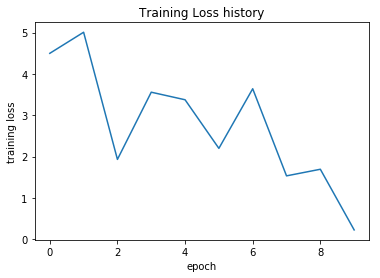

In [26]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [27]:
loss = train_module(model_1, optimizer, train_loader, test_loader, epochs= 10)

epoch: 0 

Iteration 0, loss = 1.4281
Got 362 / 1000 correct (36.20)
Iteration 10, loss = 0.6920
Got 380 / 1000 correct (38.00)
Iteration 20, loss = 0.8970
Got 370 / 1000 correct (37.00)
Iteration 30, loss = 0.8786
Got 376 / 1000 correct (37.60)
Iteration 40, loss = 1.5177
Got 356 / 1000 correct (35.60)
Iteration 50, loss = 0.6777
Got 393 / 1000 correct (39.30)
Iteration 60, loss = 1.1531
Got 377 / 1000 correct (37.70)
Iteration 70, loss = 1.1838
Got 384 / 1000 correct (38.40)
Iteration 80, loss = 1.0166
Got 379 / 1000 correct (37.90)
Iteration 90, loss = 1.4189
Got 388 / 1000 correct (38.80)
Iteration 100, loss = 0.8574
Got 389 / 1000 correct (38.90)
Iteration 110, loss = 1.7168
Got 391 / 1000 correct (39.10)
Iteration 120, loss = 0.9259
Got 392 / 1000 correct (39.20)
Iteration 130, loss = 1.3440
Got 381 / 1000 correct (38.10)
Iteration 140, loss = 1.2207
Got 373 / 1000 correct (37.30)
Iteration 150, loss = 1.2205
Got 384 / 1000 correct (38.40)
Iteration 160, loss = 1.4056
Got 394 / 1

Iteration 110, loss = 0.1786
Got 423 / 1000 correct (42.30)
Iteration 120, loss = 0.1582
Got 423 / 1000 correct (42.30)
Iteration 130, loss = 0.0812
Got 421 / 1000 correct (42.10)
Iteration 140, loss = 0.1847
Got 406 / 1000 correct (40.60)
Iteration 150, loss = 0.1871
Got 411 / 1000 correct (41.10)
Iteration 160, loss = 0.1745
Got 426 / 1000 correct (42.60)
Iteration 170, loss = 0.2945
Got 423 / 1000 correct (42.30)
epoch: 8 

Iteration 0, loss = 0.3070
Got 386 / 1000 correct (38.60)
Iteration 10, loss = 0.2641
Got 390 / 1000 correct (39.00)
Iteration 20, loss = 0.3727
Got 397 / 1000 correct (39.70)
Iteration 30, loss = 0.1223
Got 414 / 1000 correct (41.40)
Iteration 40, loss = 0.2535
Got 406 / 1000 correct (40.60)
Iteration 50, loss = 0.0756
Got 404 / 1000 correct (40.40)
Iteration 60, loss = 0.2632
Got 412 / 1000 correct (41.20)
Iteration 70, loss = 0.1779
Got 416 / 1000 correct (41.60)
Iteration 80, loss = 0.1013
Got 405 / 1000 correct (40.50)
Iteration 90, loss = 0.1975
Got 417 / 1

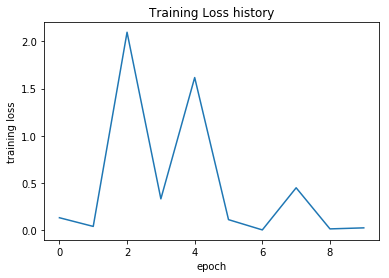

In [28]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [39]:
channel_input = 3
channel_1 = 256
channel_2 = 128
channel_3 = 64
num_class = 70
learning_rate = 1e-3

model_2 = nn.Sequential(
    
    # conv1
    nn.Conv2d(channel_input, channel_1, kernel_size=5, padding=2),
    
    nn.ReLU(),
    
    # conv2
    nn.Conv2d(channel_1, channel_2, kernel_size=3, padding=1),
    
    nn.ReLU(),
    
    # conv3
    nn.Conv2d(channel_2, channel_3, kernel_size=3, padding=1),
    
    nn.ReLU(),
    
    Flatten(),
    
    # fc
    nn.Linear(channel_3*32*32, num_class)
)

optimizer = optim.SGD(model_2.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)


model_2.apply(init_weights)
loss = train_module(model_2, optimizer, train_loader, test_loader, epochs= 20)

epoch: 0 

Iteration 0, loss = 4.2535
Got 12 / 1000 correct (1.20)
Iteration 10, loss = 4.1975
Got 84 / 1000 correct (8.40)
Iteration 20, loss = 4.2382
Got 84 / 1000 correct (8.40)
Iteration 30, loss = 4.2339
Got 83 / 1000 correct (8.30)
Iteration 40, loss = 4.1108
Got 84 / 1000 correct (8.40)
Iteration 50, loss = 4.0627
Got 84 / 1000 correct (8.40)
Iteration 60, loss = 4.0971
Got 84 / 1000 correct (8.40)
Iteration 70, loss = 4.0425
Got 84 / 1000 correct (8.40)
Iteration 80, loss = 3.9782
Got 85 / 1000 correct (8.50)
Iteration 90, loss = 3.9583
Got 81 / 1000 correct (8.10)
Iteration 100, loss = 4.0741
Got 70 / 1000 correct (7.00)
Iteration 110, loss = 4.0317
Got 75 / 1000 correct (7.50)
Iteration 120, loss = 3.7850
Got 74 / 1000 correct (7.40)
Iteration 130, loss = 4.0131
Got 90 / 1000 correct (9.00)
Iteration 140, loss = 3.9274
Got 83 / 1000 correct (8.30)
Iteration 150, loss = 4.0507
Got 84 / 1000 correct (8.40)
Iteration 160, loss = 3.8551
Got 82 / 1000 correct (8.20)
Iteration 170,

Iteration 120, loss = 2.4408
Got 299 / 1000 correct (29.90)
Iteration 130, loss = 2.0407
Got 298 / 1000 correct (29.80)
Iteration 140, loss = 1.7596
Got 305 / 1000 correct (30.50)
Iteration 150, loss = 1.7761
Got 297 / 1000 correct (29.70)
Iteration 160, loss = 2.2802
Got 301 / 1000 correct (30.10)
Iteration 170, loss = 2.4281
Got 309 / 1000 correct (30.90)
epoch: 8 

Iteration 0, loss = 1.5793
Got 293 / 1000 correct (29.30)
Iteration 10, loss = 1.6576
Got 319 / 1000 correct (31.90)
Iteration 20, loss = 1.7602
Got 327 / 1000 correct (32.70)
Iteration 30, loss = 1.9568
Got 339 / 1000 correct (33.90)
Iteration 40, loss = 1.7199
Got 308 / 1000 correct (30.80)
Iteration 50, loss = 1.5110
Got 316 / 1000 correct (31.60)
Iteration 60, loss = 1.8138
Got 329 / 1000 correct (32.90)
Iteration 70, loss = 1.5746
Got 309 / 1000 correct (30.90)
Iteration 80, loss = 2.1464
Got 319 / 1000 correct (31.90)
Iteration 90, loss = 1.8895
Got 313 / 1000 correct (31.30)
Iteration 100, loss = 1.2199
Got 334 / 1

Got 362 / 1000 correct (36.20)
Iteration 50, loss = 0.4593
Got 351 / 1000 correct (35.10)
Iteration 60, loss = 0.2206
Got 368 / 1000 correct (36.80)
Iteration 70, loss = 0.3948
Got 371 / 1000 correct (37.10)
Iteration 80, loss = 0.5194
Got 383 / 1000 correct (38.30)
Iteration 90, loss = 0.3559
Got 376 / 1000 correct (37.60)
Iteration 100, loss = 0.4507
Got 371 / 1000 correct (37.10)
Iteration 110, loss = 0.1807
Got 369 / 1000 correct (36.90)
Iteration 120, loss = 0.2876
Got 364 / 1000 correct (36.40)
Iteration 130, loss = 0.2730
Got 376 / 1000 correct (37.60)
Iteration 140, loss = 0.3020
Got 389 / 1000 correct (38.90)
Iteration 150, loss = 0.7376
Got 374 / 1000 correct (37.40)
Iteration 160, loss = 0.8003
Got 379 / 1000 correct (37.90)
Iteration 170, loss = 0.5952
Got 360 / 1000 correct (36.00)
epoch: 16 

Iteration 0, loss = 0.2375
Got 376 / 1000 correct (37.60)
Iteration 10, loss = 0.5899
Got 363 / 1000 correct (36.30)
Iteration 20, loss = 0.1769
Got 364 / 1000 correct (36.40)
Iterat

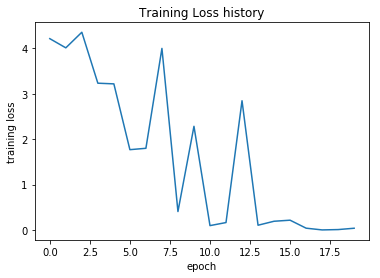

Traceback (most recent call last):
  File "C:\Users\Ghoulz\Anaconda3\lib\multiprocessing\queues.py", line 236, in _feed
    send_bytes(obj)
  File "C:\Users\Ghoulz\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\Users\Ghoulz\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
OSError: [WinError 6] The handle is invalid


In [40]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [42]:
best_model = model_1

In [29]:
# run/ uncoment this code if trained model isn't saved
# torch.save(best_model.state_dict(), 'new_trained_model.pt')

# This actually end of the code

In [167]:
imgsz = 32

testing_raw = ImageFolder('test',  transform=transform_train)

testloader = DataLoader(testing_raw, num_workers=2,
                          shuffle=True)

In [168]:
print(len(testing_raw))

1334


In [169]:
check_accuracy_module(testloader, model)

Got 510 / 1334 correct (38.23)
